In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal, getcontext
import seaborn as sns
sns.set_theme(font_scale=1.6, style='whitegrid') 
,
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

<h1> TESI: KS E TF GAS ELETTRONICO IN "DISCESA"</h1>

In [15]:
import scipy.constants as cst
eV = cst.electron_volt
me = cst.electron_mass
qe = cst.elementary_charge
e0 = cst.epsilon_0
ht = cst.hbar
print("eV = ", eV)
print("me = ", me)
print("qe = ", qe)
print("epsilon_0 = ", e0)
print("ht = ", ht)
e2 = qe**2/(4*np.pi*e0)
print("e2 = ", e2)
a0 = ht**2/(me*e2)
print("a0 = ", a0)
Eha = e2/a0
print("Eha[j] = ", Eha/(10*10*10*10*10))
print("Eha[eV] = ", Eha/eV)
#SIGMA
print("SIGMA")
print("SIGMA[a0-2] =", 0.01)
print("SIGMA[a0-2] =", 1)
print("SIGMA[m-2] =", 0.01/(a0*a0))
print("SIGMA[m-2] =", 1.5/(a0*a0))
print("SIGMA[nm-2] =", 0.01/(a0*a0*10**18))
print("SIGMA[nm-2] =", 1.5/(a0*a0*10**18))
#L
print("L")
print("L[a0] = ", 20)
print("L[m] = ", 20*a0)
print("L[nm] = ", 20*a0*10**9)
#n
print("n")
print("n[a0-2] =", 0.01)
print("n[a0-2] =", 1)
print("n[m-2] =", 0.1/(a0*a0*20*a0))
print("n[m-2] =", 1.4/(a0*a0*20*a0))
print("n[nm-2] =", 0.01/(a0*a0*10**18*20*a0*10**9))
print("[nm-2] =", 1.5/(a0*a0*10**18*20*a0*10**9))
#K
print("K")
print("K[Eha/a0] = ", 0.1)
print("K[Eha/a0] = ", 1)
print("K[N] = ", Eha/a0)
print("K[N] = ", 0.1*Eha/a0)
print("K[nN] = ", Eha/a0*10**9)
print("K[nN] = ", 0.1*Eha/a0*10**9)
#eBis
print("eAcons")
print("eAcons[a0-2] =",10**(-8))
print("eAconseAcons[m] =", 10**(-8)/(a0**5))
print("eAcons[nm] =", 10**(-8)/(a0**5*10**45))
#eAcons
print("eBis")
print("eBis[a0-2] =",10**(-4))
print("eBis[m] =", 10**(-4)/(a0**2))
print("eBis[nm] =", 10**(-4)/(a0**2*10**18))

eV =  1.602176634e-19
me =  9.1093837015e-31
qe =  1.602176634e-19
epsilon_0 =  8.8541878128e-12
ht =  1.0545718176461565e-34
e2 =  2.3070775523417355e-28
a0 =  5.2917721090608556e-11
Eha[j] =  4.359744722172434e-23
Eha[eV] =  27.211386245771664
SIGMA
SIGMA[a0-2] = 0.01
SIGMA[a0-2] = 1
SIGMA[m-2] = 3.5710648260514867e+18
SIGMA[m-2] = 5.35659723907723e+20
SIGMA[nm-2] = 3.5710648260514866
SIGMA[nm-2] = 535.659723907723
L
L[a0] =  20
L[m] =  1.0583544218121712e-09
L[nm] =  1.0583544218121712
n
n[a0-2] = 0.01
n[a0-2] = 1
n[m-2] = 3.374167247241164e+28
n[m-2] = 4.723834146137629e+29
n[nm-2] = 3.3741672472411635
[nm-2] = 506.1250870861745
K
K[Eha/a0] =  0.1
K[Eha/a0] =  1
K[N] =  8.23872349814053e-08
K[N] =  8.238723498140529e-09
K[nN] =  82.3872349814053
K[nN] =  8.23872349814053
eAcons
eAcons[a0-2] = 1e-08
eAconseAcons[m] = 2.409873994767578e+43
eAcons[nm] = 0.02409873994767578
eBis
eBis[a0-2] = 0.0001
eBis[m] = 3.5710648260514868e+16
eBis[nm] = 0.035710648260514864


<h2>TF</h2>

<p> Andiamo in prima battuta a vedere, per fissato campo esterno $K$, come varia in funzione del potenziale chimico $\mu$ la densita' superficiale $\sigma = \frac{N}{A}$. Questo studio e' utile per andare poi a fissare gli estremi dell'intervallo su cui applicare il metodo di bisezione ed andare quindi a cercare per data $\sigma$ il potenziale chimico corrispondente. Cosi' facendo, come desiderabile, abbiamo un programma che prende in input la densita' e non tanto l'energia di Fermi.</p>

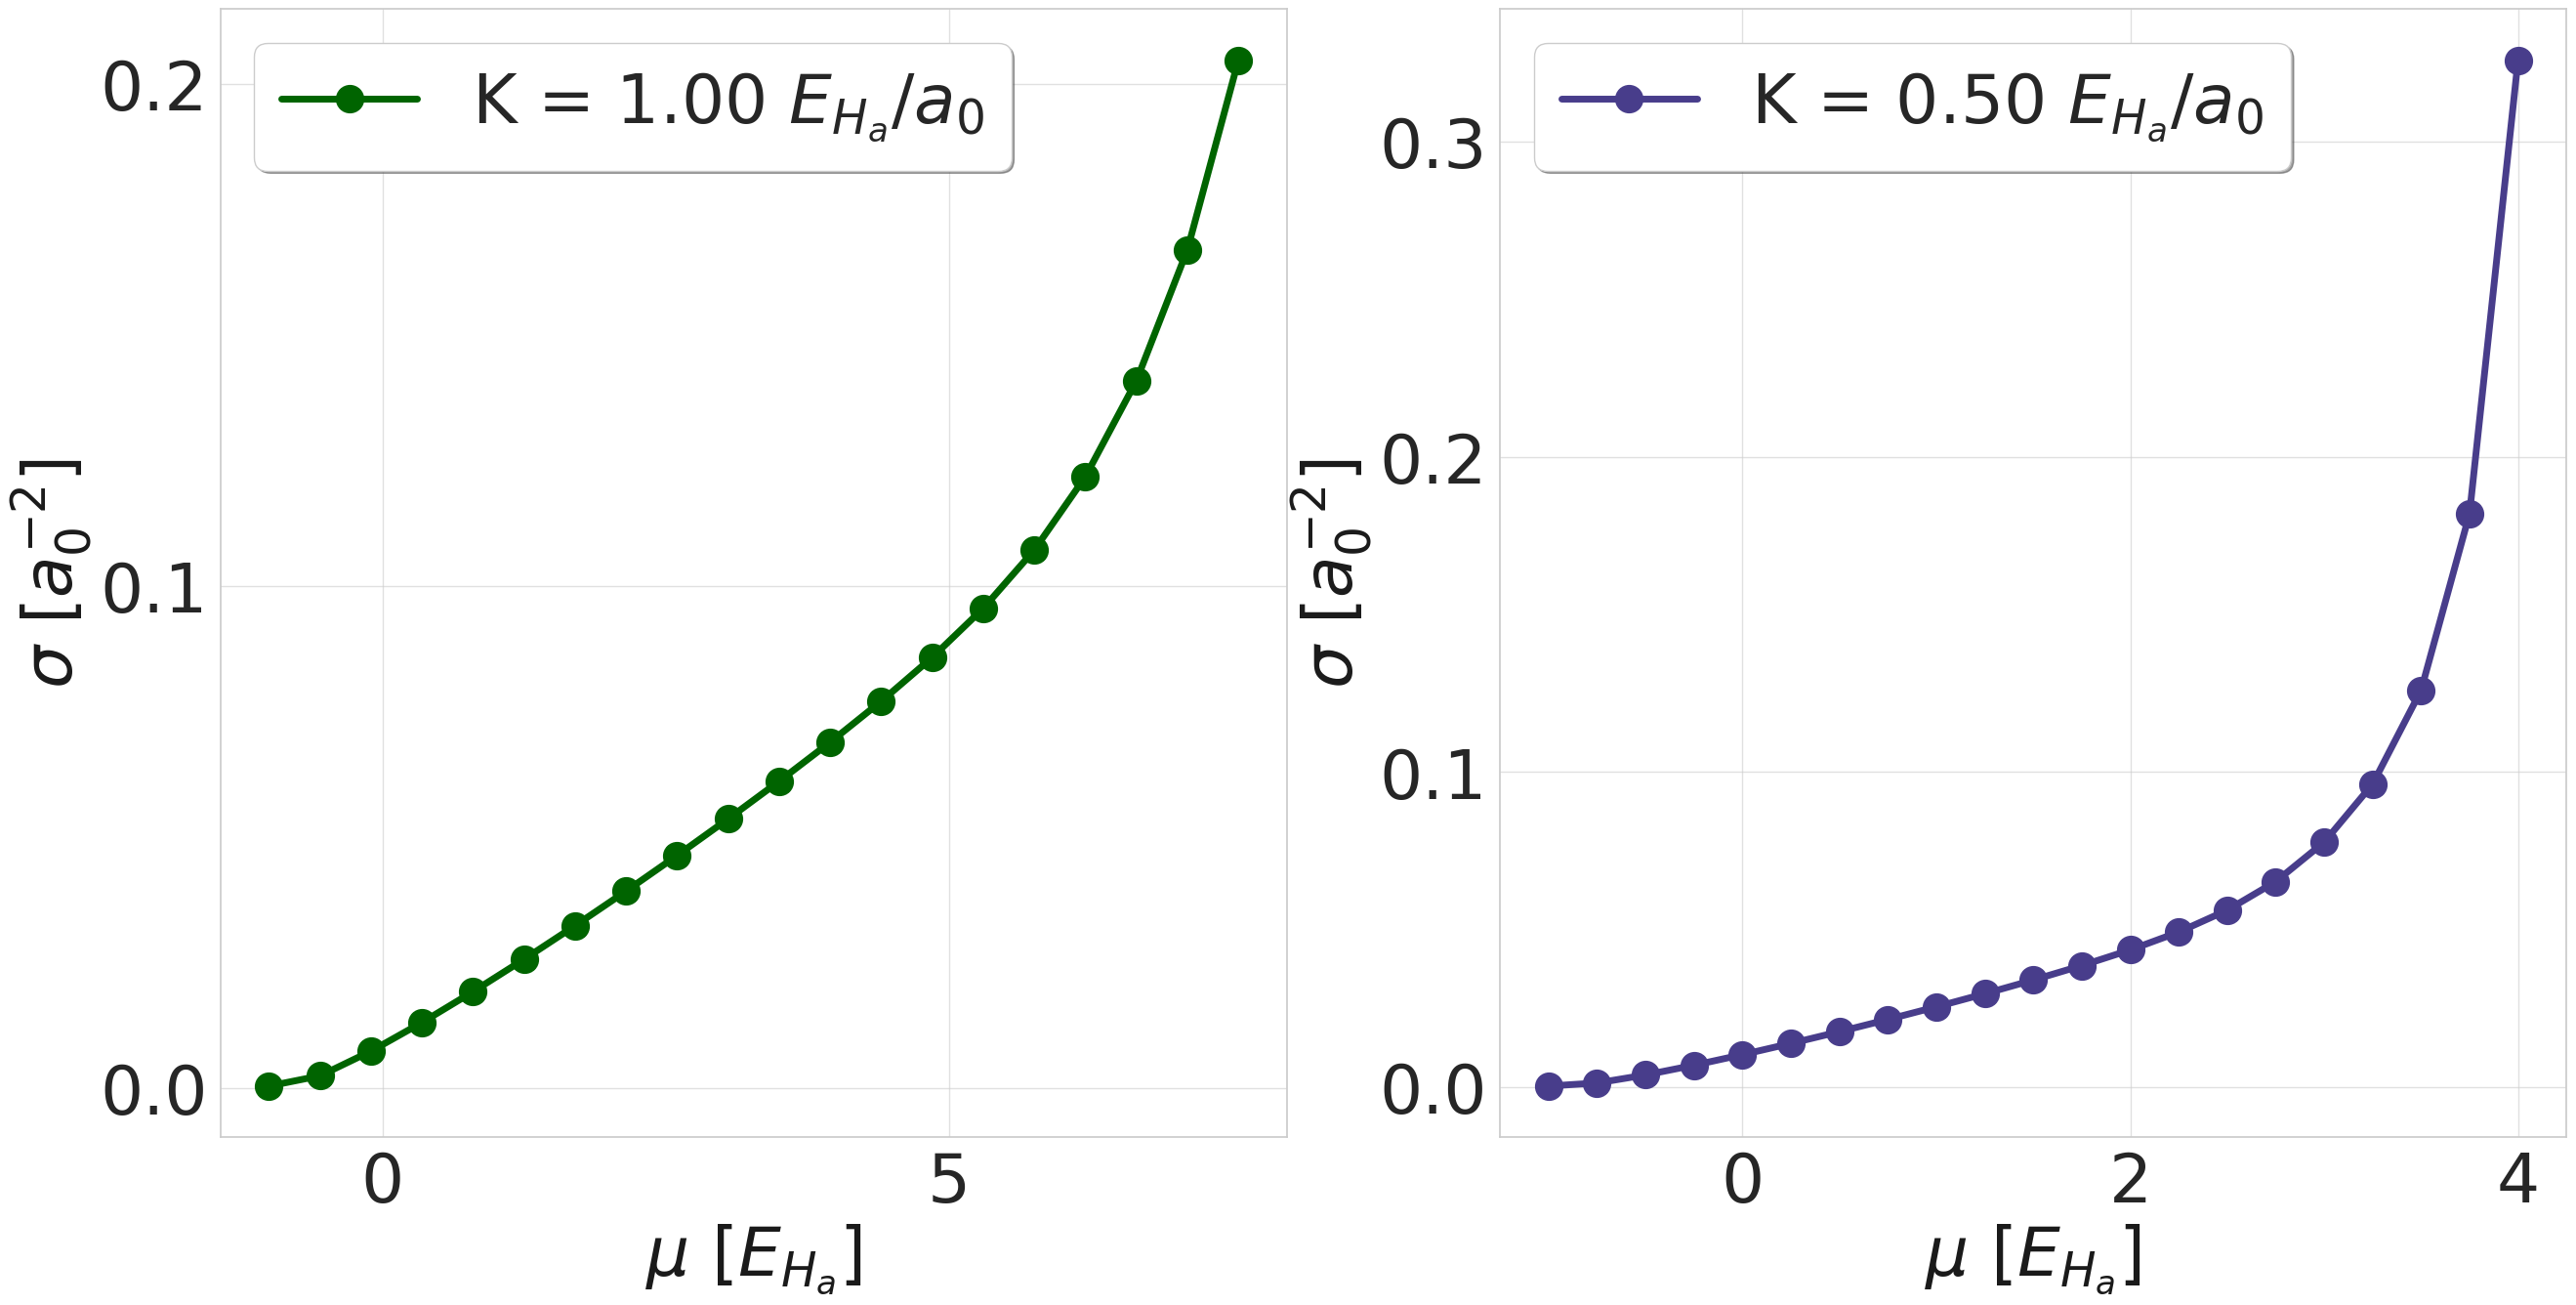

In [118]:
plt.figure(figsize = (31,15))
plt.subplot(1,2,1)
K = 1
x, y = np.loadtxt("TF/DAT/N(mu)_K="+str(K)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "K = " + "{:.2f}".format(K)+" "+r"$E_{H_a}/a_0$", c = "DarkGreen", linewidth = 5, marker = "o", markersize = 20)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 50,
        }
plt.xlabel(r"$\mu$"+" "+r"$[E_{H_a}]$" , fontdict = font)
plt.ylabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize =50)
plt.grid(axis = "both", alpha = 0.6)
plt.tick_params(which = "both")
plt.locator_params(axis = "x", nbins = 3)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.subplot(1,2,2)
K = 0.5
x, y = np.loadtxt("TF/DAT/N(mu)_K="+str(K)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "K = " + "{:.2f}".format(K)+" "+r"$E_{H_a}/a_0$", c = "darkslateblue", linewidth = 5, marker = "o", markersize = 20)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 50,
        }

plt.xlabel(r"$\mu$"+" "+r"$[E_{H_a}]$" , fontdict = font)
plt.ylabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 50)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 3, tight = True)
plt.locator_params(axis = "y", nbins = 4, tight =  True)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.savefig("TF/JPEG/N(mu)_K="+str(K)+".jpeg")

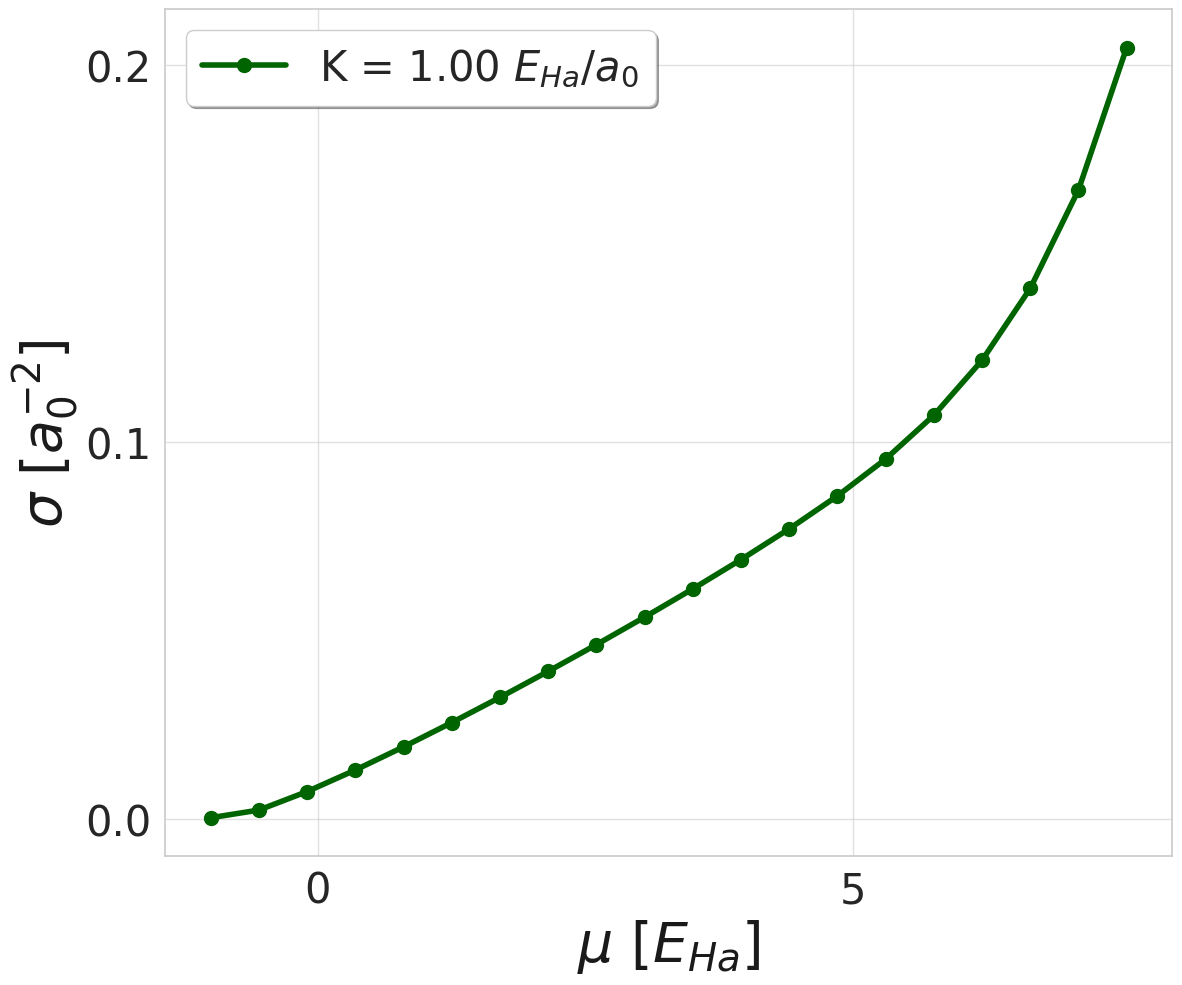

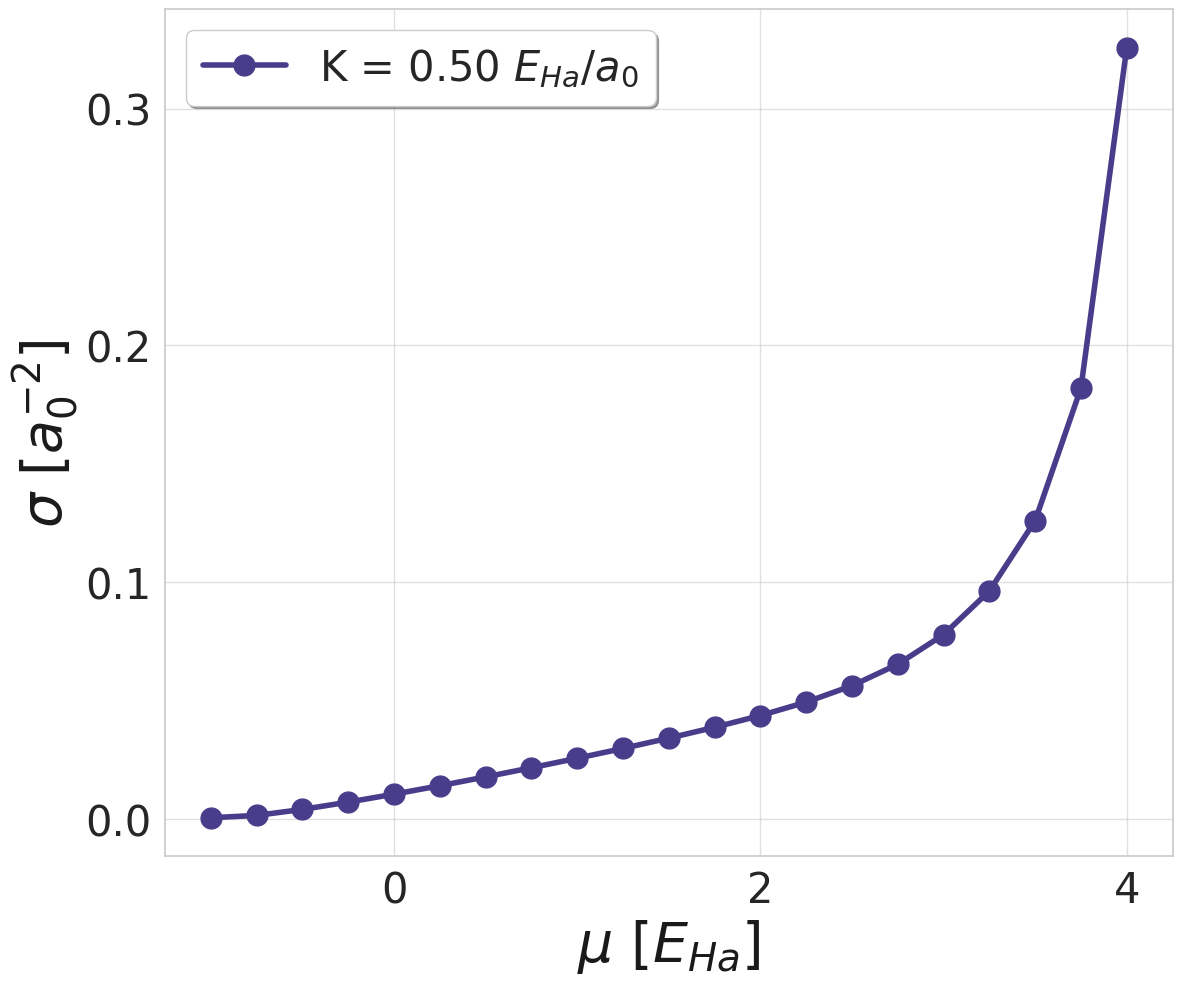

In [160]:
plt.figure(figsize = (13,11))

K = 1
x, y = np.loadtxt("TF/DAT/N(mu)_K="+str(K)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "K = " + "{:.2f}".format(K)+" "+r"$E_{Ha}/a_0$", linewidth = 4, marker = "o", markersize = 10,c = "DarkGreen")
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }
plt.xlabel(r"$\mu$"+" "+r"$[E_{Ha}]$" , fontdict = font)
plt.ylabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
plt.legend(loc = "upper left", shadow = True, fancybox = True, fontsize =30)
plt.grid(axis = "both", alpha = 0.6)
plt.tick_params(which = "both")
plt.locator_params(axis = "x", nbins = 3)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("TF/JPEG/N(mu)_K="+str(K)+".jpeg")
plt.figure(figsize = (13,11))
K = 0.5
x, y = np.loadtxt("TF/DAT/N(mu)_K="+str(K)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "K = " + "{:.2f}".format(K)+" "+r"$E_{Ha}/a_0$",  linewidth = 4, marker = "o", markersize = 15, c ="darkslateblue")
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }

plt.xlabel(r"$\mu$"+" "+r"$[E_{Ha}]$" , fontdict = font)
plt.ylabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
plt.legend(loc = "upper left", shadow = True, fancybox = True, fontsize =30)
plt.grid(axis = "both", alpha = 0.6)
plt.tick_params(which = "both")
plt.locator_params(axis = "x", nbins = 3)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("TF/JPEG/N(mu)_K="+str(K)+".jpeg")

<h3> Densita' a fissato K al variare di $\sigma$</h3>

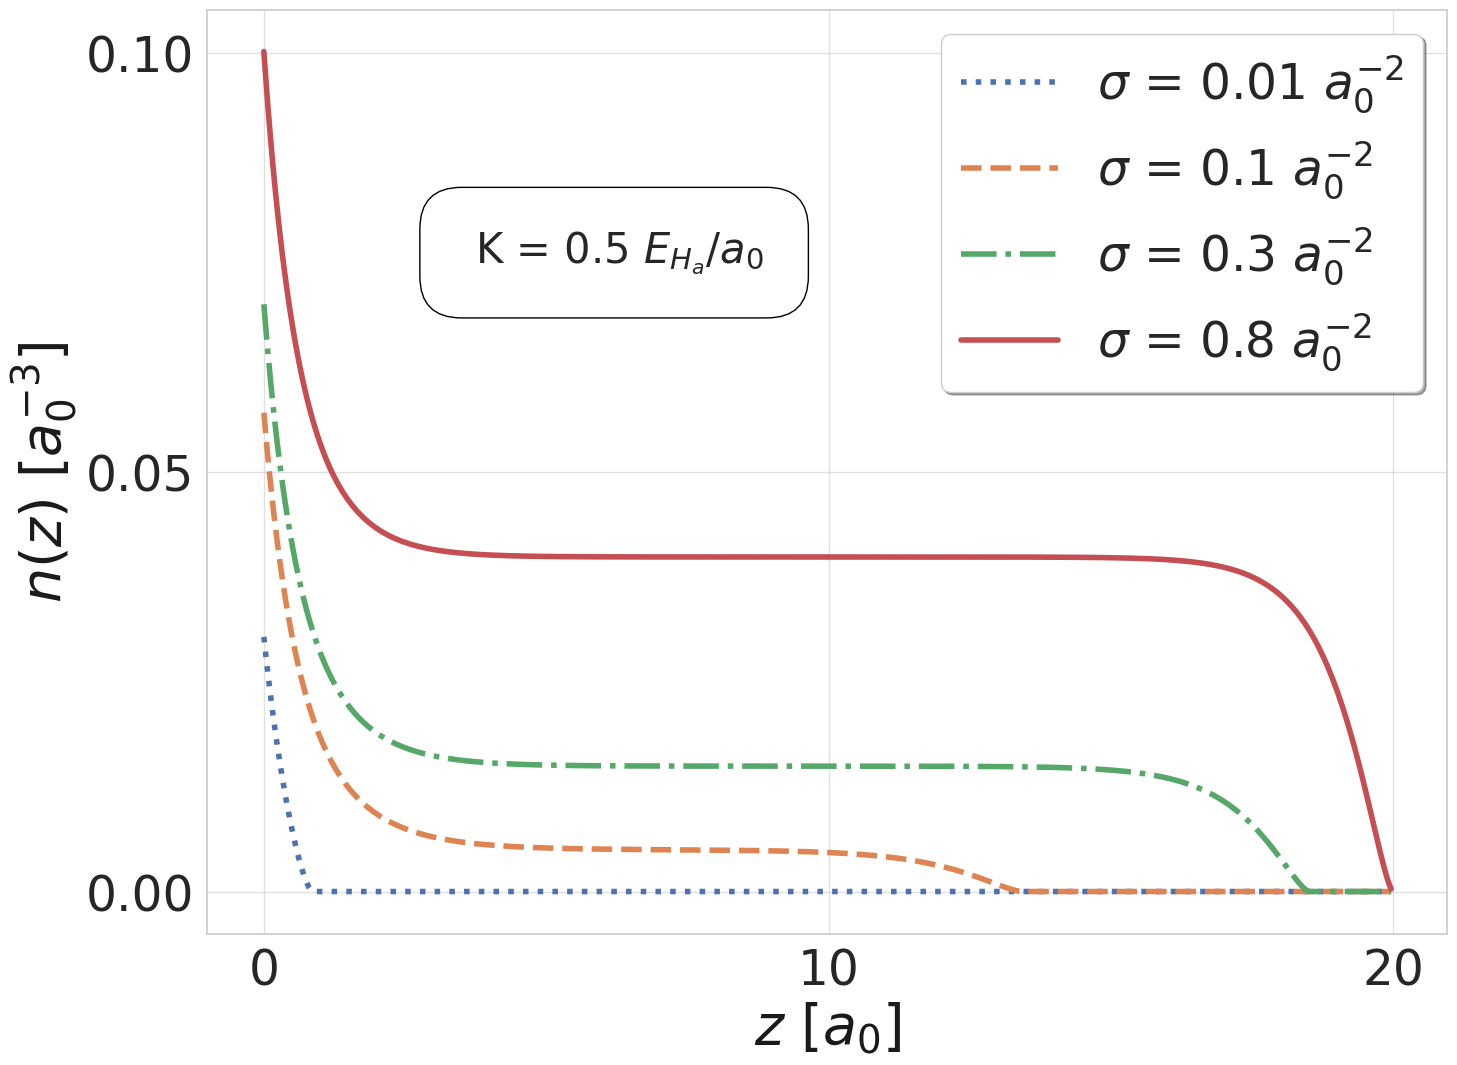

In [19]:
K = 0.5
sigma = [0.01, 0.1 , 0.3 , 0.8]
myLines = [":", "--", "-.", "-"]
#myColors = ["r", "b", "g", "c"]
plt.figure(figsize = (16,12))

conta = 0
for s in sigma:
    x, y = np.loadtxt("TF/DAT/density_K="+str(K)+ "_sigma="+str(s)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    plt.plot(x,y, label = r"$\sigma$ = " + str(s)+ r" $a_0^{-2}$", linewidth = 4,linestyle = myLines[conta])
    #plt.fill_between(x,y, color = "k", alpha = 0.3)
    conta = conta + 1
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.locator_params(axis = "x", nbins = 4)
plt.locator_params(axis = "y", nbins = 4)
plt.grid(axis = "both", alpha = 0.6)
plt.legend(loc = "best", fancybox = True, shadow = True, fontsize = 35)
plt.text(3.5, 0.075, " "+"K = "+str(K)+" "+r"$E_{H_a} / a_0$"+" ", fontsize = 30, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fancybox = True, shadow = True)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.savefig("TF/JPEG/density_K="+str(K)+"_TF.jpeg")

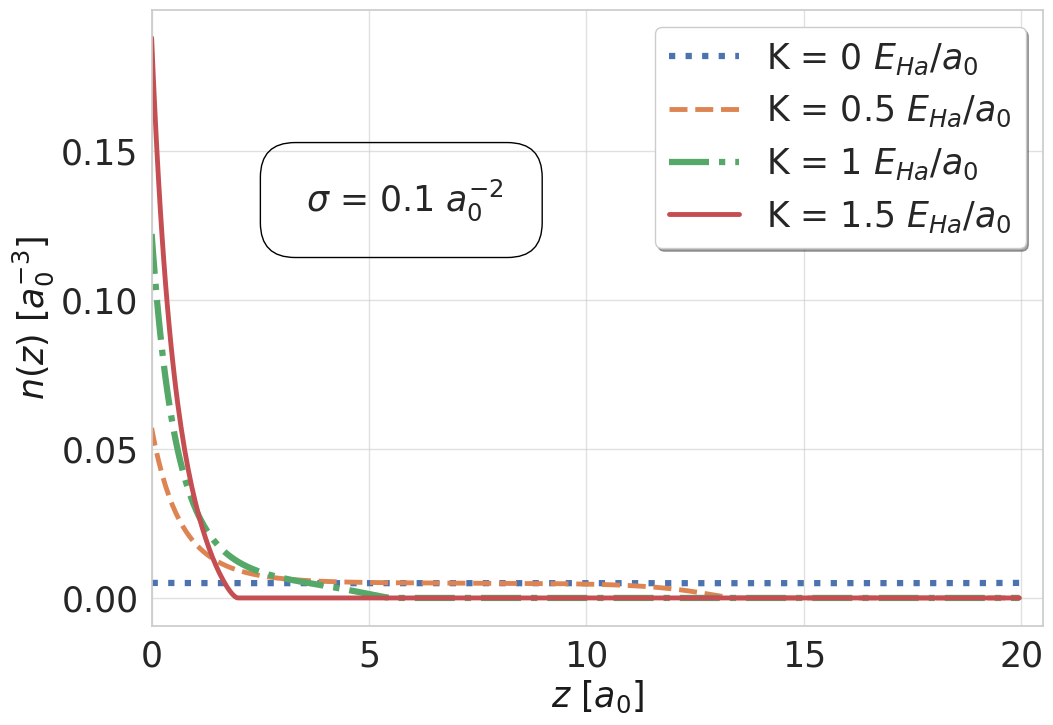

In [55]:
K = [0,0.5, 1, 1.5]
sigma = 0.1
myLines = [":", "--", "-.", "-"]
nl = [4.5,3.5,4.5,3.5]
plt.figure(figsize = (11.5,8))
conta = 0
for k in K:
    x, y = np.loadtxt("TF/DAT/density_K="+str(k)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    #plt.plot(x,y, label = str(k))
    plt.plot(x,y, label = "K = " + str(k)+ " "+ r"$E_{Ha}/a_0$", linewidth = nl[conta],linestyle = myLines[conta])
    #plt.fill_between(x,y, color = "k", alpha = 0.3)
    conta = conta +1
plt.xlim(0,13.5)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 25,
        }
plt.xlim(0,20.5)
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,fancybox = True, shadow = True)
plt.legend(loc = "best", fancybox = True, shadow = True, fontsize = 25  )
plt.text(3.3, 0.13," "+ r"$\sigma$ = " +str(sigma)+ r" $a_0^{-2}$"+" ", fontsize = 25, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 5)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig("TF/JPEG/density_sigma="+str(sigma)+"_TF.jpeg")

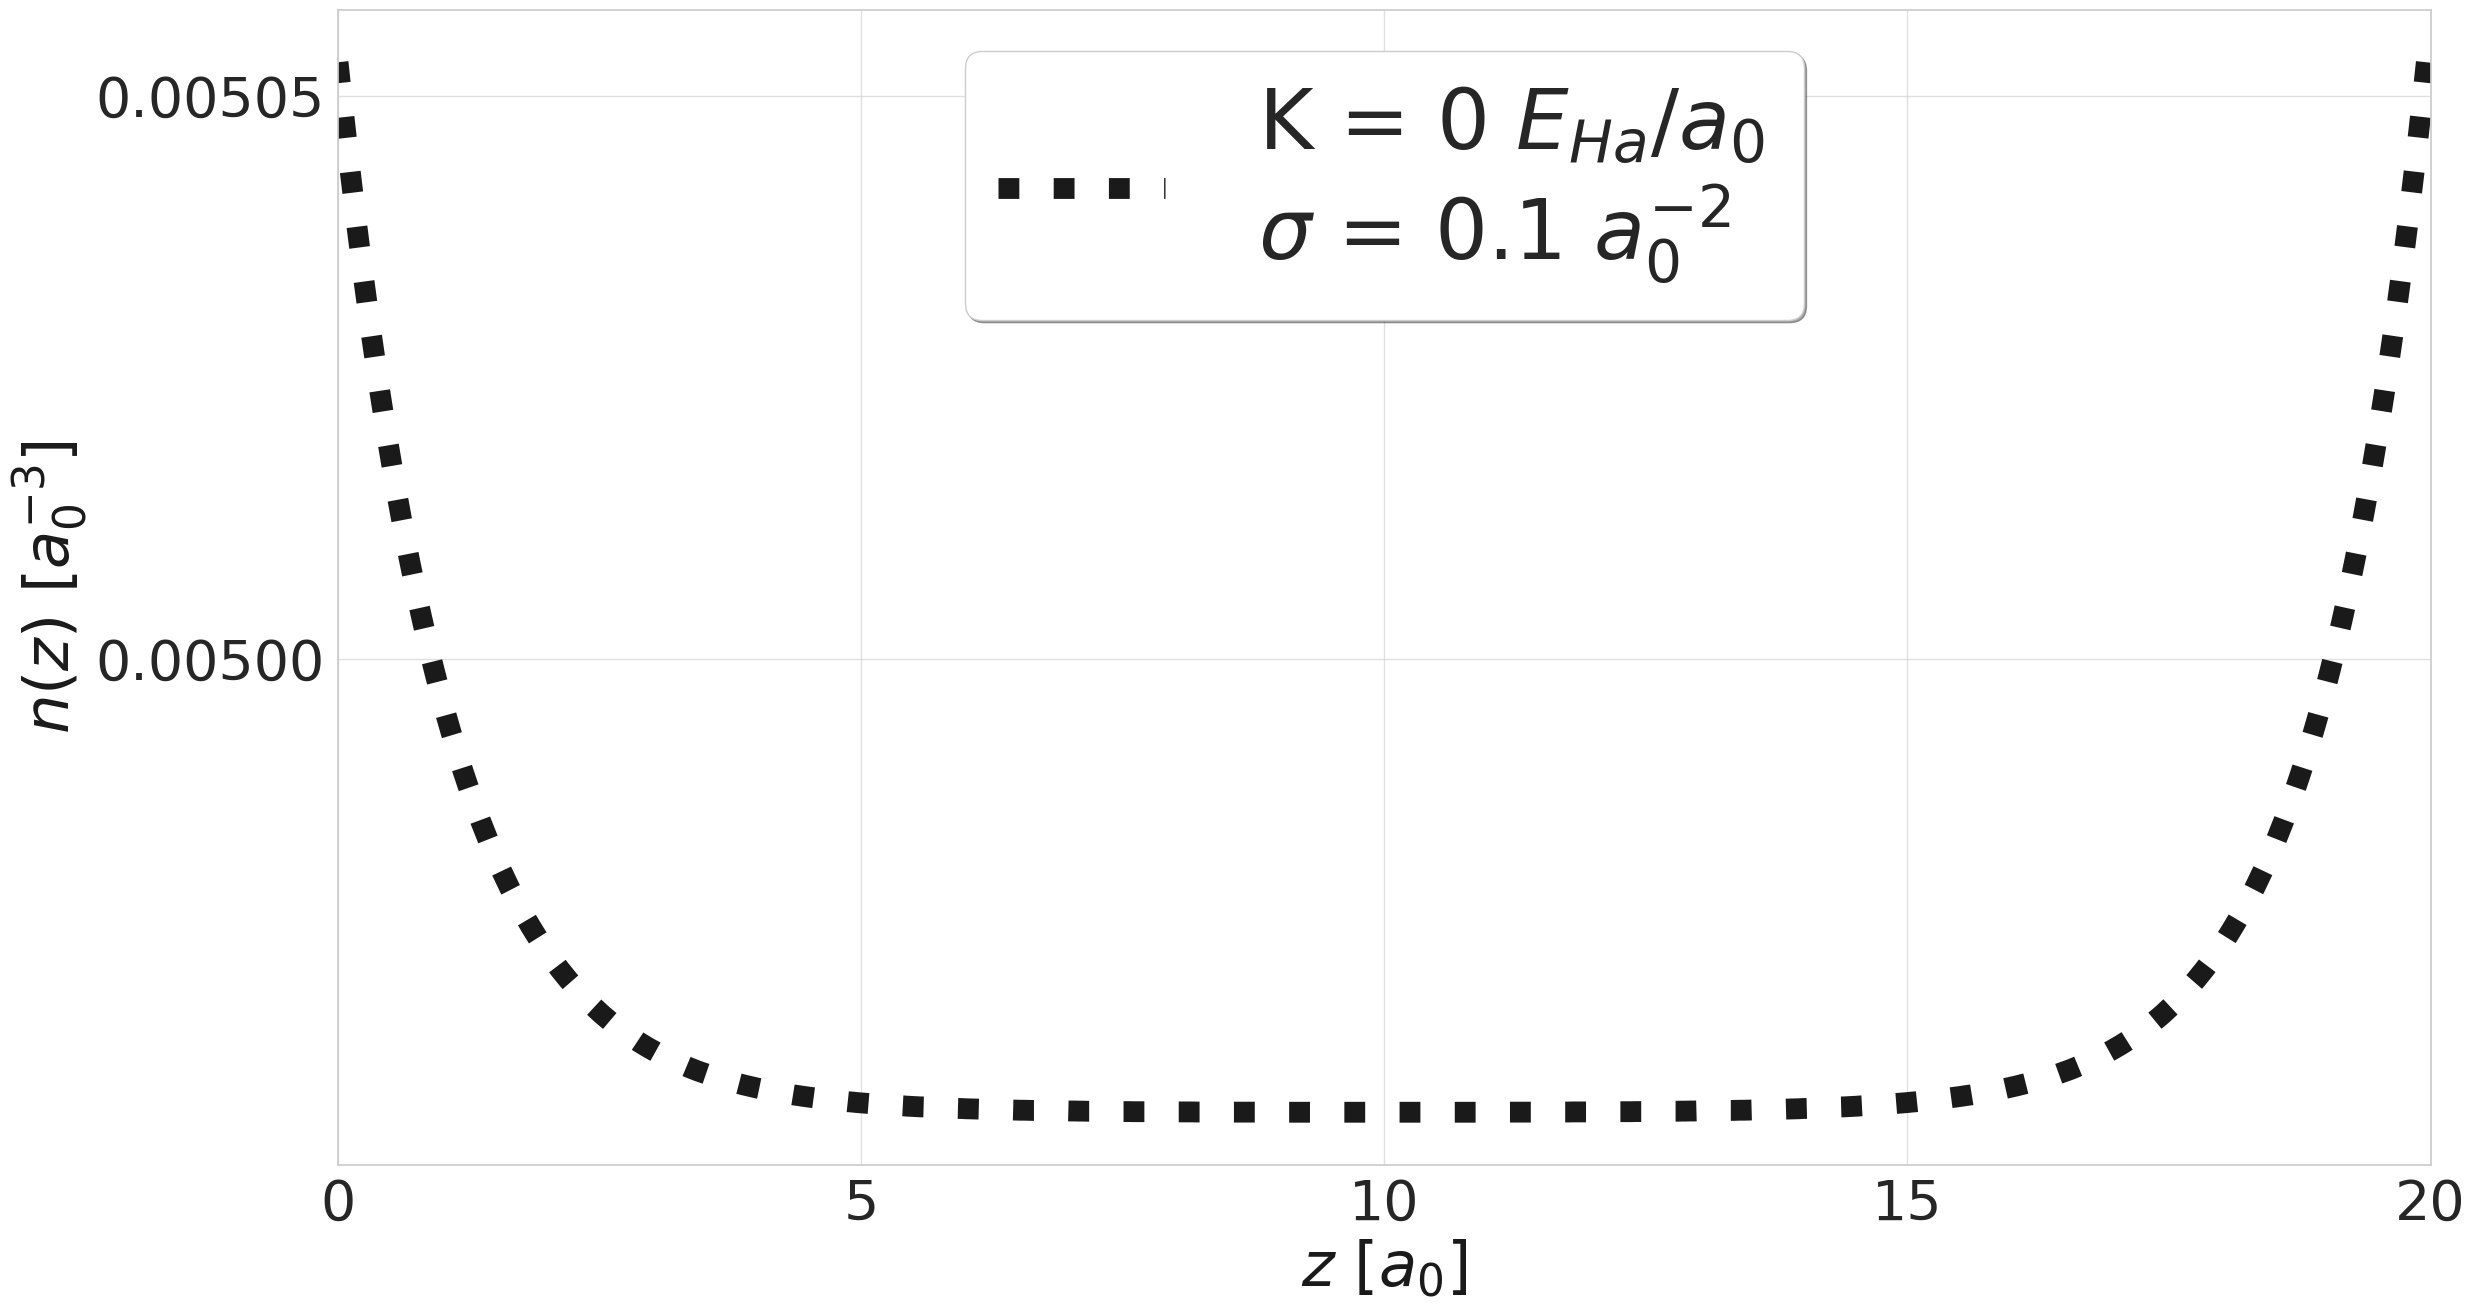

In [54]:
K = 0
sigma = [0.1]
myLines = [":", "--", "-.", "-"]
plt.figure(figsize = (27,15))


conta = 0
for s in sigma:
    x, y = np.loadtxt("TF/DAT/density_K="+str(K)+"_sigma="+str(s)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    plt.plot(x,y, label = " "+"K = "+str(K)+" "+r"$E_{Ha}/a_0$"+" \n " r"$\sigma$ = " + str(s)+ r" $a_0^{-2}$"+"", linestyle = myLines[conta], linewidth = 15, c = "k")
    conta= conta +1
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 45,
        }
plt.xlim(0,20)
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "upper center", shadow = True, fancybox = True, fontsize = 60   )
plt.grid(axis = "both", alpha = 0.6)
#plt.text(15, 0.00007," "+"K = "+str(K)+" "+r"$E_{H_a}/a_0$"+" ", fontsize = 40, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig("TF/JPEG/density_K="+str(K)+"_sigma="+str(sigma[0])+"_KS.jpeg")

<h4>Limite bassa e alta densita'.</h4>

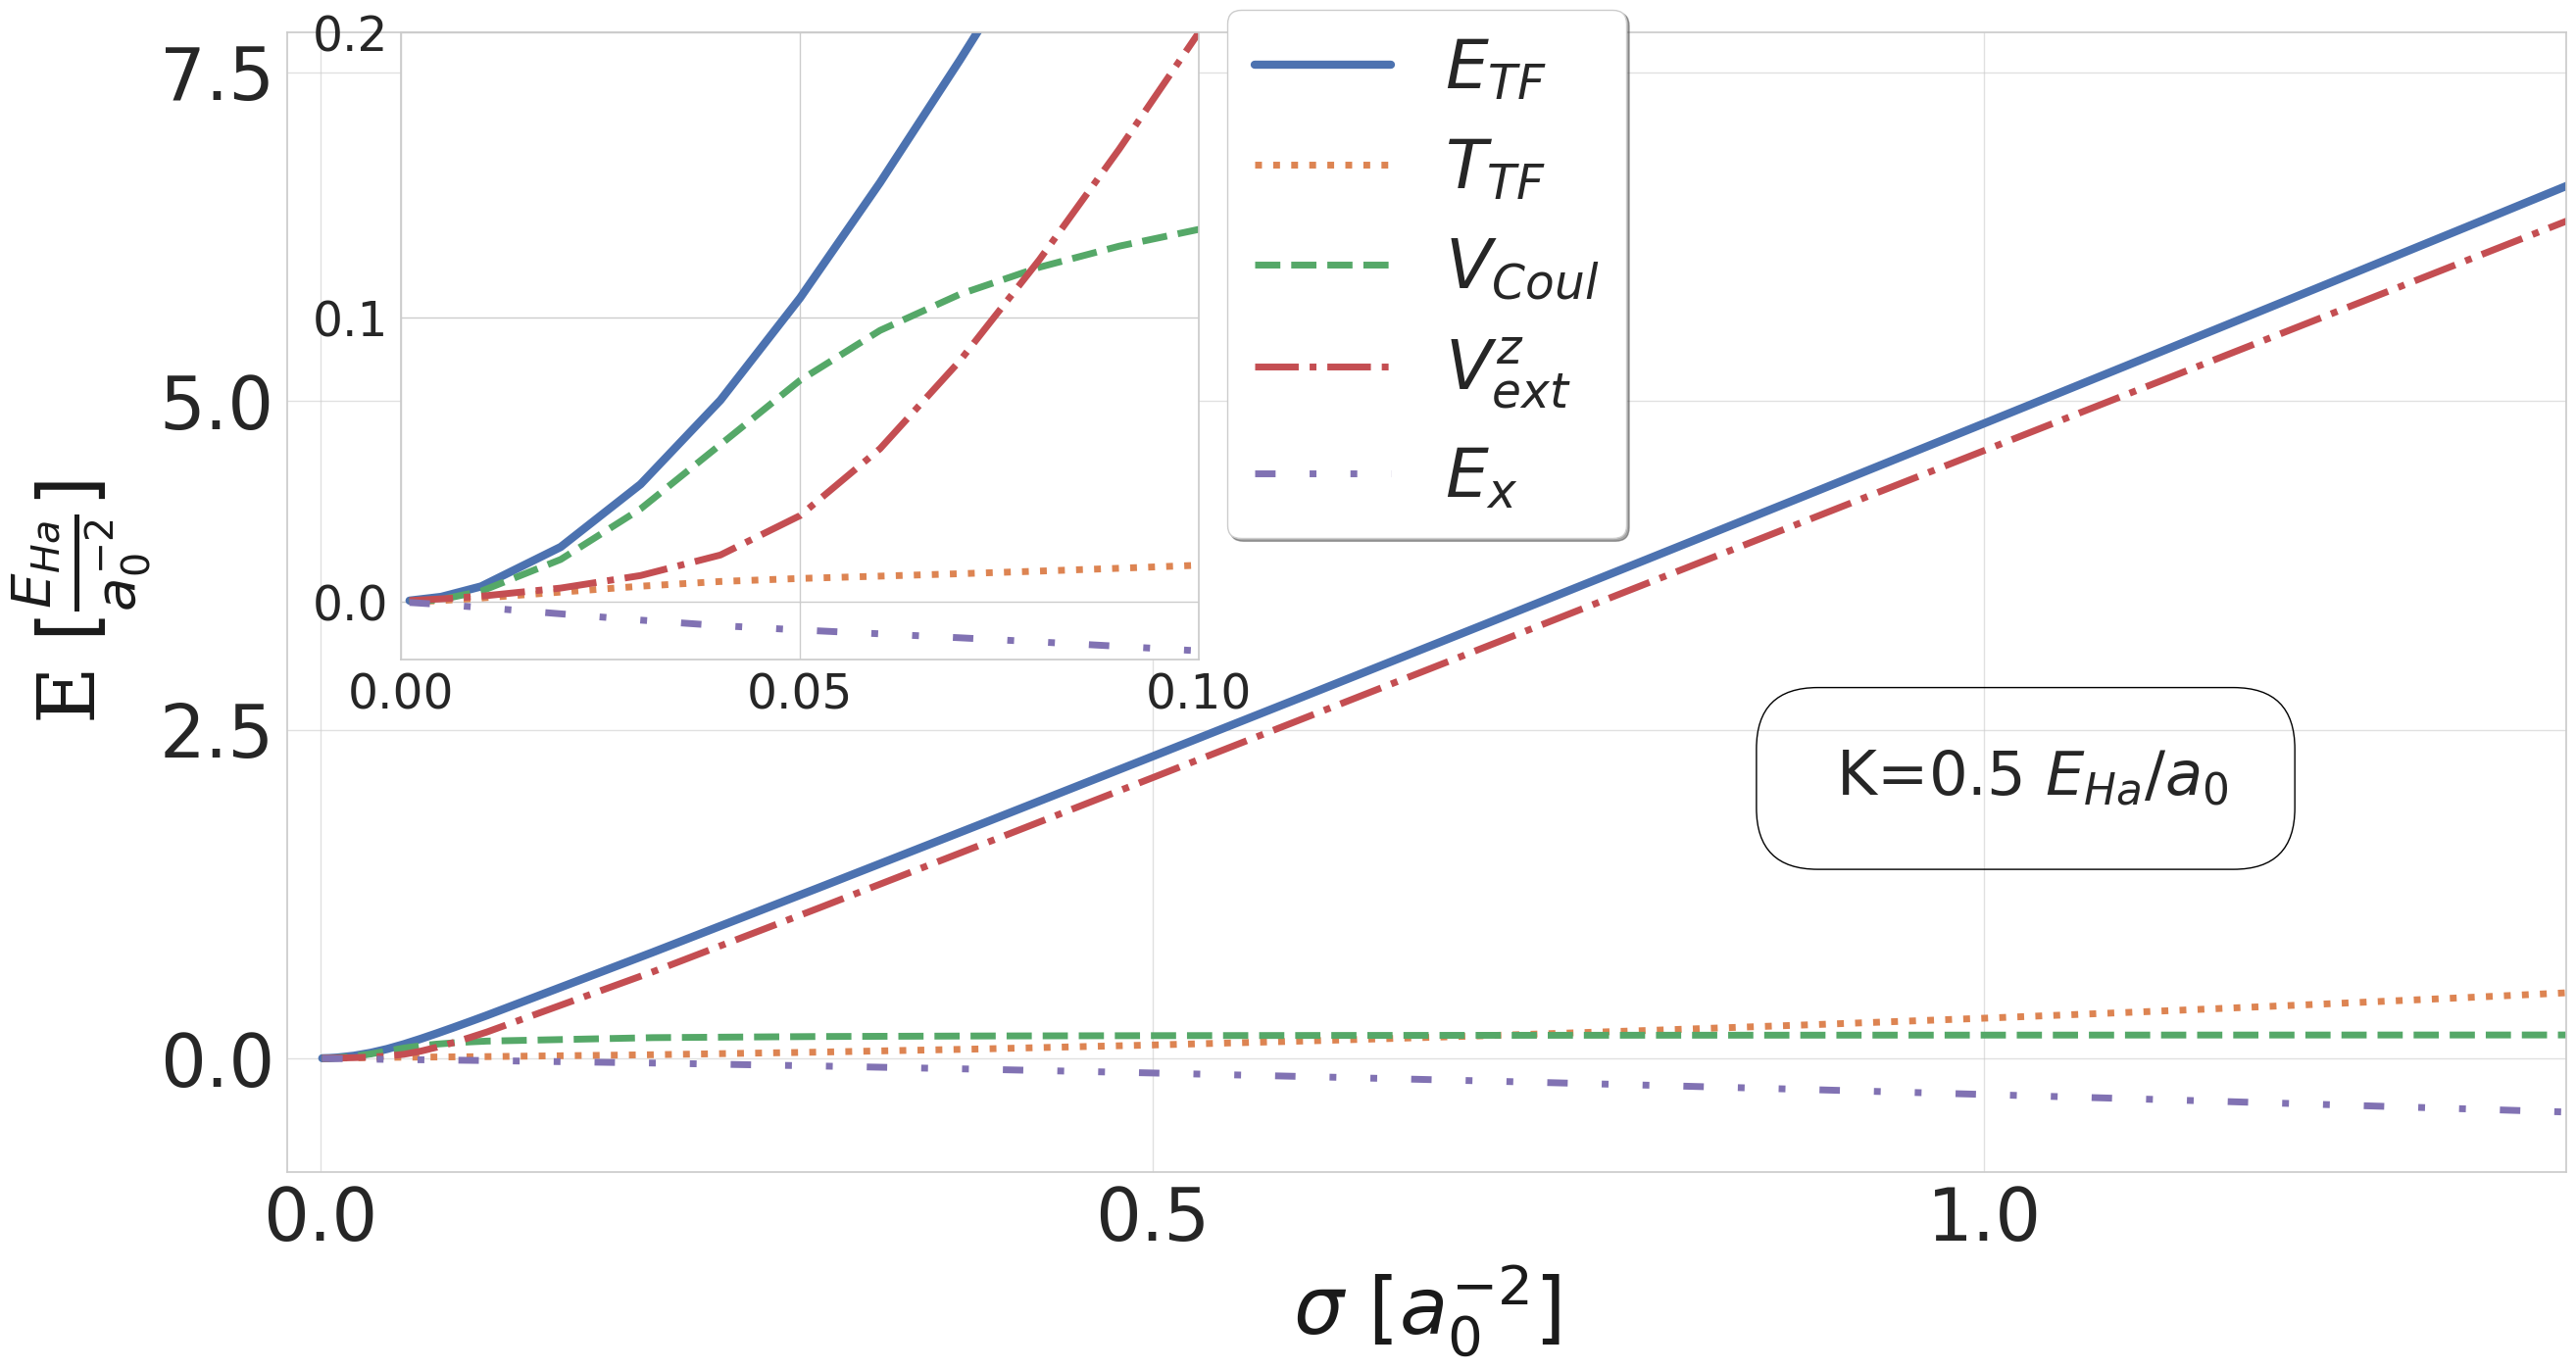

In [31]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=[30, 17])

ax.set_box_aspect(0.5)                            
x1, x2, y1, y2 = 0., 0.1, -0.02, 0.2
axins = ax.inset_axes([0.05, 0.45,0.35,0.55])
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)

K = 0.5
x, yE, yKin,yExt, yEcoul, yEx = np.loadtxt("TF/DAT/energy_K="+str(K)+"_TF.dat", usecols = (0,1,2,3,4,5), delimiter = " ", unpack = "true")
ax.plot(x,yE, label = r"$E_{TF}$", linewidth = 6)
ax.plot(x,yKin,label = r"$T_{TF}$", linestyle = ":", linewidth = 5)
ax.plot(x,yEcoul, label = r"$V_{Coul}$", linestyle = "--", linewidth = 5)
ax.plot(x,yExt, label = r"$V_{ext}^z$", linestyle = "-.", linewidth = 5)
ax.plot(x,yEx, label = r"$E_x$", linestyle = (0, (3, 5, 1, 5, 1, 5)), linewidth = 5)
ax.set_xlim(-0.02,1.35)

axins.plot(x,yE, label = r"$E_{TF}$", linewidth = 6)
axins.plot(x,yKin,label = r"$T_{TF}$", linestyle = ":", linewidth = 5)
axins.plot(x,yEcoul, label = r"$V_{Coul}$", linestyle = "--", linewidth = 5)
axins.plot(x,yExt, label = r"$V_{ext}^z$", linestyle = "-.", linewidth = 5)
axins.plot(x,yEx, label = r"$E_x$", linestyle = (0, (3, 5, 1, 5, 1, 5)), linewidth = 5)
axins.locator_params(axis = "x", nbins = 3)
axins.locator_params(axis = "y", nbins = 3)
axins.tick_params(axis='x', labelsize=35)
axins.tick_params(axis='y', labelsize=35)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 58,
        }
ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" "+r"$[\frac{E_{Ha}}{a_0^{-2}}]$", fontdict = font)
ax.legend(loc = "upper center", shadow = "true", fancybox = True, fontsize = 50, bbox_to_anchor = (0.5,1.05))
ax.grid(axis = "both", alpha = 0.6)
ax.locator_params(axis = "x", nbins = 5)
ax.locator_params(axis = "y", nbins = 4)
ax.text(0.9, 2," "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 45, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
#mark_inset(ax, axins, loc1=2, loc2=1, ec="0.00001")
ax.tick_params(axis='x', labelsize=53)
ax.tick_params(axis='y', labelsize=53)
plt.savefig("TF/JPEG/Energy_TF.jpeg")

<h2>KS</h2>

<h3>K fissato e variazione della densita':</h3>

Andiamo anzitutto a confrontare per fissato $K$ l'andamento della dnesita' al variare di $\sigma$.

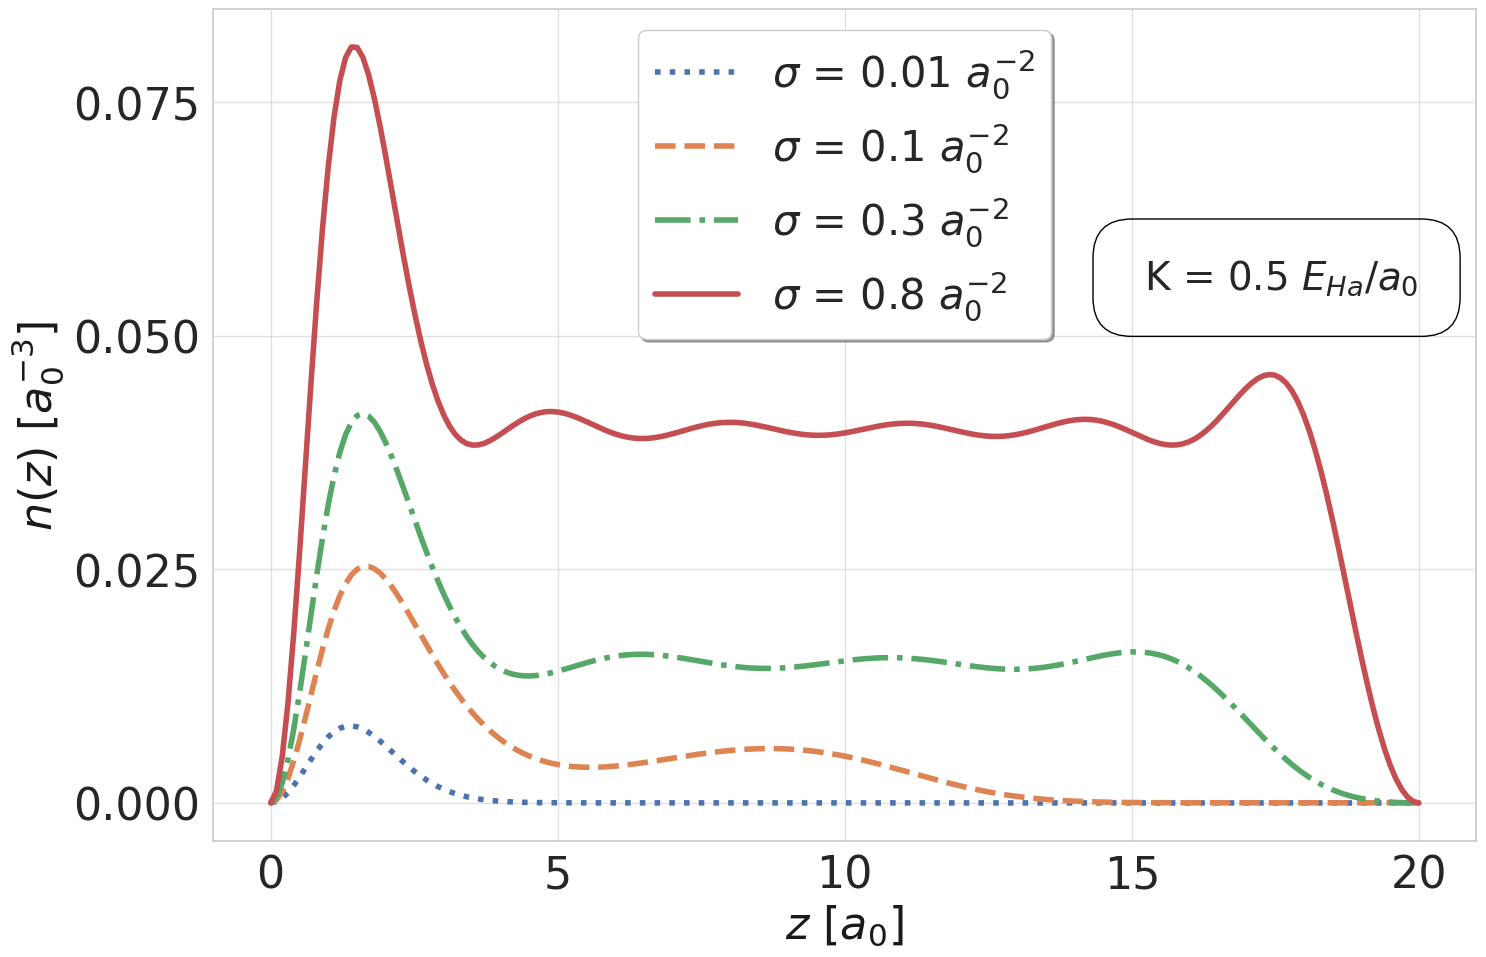

In [29]:
K = 0.5
sigma = [0.01, 0.1, 0.3, 0.8]
myLines = [":", "--", "-.", "-"]
plt.figure(figsize = (16.3,10.8))


conta = 0
for s in sigma:
    x, y = np.loadtxt("KS/DAT/density_K="+str(K)+"_sigma="+str(s)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    plt.plot(x,y, label = r"$\sigma$ = " + str(s)+ r" $a_0^{-2}$", linestyle = myLines[conta], linewidth = 4)
    conta= conta +1
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 32,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "upper center", shadow = True, fancybox = True, fontsize = 30  )
plt.grid(axis = "both", alpha = 0.6)
plt.text(15, 0.055," "+"K = "+str(K)+" "+r"$E_{Ha}/a_0$"+" ", fontsize = 28, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.savefig("KS/JPEG/density_K="+str(K)+"_KS.jpeg")

Dove evidenziamo come al crescere della densita' un maggior numero di sottobande andranno a riempirli coinvolgendo percio' livelli
eccitati. al crescere del numero di bande occupare avremo la tendenza del sistema a sbrodolare e disperdersi.

Passiamo ora a considerare a fissato $\sigma$ diversi valori di $K$

<h3>Variazione K a sigma fissato</h3>

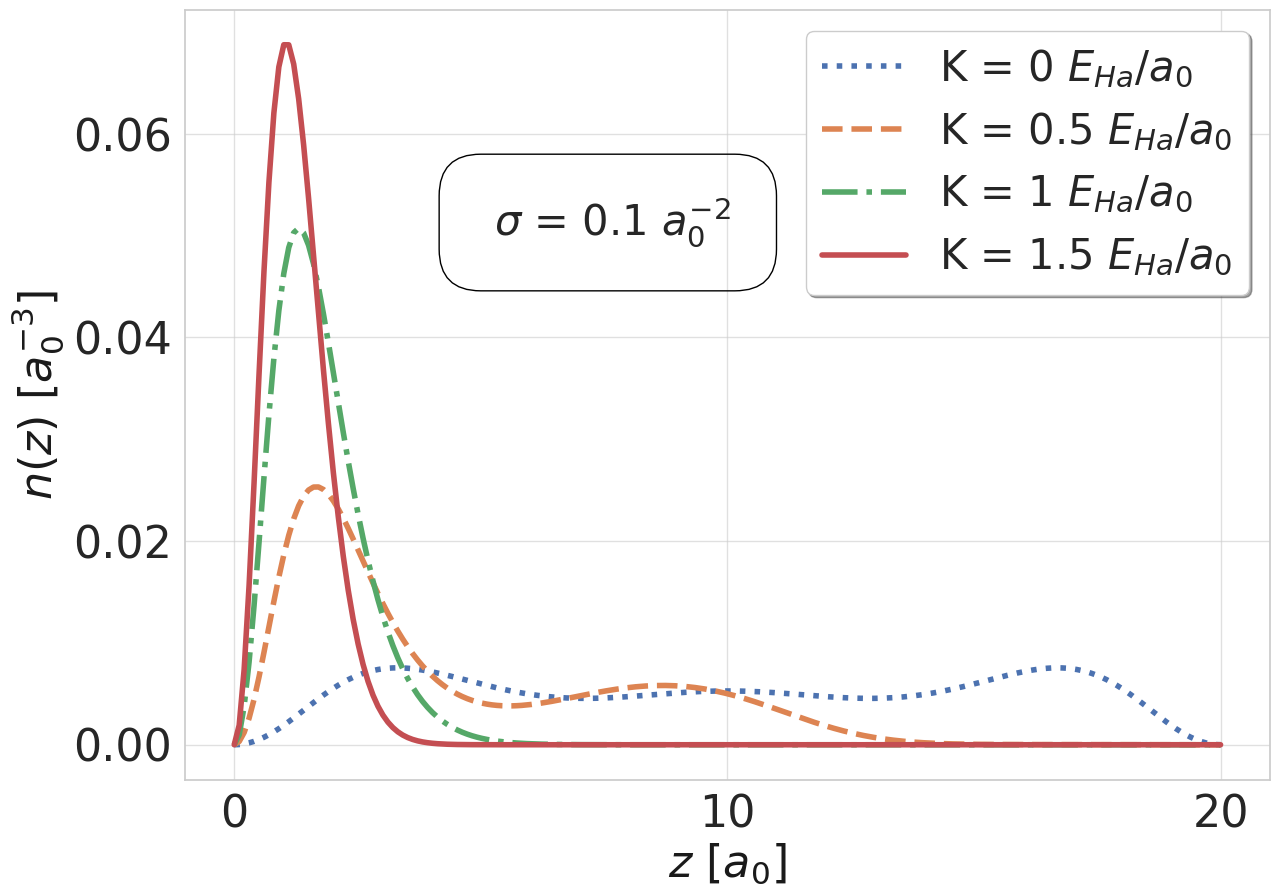

In [26]:
K = ["0","0.5", "1", "1.5"]
sigma = "0.1"
myLines = [":", "--", "-.", "-"]
plt.figure(figsize = (14,10))


conta = 0
for k in K:
    x, y = np.loadtxt("KS/DAT/density_K="+str(k)+"_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    plt.plot(x,y, label = "K = "+ str(k) +" "+r"$E_{Ha}/a_0$", linestyle = myLines[conta], linewidth = 4)
    
    conta = conta +1

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 32,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True , fontsize = 30)
plt.text(5, 0.05,r" $\sigma$ = " +str(sigma)+ r" $a_0^{-2}$"+" ", fontsize = 30, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 4)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.savefig("KS/JPEG/density_sigma="+str(sigma)+"_KS.jpeg")

BCome e' immaginabile oltreche' auspicabile, al crescere del campo, gli elettroni vanno ad accumularsi lungo i bordi. In quanto ci troviamo a basse densita' avremo solo una banda occupata e il tipico andamento a campana.

<h3>K fissato, limite di alta e bassa densita':</h3>

Andiamo ora a studiare i due limiti possibili, per fissato $K$, di alta e bassa densita' $\sigma$

<h3>Bande e sottobande</h3>

Puo' essere utile andare a studiare il riempimento delle sottovande al crescere della densita'.

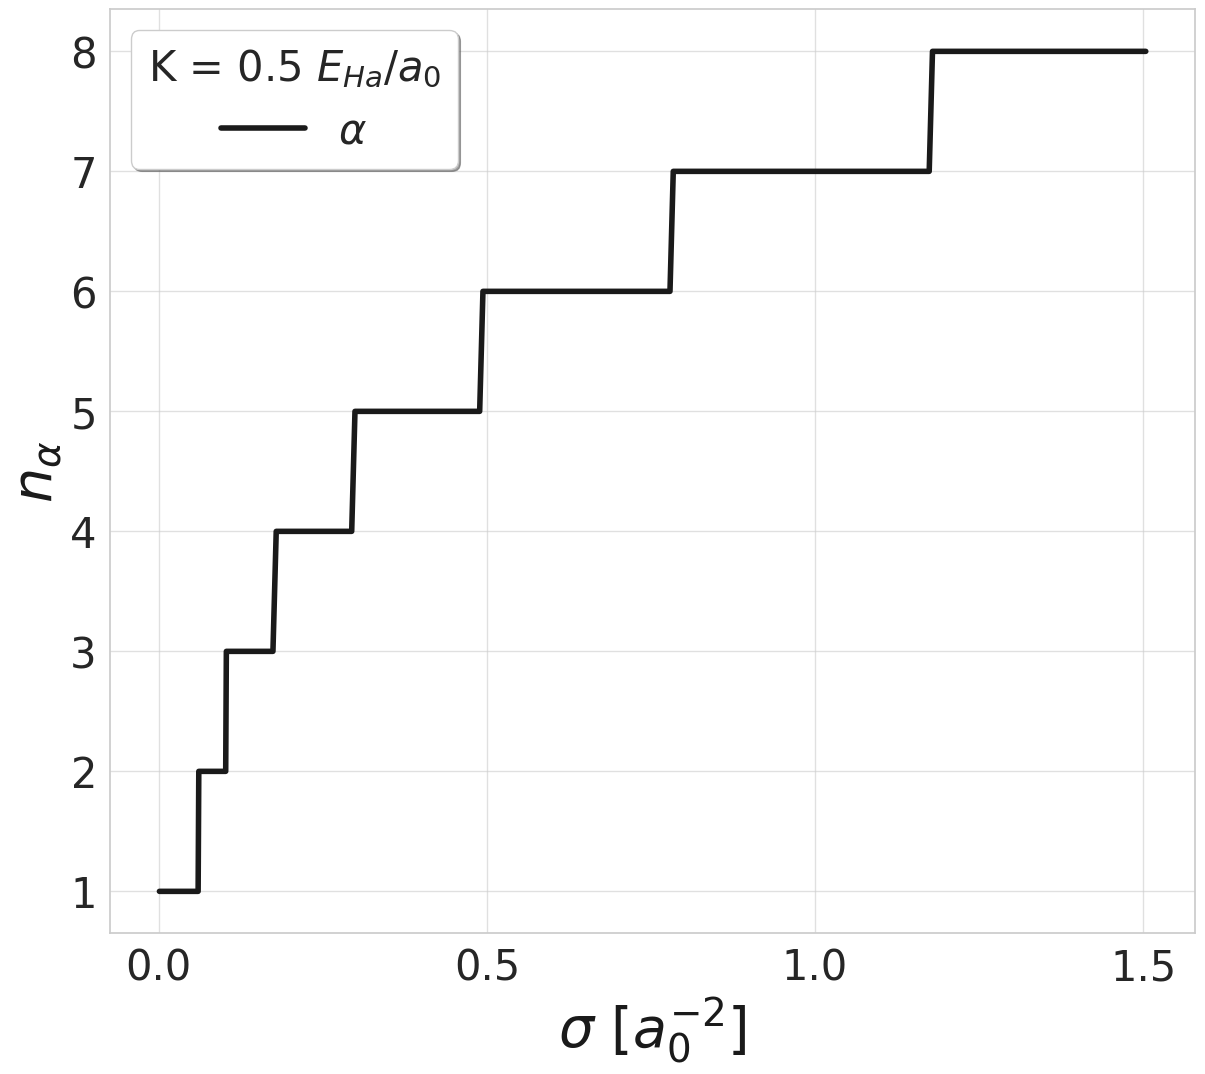

In [229]:
L = 20
K = 0.5
plt.figure(figsize = (14,12))
x, y = np.loadtxt("KS/DAT/subbands_K="+str(K)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = r"$\alpha$", c = "k", linewidth = 4)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }

plt.xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$n_{\alpha}$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, title = "K = "+str(K)+" "+r"$E_{Ha}/a_0$", fontsize = 30, title_fontsize = 30)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 5)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("KS/JPEG/subbands.jpeg")

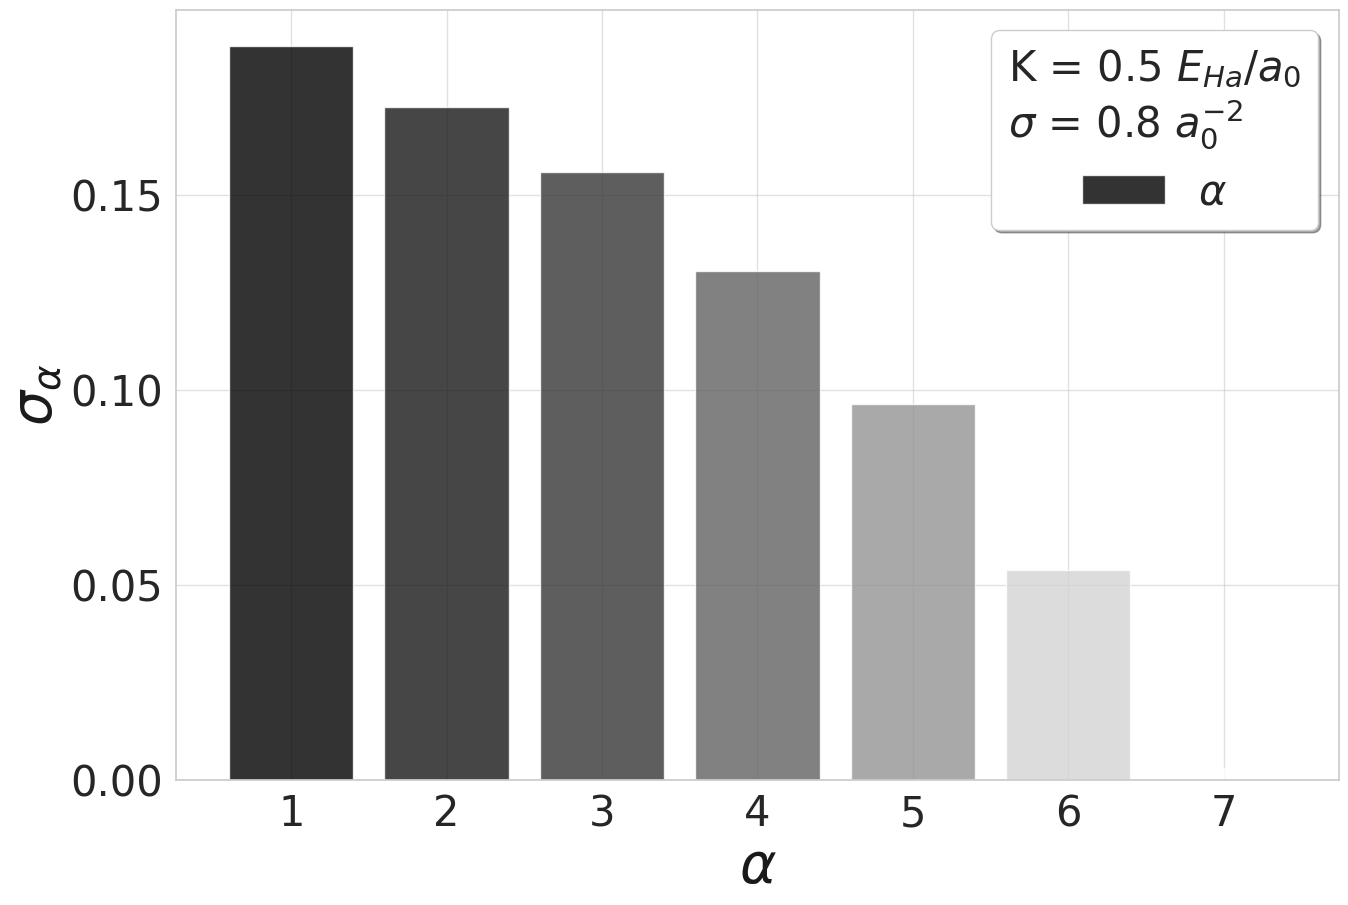

In [30]:
L = 20
K = 0.5
sigma = 0.8
plt.figure(figsize = (15,10))
x, y = np.loadtxt("KS/DAT/kF_K="+str(K)+"_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
my_cmap = plt.get_cmap("Greys")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x,y, label = r"$\alpha$", color=my_cmap(rescale(y)), alpha = 0.8)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }

plt.xlabel(r"$\alpha$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$", fontdict = font)

plt.legend(loc = "best", shadow = True, fancybox = True, title = "K = "+ str(K) +" "+r"$E_{Ha}/a_0$"+"\n" + r"$\sigma$ = " + str(sigma)+" "+r"$a_0^{-2}$", fontsize = 30, title_fontsize = 30)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "y", nbins = 5)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("KS/JPEG/kF_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

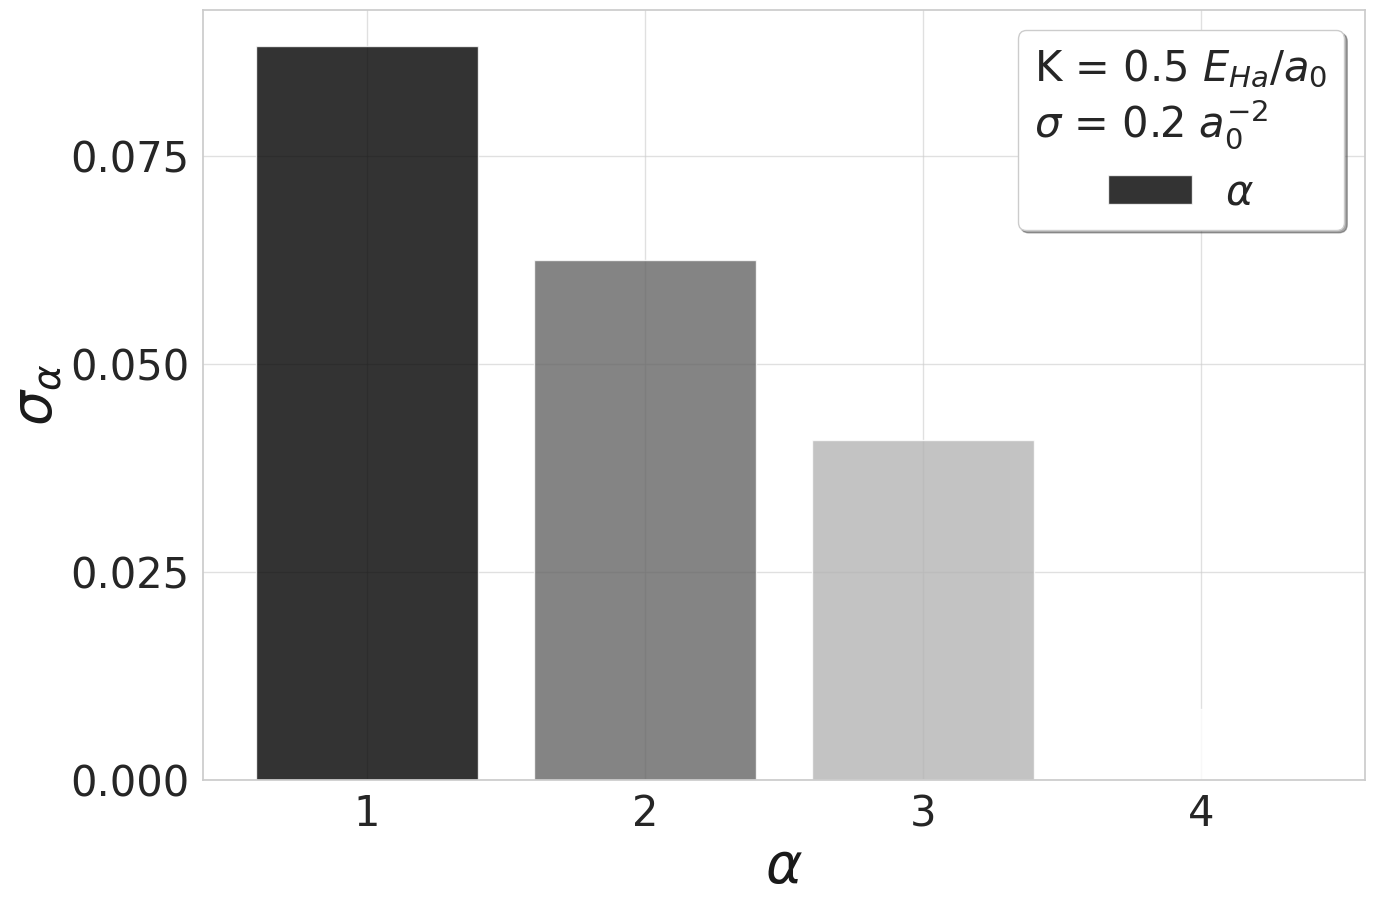

In [31]:
L = 20
K = 0.5
sigma = 0.2
plt.figure(figsize = (15,10))
x, y = np.loadtxt("KS/DAT/kF_K="+str(K)+"_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
my_cmap = plt.get_cmap("Greys")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x,y, label = r"$\alpha$", color=my_cmap(rescale(y)), alpha = 0.8)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40
        }

plt.xlabel(r"$\alpha$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$", fontdict = font)

plt.legend(loc = "best", shadow = True, fancybox = True, title = "K = "+ str(K) +" "+r"$E_{Ha}/a_0$"+"\n" + r"$\sigma$ = " + str(sigma)+" "+r"$a_0^{-2}$", title_fontsize = 30, fontsize = 30)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "y", nbins = 4)
plt.locator_params(axis = "x", nbins = 5)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("KS/JPEG/kF_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

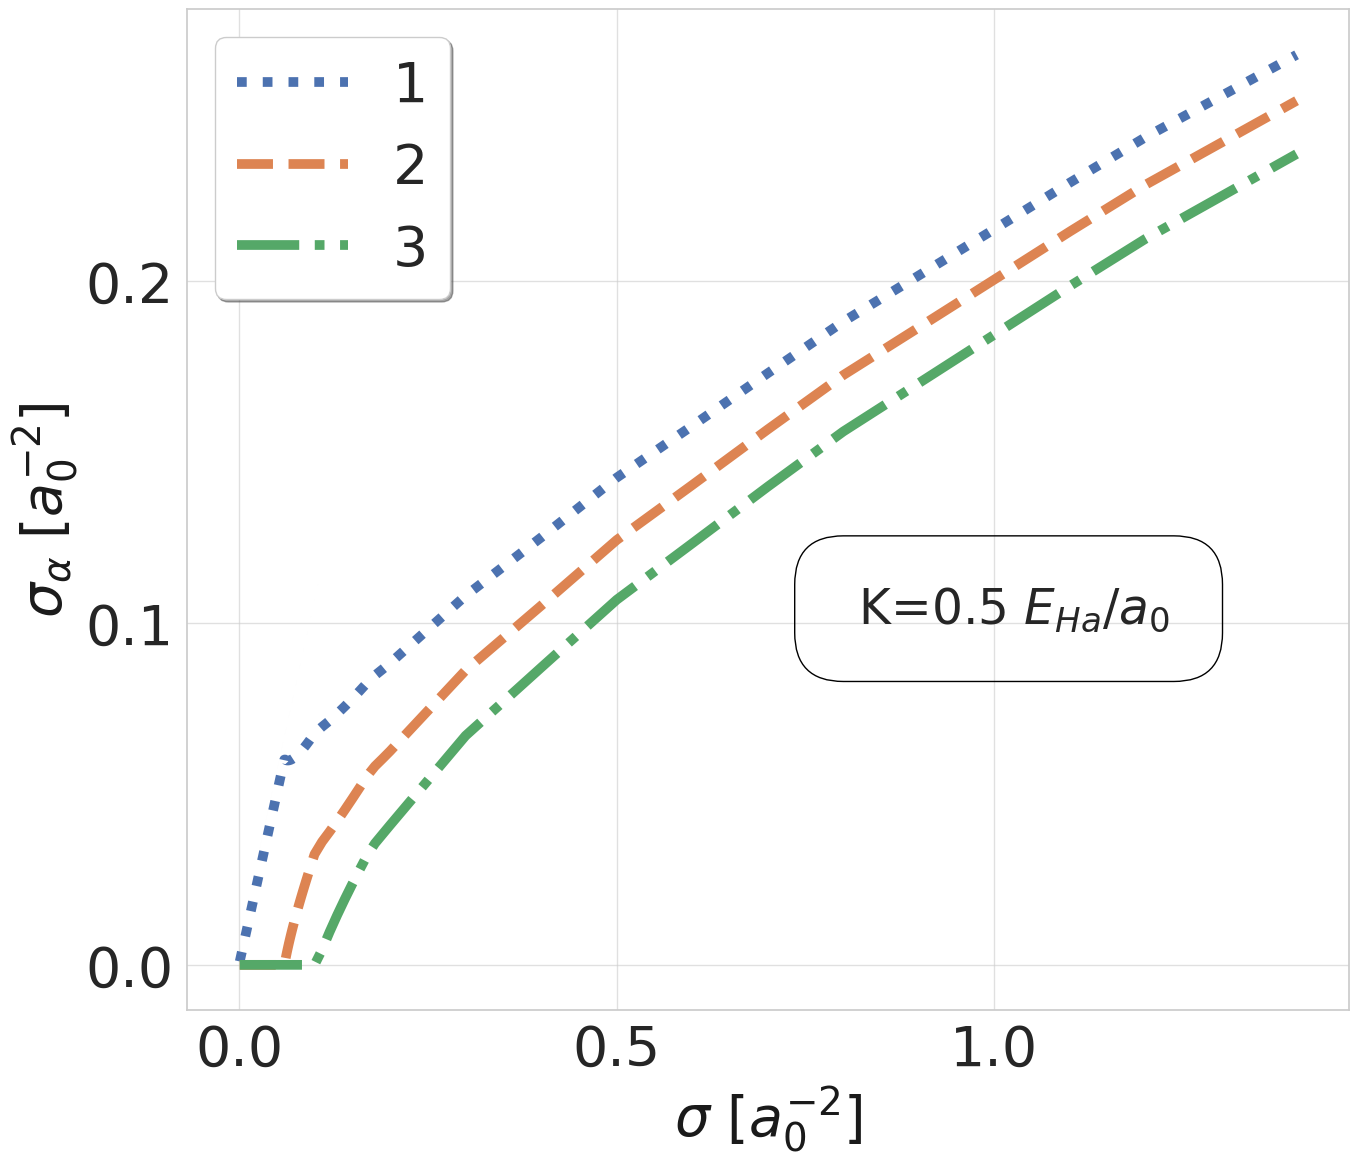

In [282]:
L = 20
K = 0.5
plt.figure(figsize = (15,13))
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 7)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 7)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 7)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 40)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 35, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
#plt.subplots_adjust(left=0.1)
plt.savefig("KS/JPEG/sigma_alpha_K="+str(K)+"_KS.jpeg")

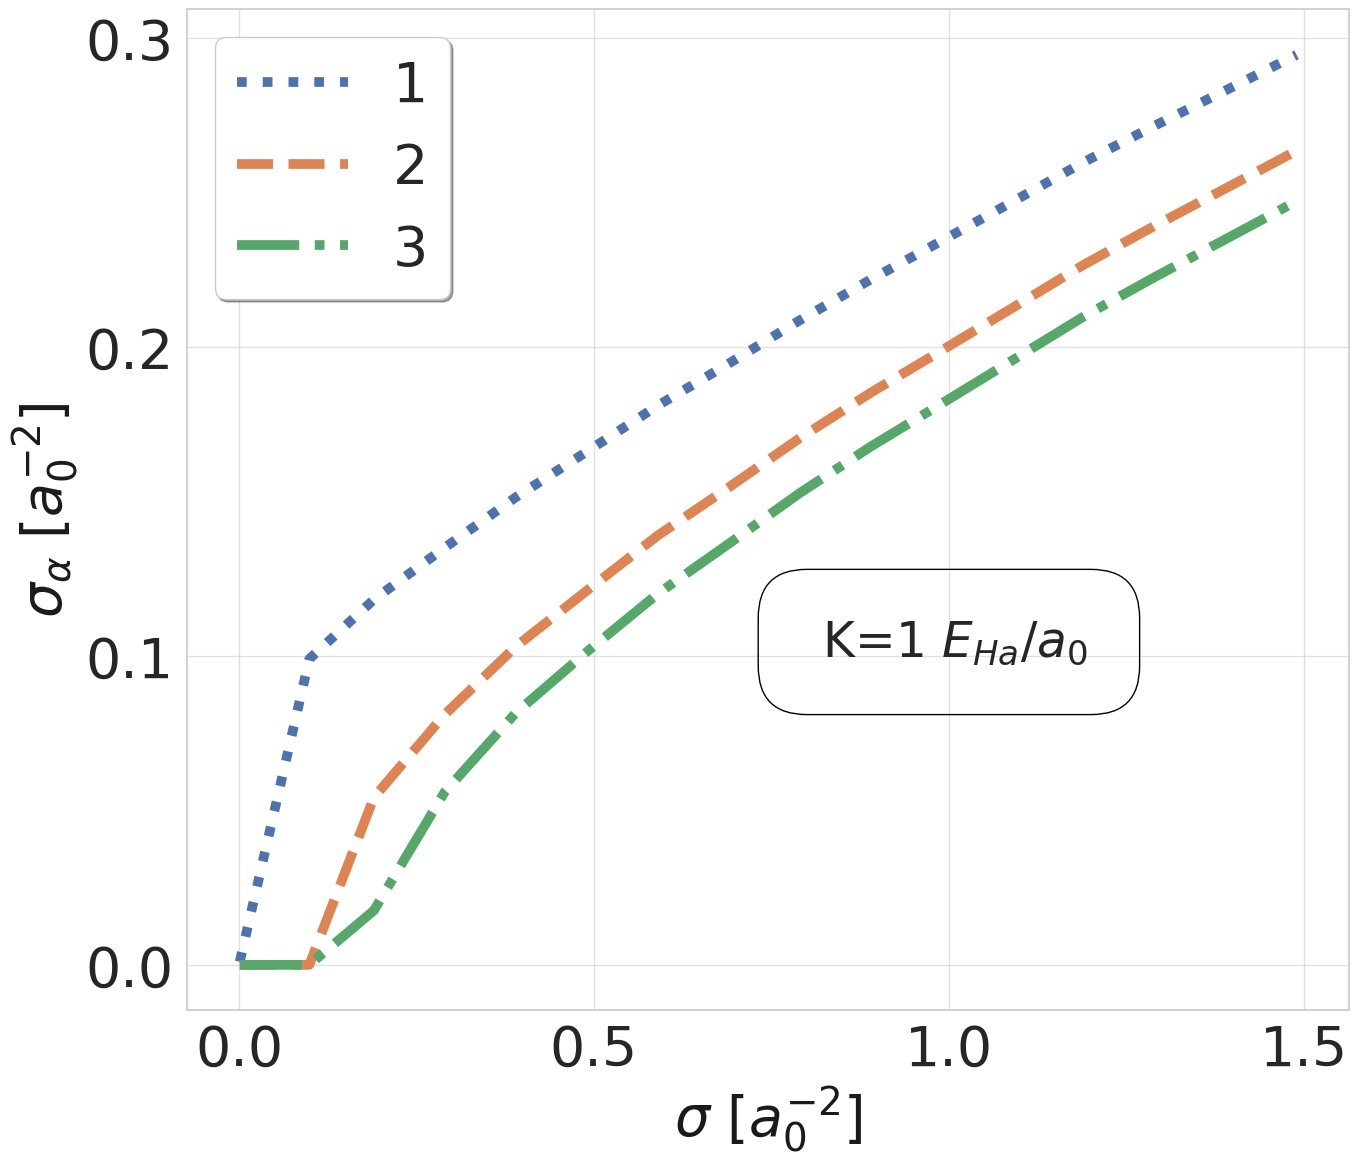

In [281]:
L = 20
K = 1
plt.figure(figsize = (15,13))
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 7)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 7)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 7)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 40,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 40)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 35, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
#plt.subplots_adjust(left=0.1)
plt.savefig("KS/JPEG/sigma_alpha_K="+str(K)+"_KS.jpeg")

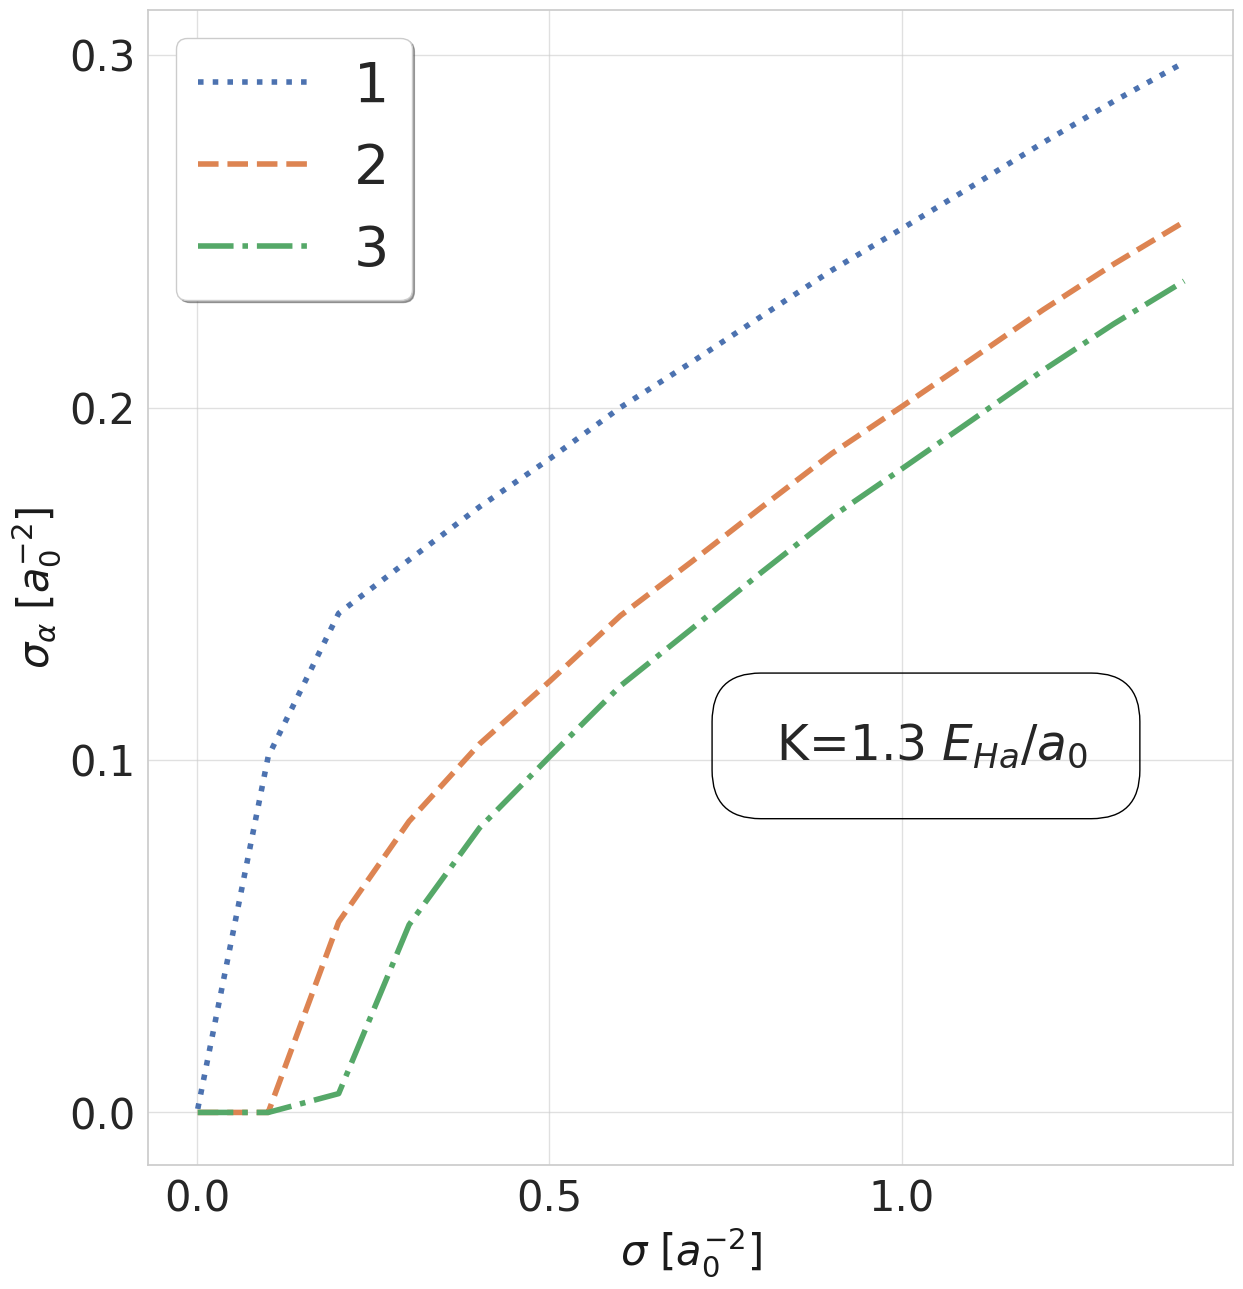

In [275]:
L = 20
K = 1.3
plt.figure(figsize = (14,15))
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 4)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 4)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 4)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 30,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 40)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 35, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#plt.subplots_adjust(left=0.1)
plt.savefig("KS/JPEG/sigma_alpha_K="+str(K)+"_KS.jpeg")

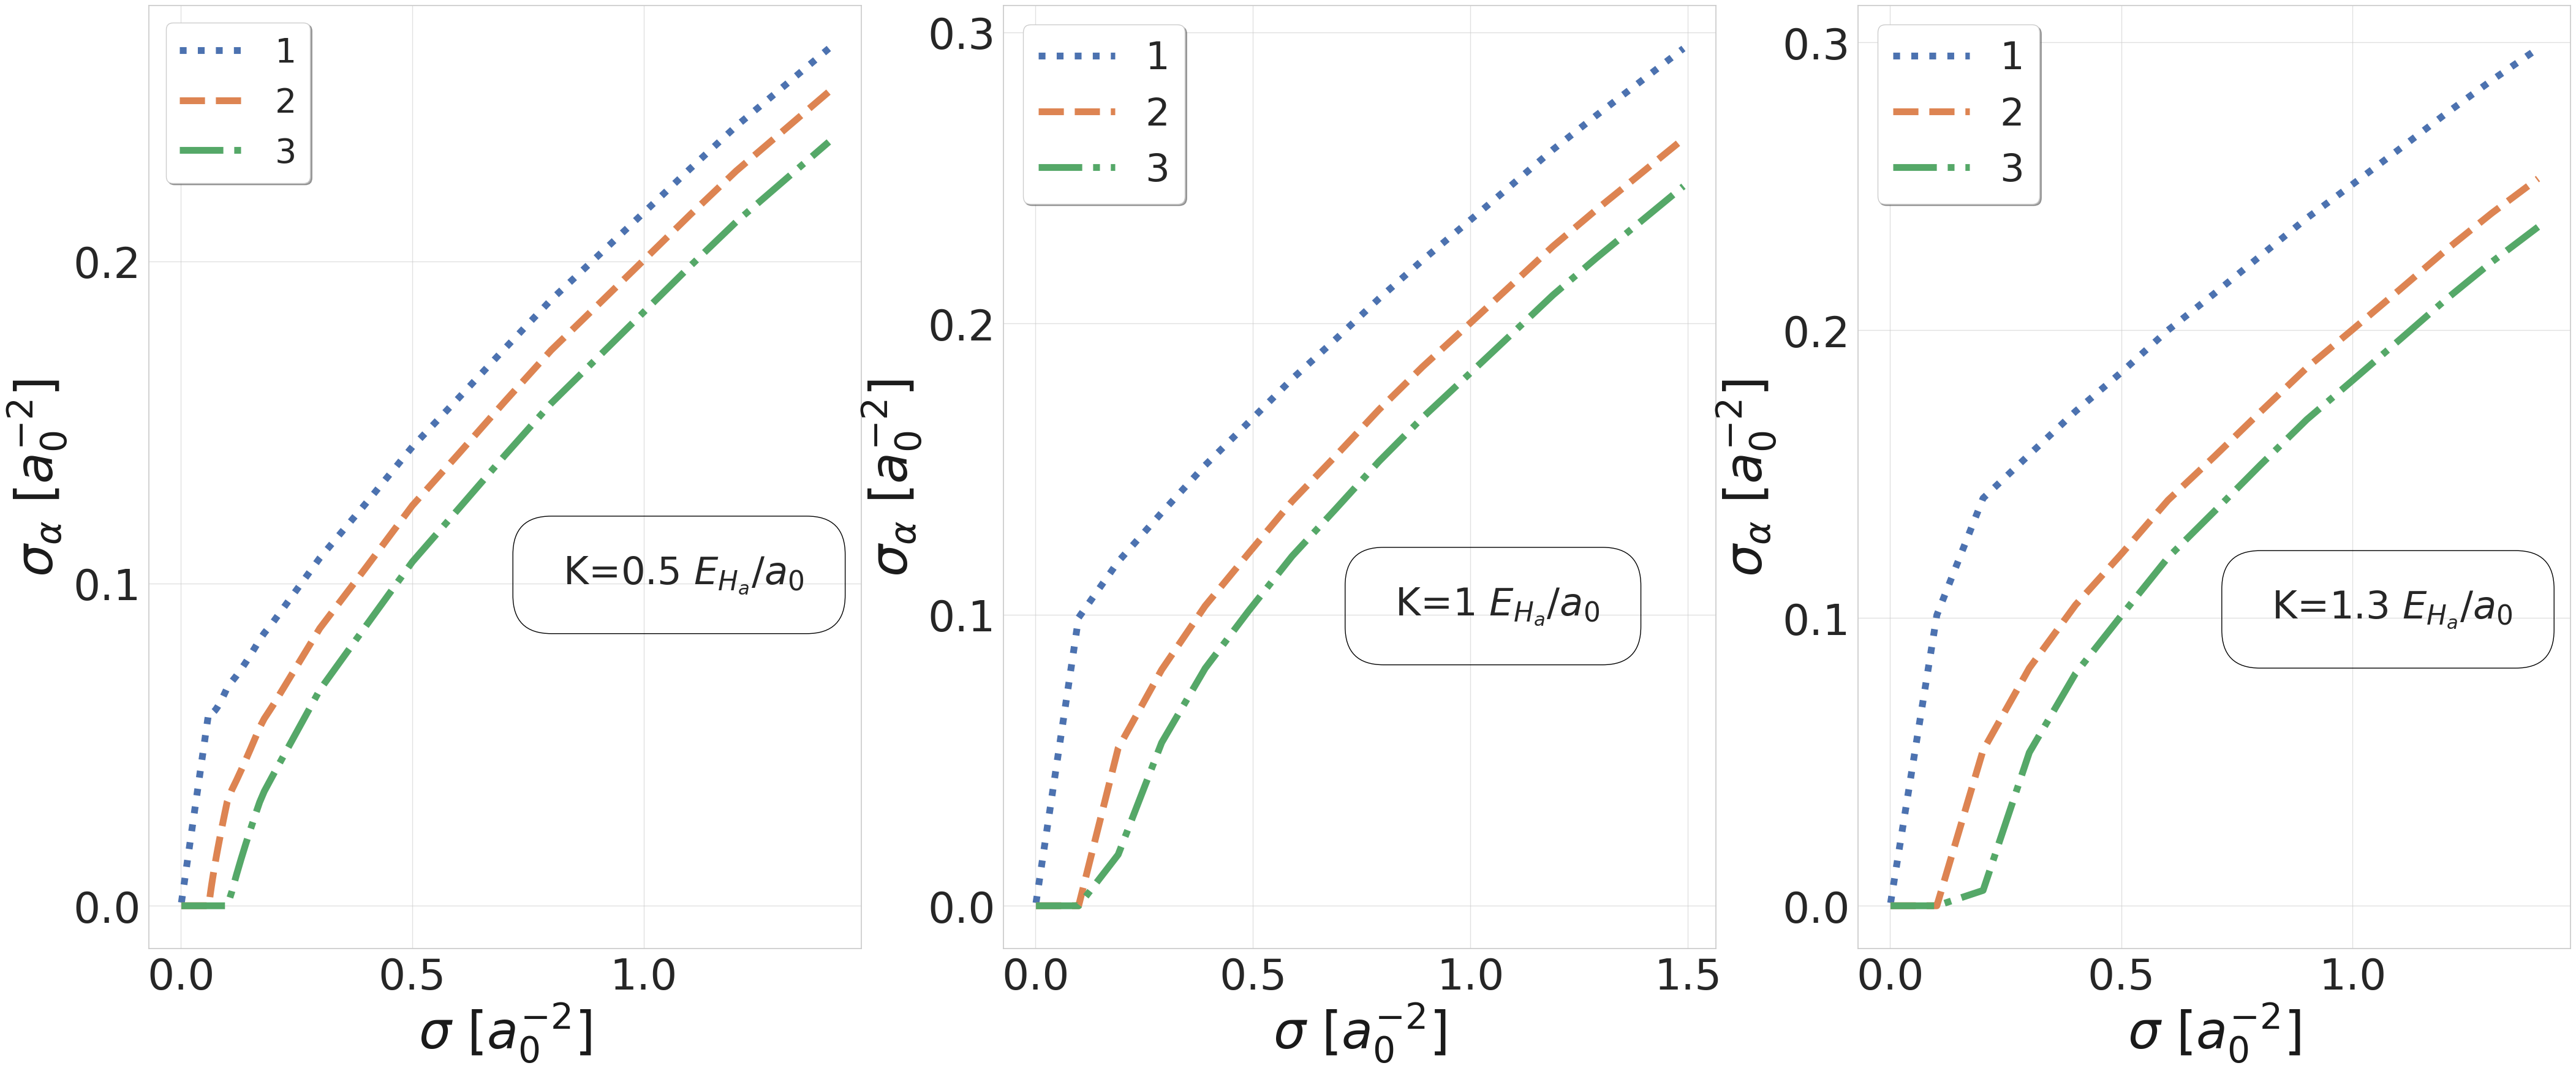

In [28]:
plt.figure(figsize = (51,20))
plt.subplot(1,3,1)
L = 20
K = 0.5
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 8)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 8)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 8)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 60,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 40)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{H_a}/a_0$"+" ", fontsize = 45, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.subplot(1,3,2)
L = 20
K = 1
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 8)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 8)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 8)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 60,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 45)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{H_a}/a_0$"+" ", fontsize = 45, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.subplot(1,3,3)
L = 20
K = 1.3
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 8)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 8)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 8)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 60,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 45)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{H_a}/a_0$"+" ", fontsize = 45, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.savefig("KS/JPEG/sigma_alpha.jpeg")

<h3>Autovalori</h3>

Si riportano i livelli energetivi al variare della densita' per le prime 4 bande.

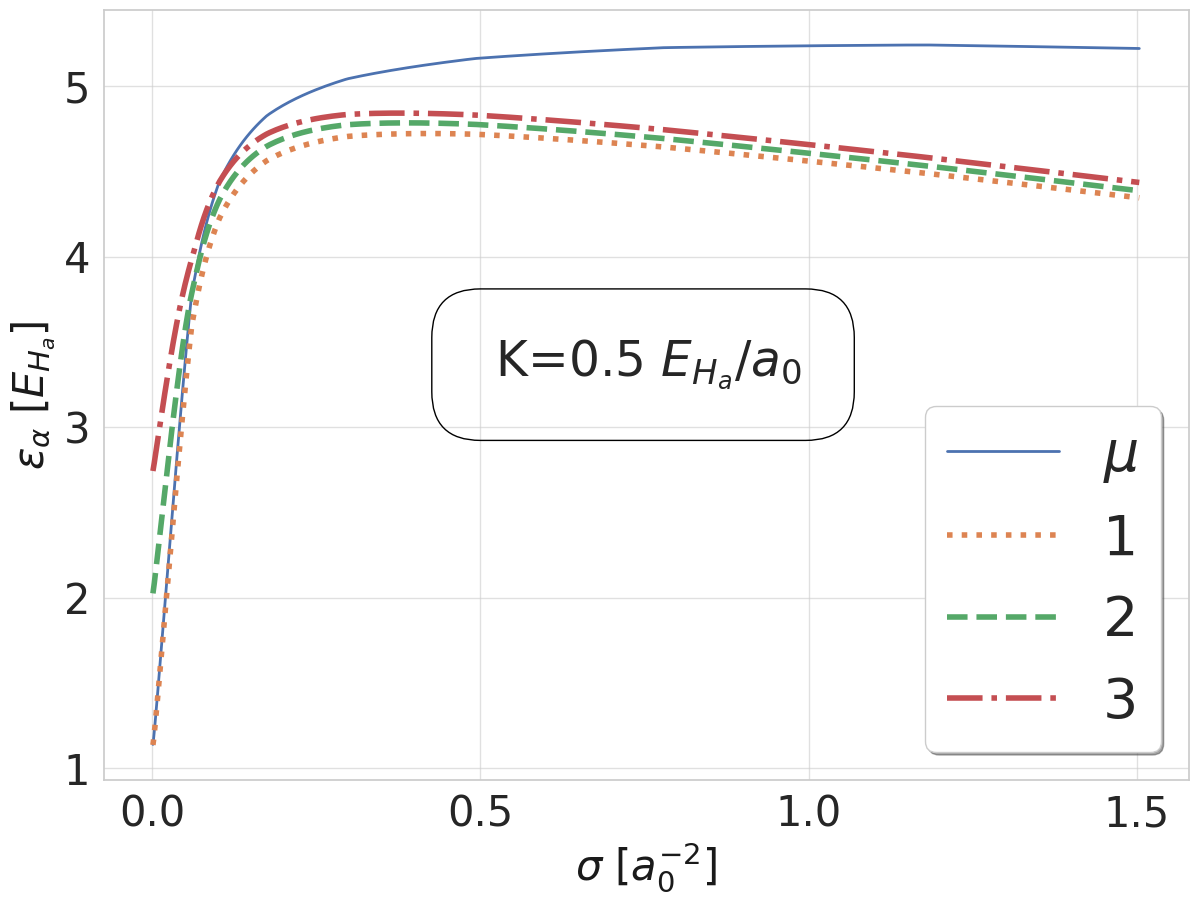

In [29]:
L = 20
K = 0.5
plt.figure(figsize = (14,10))
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/eigenvalues_result_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
x = x*L
plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 4)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 4)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 4)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 30,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\epsilon_{\alpha}$ $[E_{H_a}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 40)
plt.text(0.5, 3.3,s =" "+"K=" + str(K)+" "+ r"$E_{H_a}/a_0$"+" ", fontsize = 35, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#plt.subplots_adjust(left=0.1)
plt.savefig("KS/JPEG/eigenvalues.jpeg")

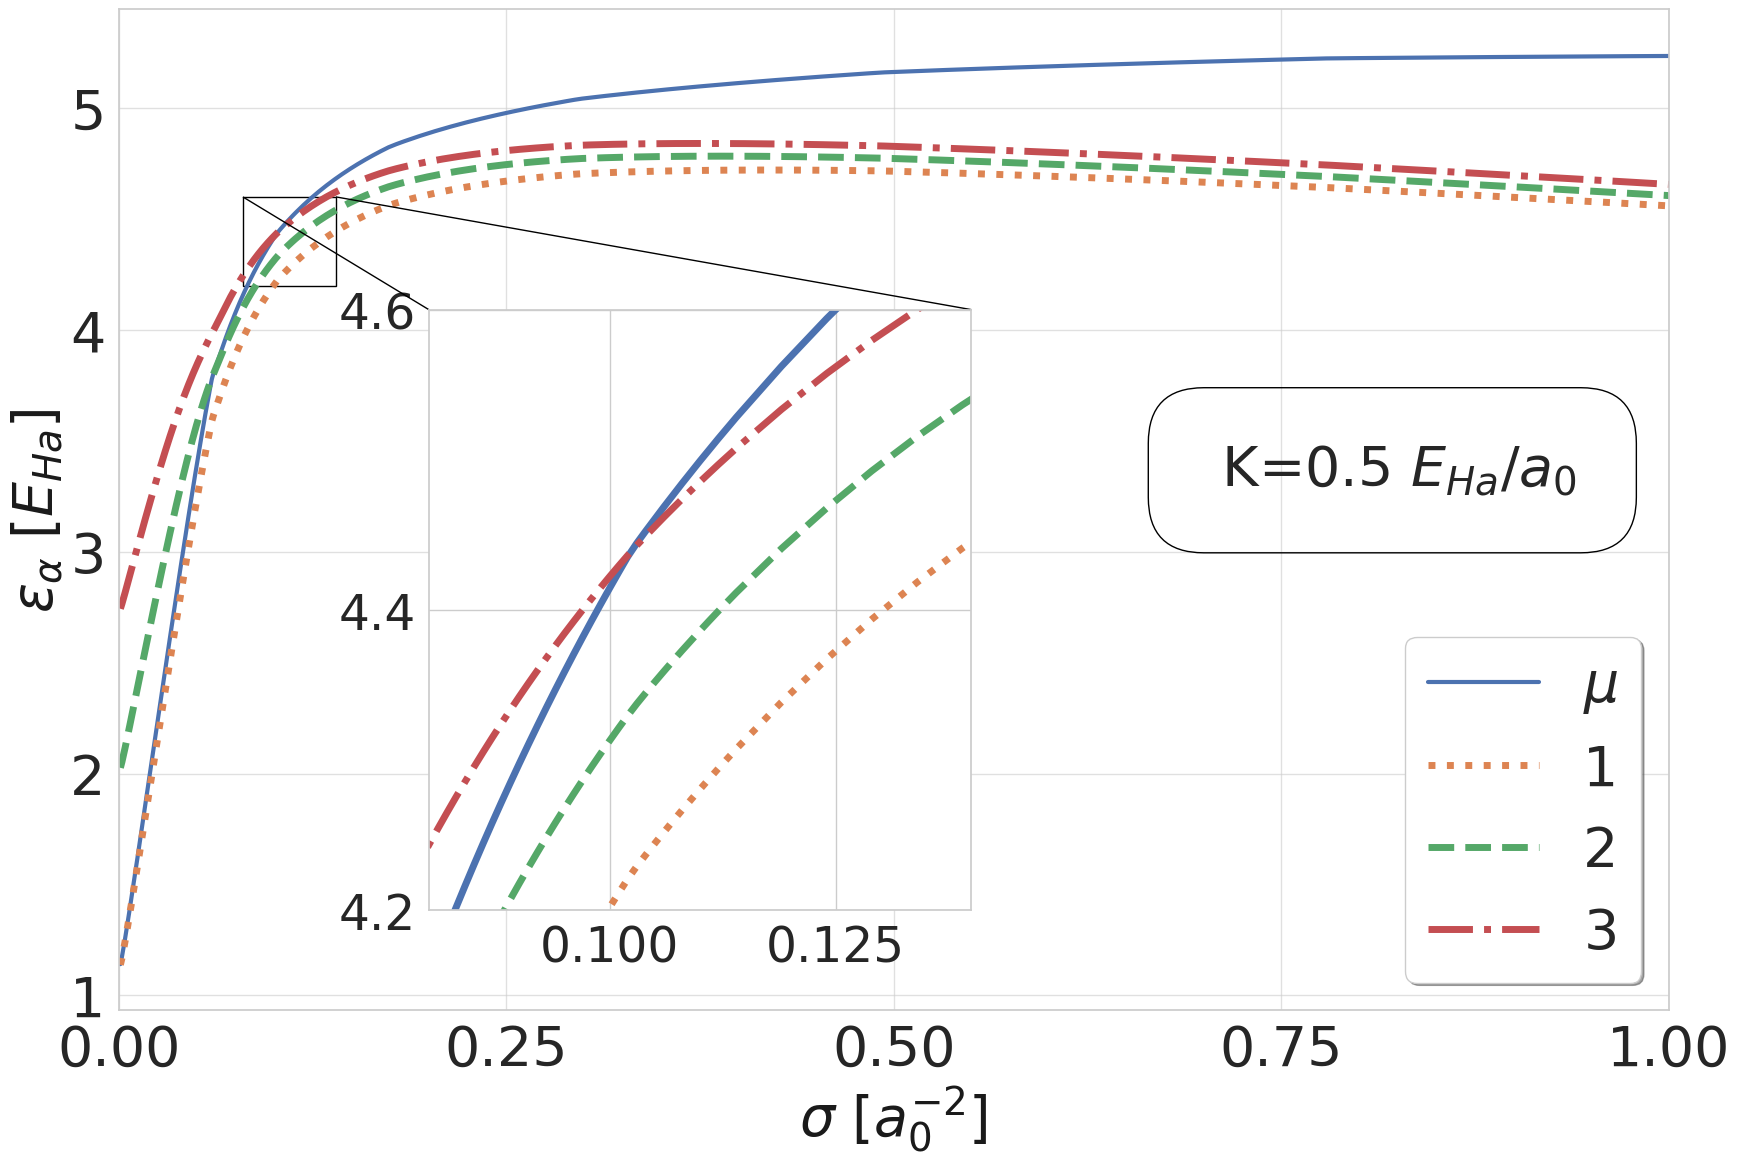

In [52]:
L = 20
K = 0.5
fig, ax = plt.subplots(figsize=[20, 13])

x1, x2, y1, y2 = 0.08, 0.14, 4.2, 4.6
axins = ax.inset_axes([0.2,0.1 ,0.35,0.6])
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
x, yF, y1, y2, y3 =  np.loadtxt("KS/DAT/eigenvalues_result_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
x = x*L
ax.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 3)
ax.plot(x,y1, label = str(1), linestyle = ":", linewidth = 5)
ax.plot(x,y2, label = str(2), linestyle = "--", linewidth = 5)
ax.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 5)
ax.set_xlim(0,1)
axins.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 5)
axins.plot(x,y1, label = str(1), linestyle = ":", linewidth = 5)
axins.plot(x,y2, label = str(2), linestyle = "--", linewidth = 5)
axins.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 5)
axins.locator_params(axis = "x", nbins = 2)
axins.locator_params(axis = "y", nbins = 2)
axins.tick_params(axis='x', labelsize=35)
axins.tick_params(axis='y', labelsize=35)
font = { "family":"serif",
        "color":"k",
        "weight":"normal",
        "size":40,
       }
ax.legend(loc = "lower right", shadow = True, fancybox = True, fontsize = 40)
ax.grid(axis = "both", alpha = 0.6)
ax.locator_params(axis = "x", nbins = 4)
ax.locator_params(axis = "y", nbins = 5)
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
ax.set_xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
ax.set_ylabel(r"$\epsilon_{\alpha}$ $[E_{Ha}]$", fontdict=font)
plt.text(0.7, 3.3,s =" "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 40, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
#plt.subplots_adjust(left=0.1)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.001")
plt.savefig("KS/JPEG/eigenvalues.jpeg")

<h3>Autofunzioni:</h3>

Andiamo ad indagare il comportamento degli autostati soluzione del problema di KS

K =  0.5
SIGMA =  0.2


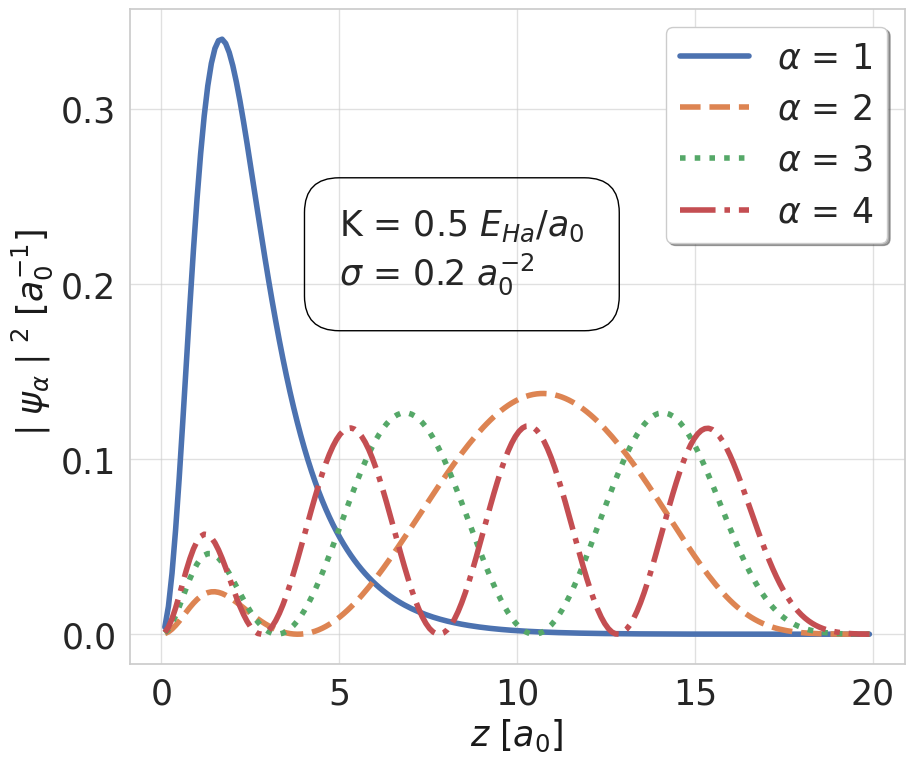

In [184]:
K = 0.5
sigma = 0.2
print("K = ", K)
print("SIGMA = ", sigma)
plt.figure(figsize = (10,8.5))

x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_1.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = r"$\alpha$ = " +str(1), linestyle = "-", linewidth = 4)
x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_2.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label =r"$\alpha$ = " +str(2), linestyle = "--", linewidth = 4)
x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_3.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label =r"$\alpha$ = " +str(3), linestyle = ":", linewidth = 4)
x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_4.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = r"$\alpha$ = " +str(4), linestyle = "-.", linewidth = 4)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)

font = { "family":"serif",
        "color":"k",
        "weight":"normal",
        "size":25,
       }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$\mid \psi_{\alpha} \mid^{2}$"+" "+"$[a_0^{-1}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 25)
plt.grid(axis = "both", alpha = 0.6)
plt.text(5, 0.2,s = "K = "+ str(K)+" "+r"$E_{Ha}/a_0$"+"\n"+r"$\sigma$ = "+ str(sigma)+" "+ r"$a_0^{-2}$", fontsize = 25, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig("KS/JPEG/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

<h3>Energia </h3>

<h4>Energia Totale</h4>

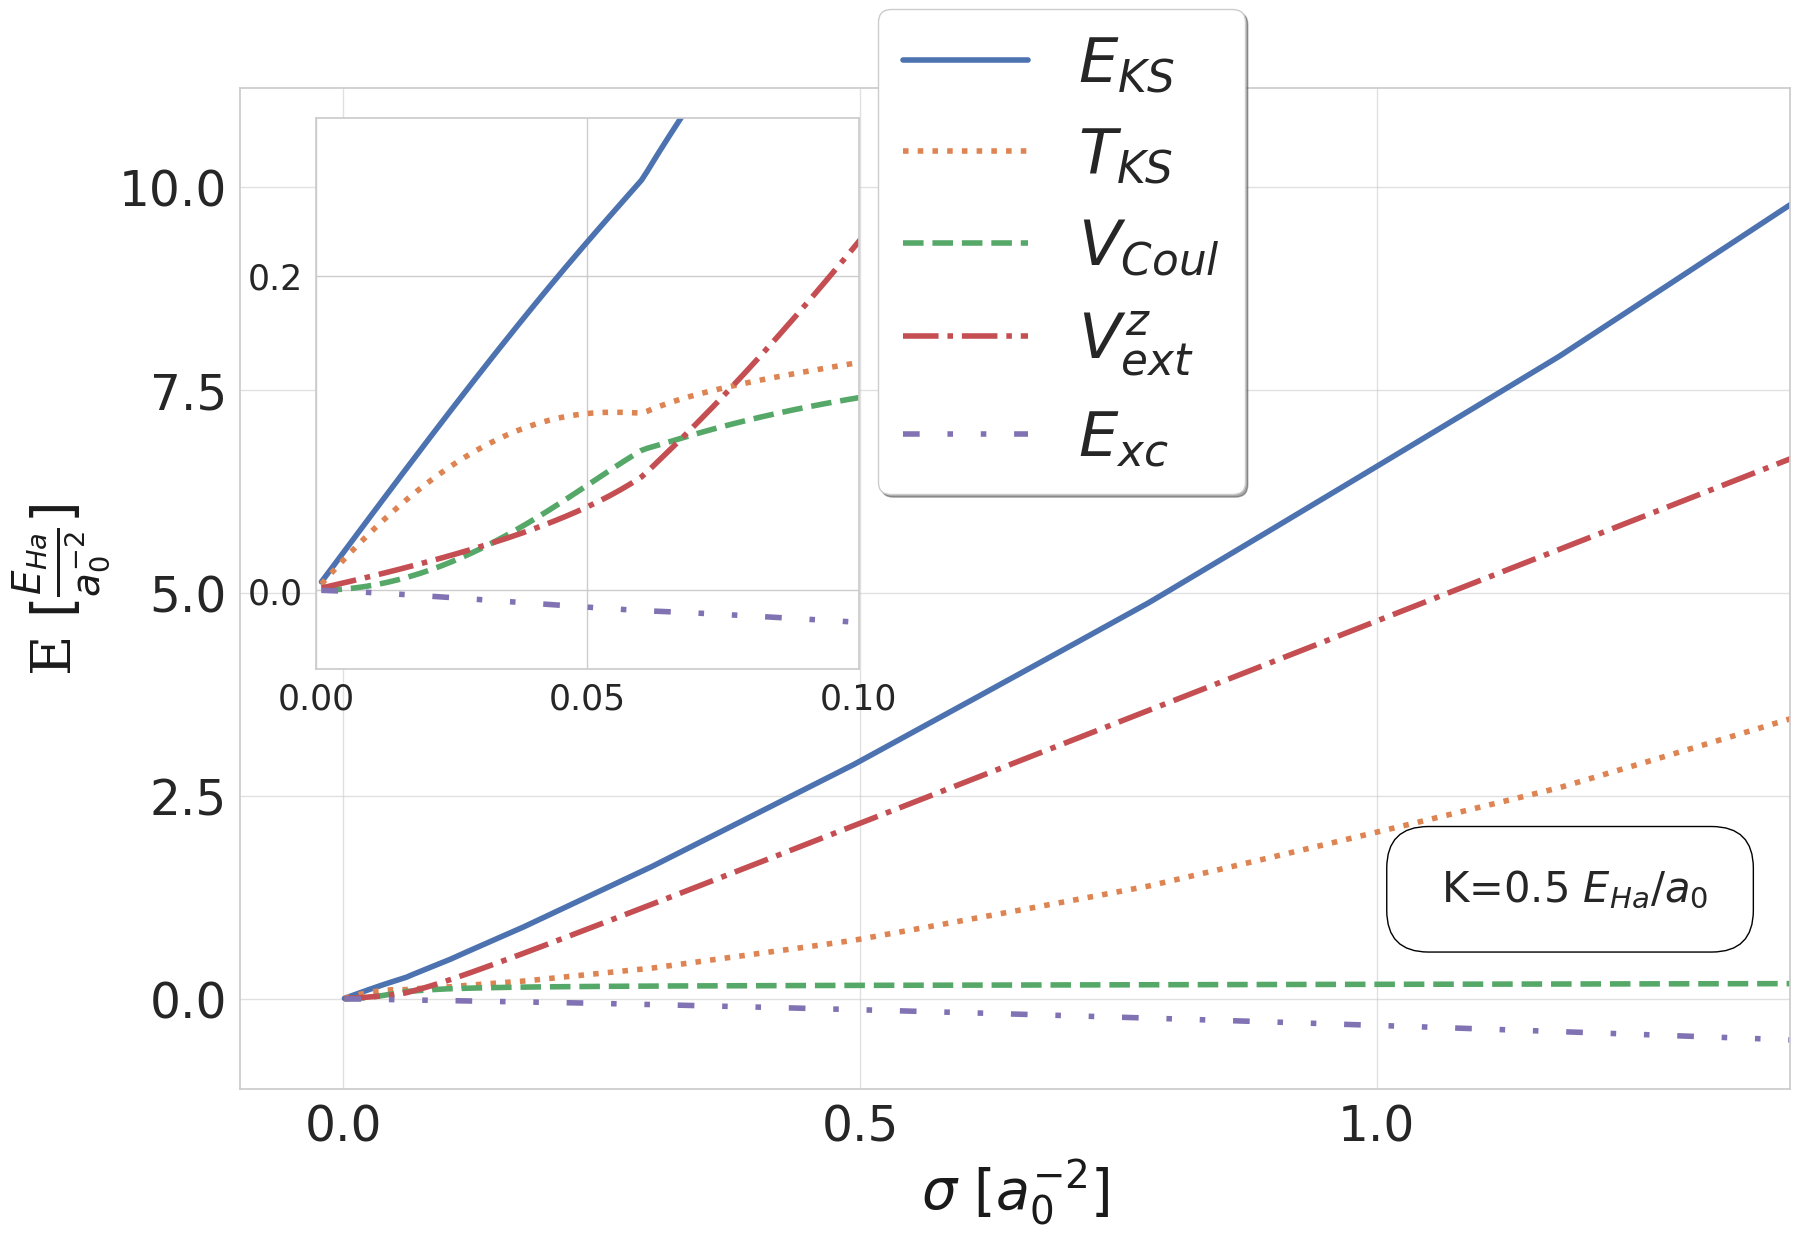

In [30]:
L = 20
K = 0.5
fig, ax = plt.subplots(figsize=[20, 13])

x1, x2, y1, y2 = 0., 0.1, -0.05, 0.3
axins = ax.inset_axes([0.049, 0.42,0.35,0.55])
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)

x, y, y2, y3, y4, y5 = np.loadtxt("KS/DAT/energy_K="+str(K)+".dat", usecols = (0,1,2,3,4,5), delimiter = " ", unpack = "true")
ax.plot(x,y, label = r"$E_{KS}$", linewidth = 4)
ax.plot(x,y2,label = r"$T_{KS}$",linestyle = ":", linewidth = 4)
ax.plot(x,y3, label = r"$V_{Coul}$",linestyle = "--", linewidth = 4)
ax.plot(x,y4, label = r"$V_{ext}^z$",linestyle = "-.", linewidth = 4)
ax.plot(x,y5,label = r"$E_{xc}$",linestyle = (0, (3, 5, 1, 5, 1, 5)), linewidth = 4)
ax.set_xlim(-0.1, 1.4)
axins.plot(x,y, label = r"$E_{KS}$", linewidth = 4)
axins.plot(x,y2,label = r"$T_{KS}$",linestyle = ":", linewidth = 4)
axins.plot(x,y3, label = r"$V_{Coul}$",linestyle = "--", linewidth = 4)
axins.plot(x,y4, label = r"$V_{ext}^z$",linestyle = "-.", linewidth = 4)
axins.plot(x,y5,label = r"$E_{xc}$",linestyle = (0, (3, 5, 1, 5, 1, 5)), linewidth = 4)
axins.locator_params(axis = "x", nbins = 2)
axins.locator_params(axis = "y", nbins = 2)
axins.tick_params(axis='x', labelsize=25)
axins.tick_params(axis='y', labelsize=25)
font = { "family":"serif",
        "color":"k",
        "weight":"normal",
        "size":40,
       }
ax.text(1.05, 1.2," "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 30, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
ax.set_xlabel(r"$\sigma$"+" "+ r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" "+r"$[\frac{E_{Ha}}{a_0^{-2}}]$", fontdict = font)
ax.legend(loc = "upper center", shadow = True, fancybox = True,fontsize = 45, bbox_to_anchor = (0.53,1.11))
ax.grid(axis = "both", alpha = 0.6)
ax.locator_params(axis = "x", nbins = 4)
ax.locator_params(axis = "y", nbins = 5)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
#mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.001")
plt.savefig("KS/JPEG/Energy_KS.jpeg")

<h4>Energia di Coulomb</h4>

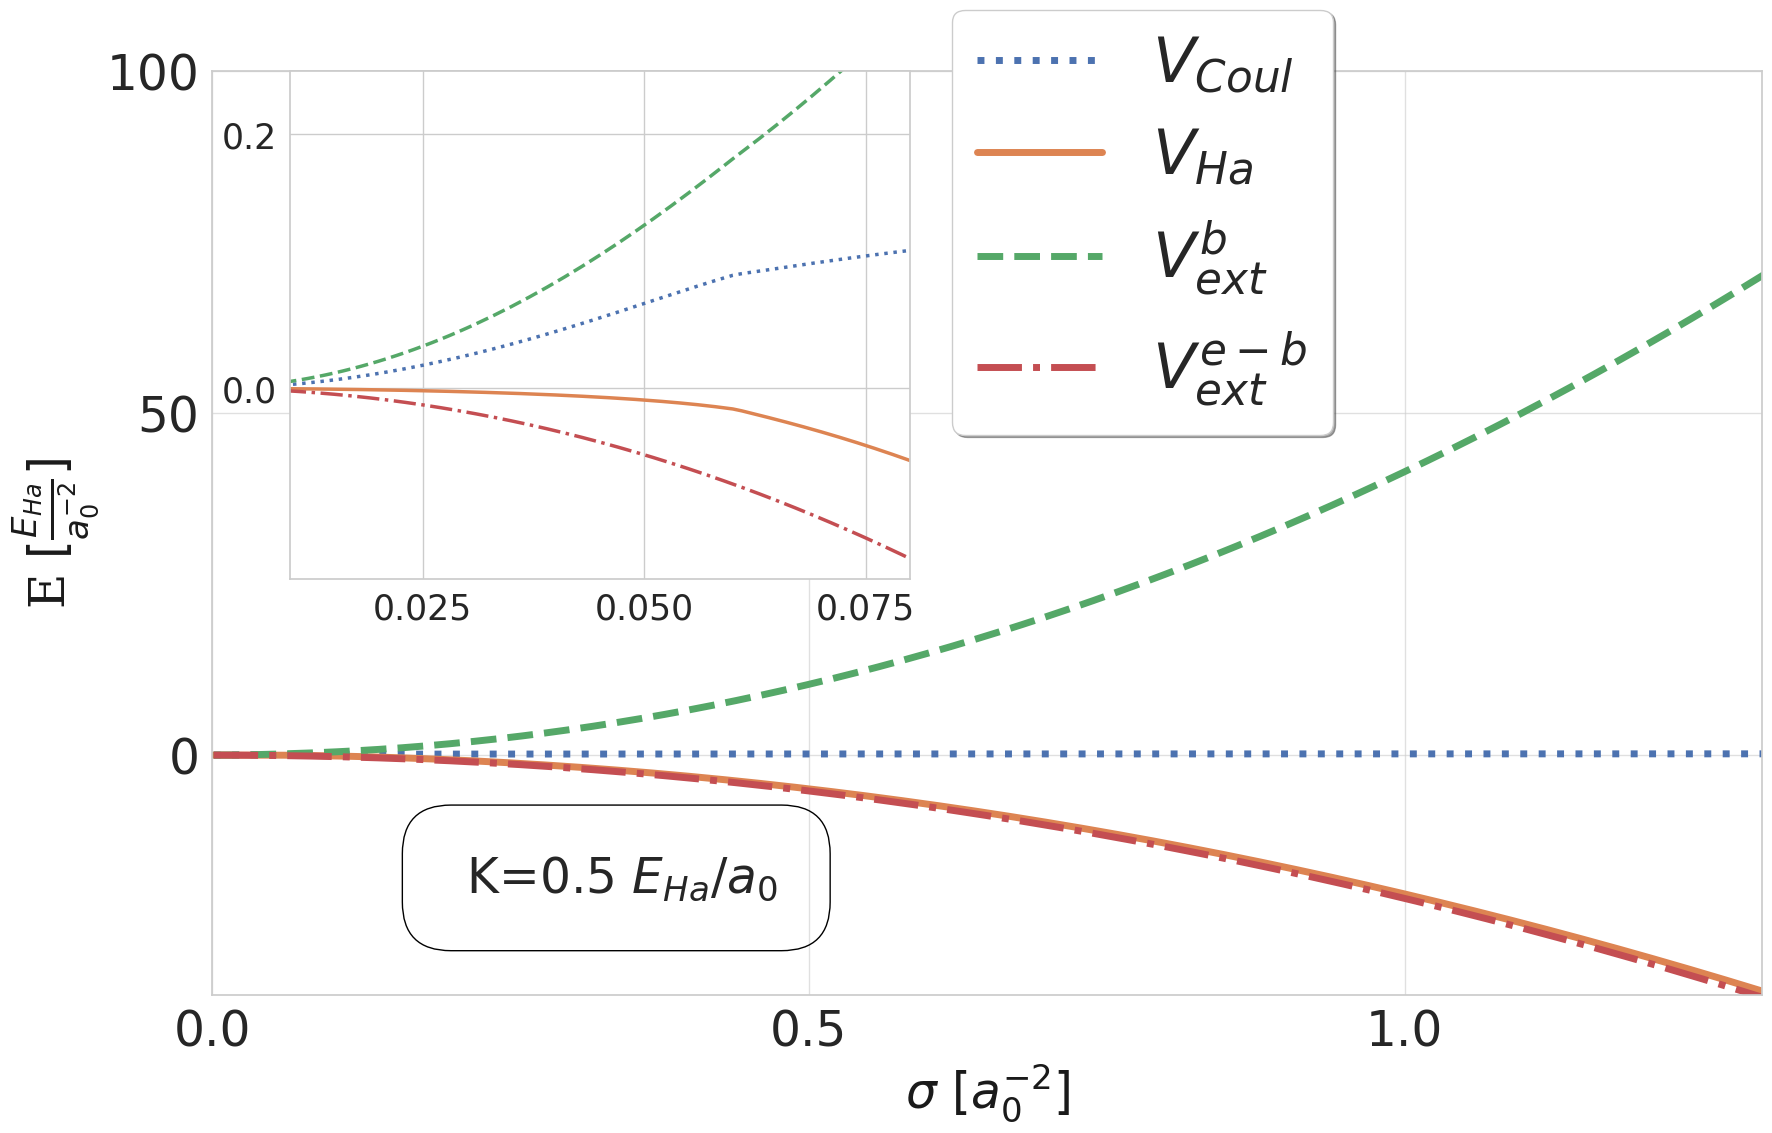

In [7]:
fig, ax = plt.subplots(figsize=[20, 12])
K = 0.5
x1, x2, y1, y2 = 0.01, 0.08, -0.15, 0.25
axins = ax.inset_axes([0.05, 0.45,0.40,0.55])
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
font = {"family":"serif", "color":"ForestGreen", "size":"30"}

x, ycoul, yH, yb, ybb = np.loadtxt("KS/DAT/energy_K="+str(K)+".dat", usecols = (0,3,7,9,10), delimiter = " ", unpack = "true")
ax.plot(x,ycoul,label = r"$V_{Coul}$",linestyle = ":", linewidth = 5)
ax.plot(x,yH, label = r"$V_{Ha}$",linestyle = "-", linewidth =5)
ax.plot(x,yb, label = r"$V_{ext}^{b}$",linestyle = "--", linewidth = 5)
ax.plot(x,ybb,label = r"$V_{ext}^{e-b}$",linestyle = "-.", linewidth = 5)
ax.set_xlim(0,1.3)
ax.set_ylim(-35,100)
axins.plot(x,ycoul,label = r"$V_{Coul}$",linestyle = ":", linewidth = 2.5)
axins.plot(x,yH, label = r"$V_{Ha}$",linestyle = "-", linewidth = 2.5)
axins.plot(x,yb, label = r"$V_{ext}^{b}$",linestyle = "--", linewidth = 2.5)
axins.plot(x,ybb,label = r"$V_{ext}^{e-b}$",linestyle = "-.", linewidth = 2.5)
axins.locator_params(axis = "x", nbins = 2)
axins.locator_params(axis = "y", nbins = 2)
axins.tick_params(axis='x', labelsize=25)
axins.tick_params(axis='y', labelsize=25)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 35,
        }
ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict=font )
ax.set_ylabel("E"+" "+r"$[\frac{E_{Ha}}{a_0^{-2}}]$", fontdict=font)
ax.legend(loc = "upper center", shadow = True, fancybox = True, fontsize = 45, bbox_to_anchor = (0.6,1.1))
ax.grid(axis = "both", alpha = 0.6)
ax.text(0.2, -20," "+"K=" + str(K)+" "+ r"$E_{Ha}/a_0$"+" ", fontsize = 35, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

#mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.001")
ax.locator_params(axis = "x", nbins = 4)
ax.locator_params(axis = "y", nbins = 5)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
plt.savefig("KS/JPEG/energy_coul.jpeg")

<h2>CONFRONTO</h2>

<h3>Alte densita'</h3>

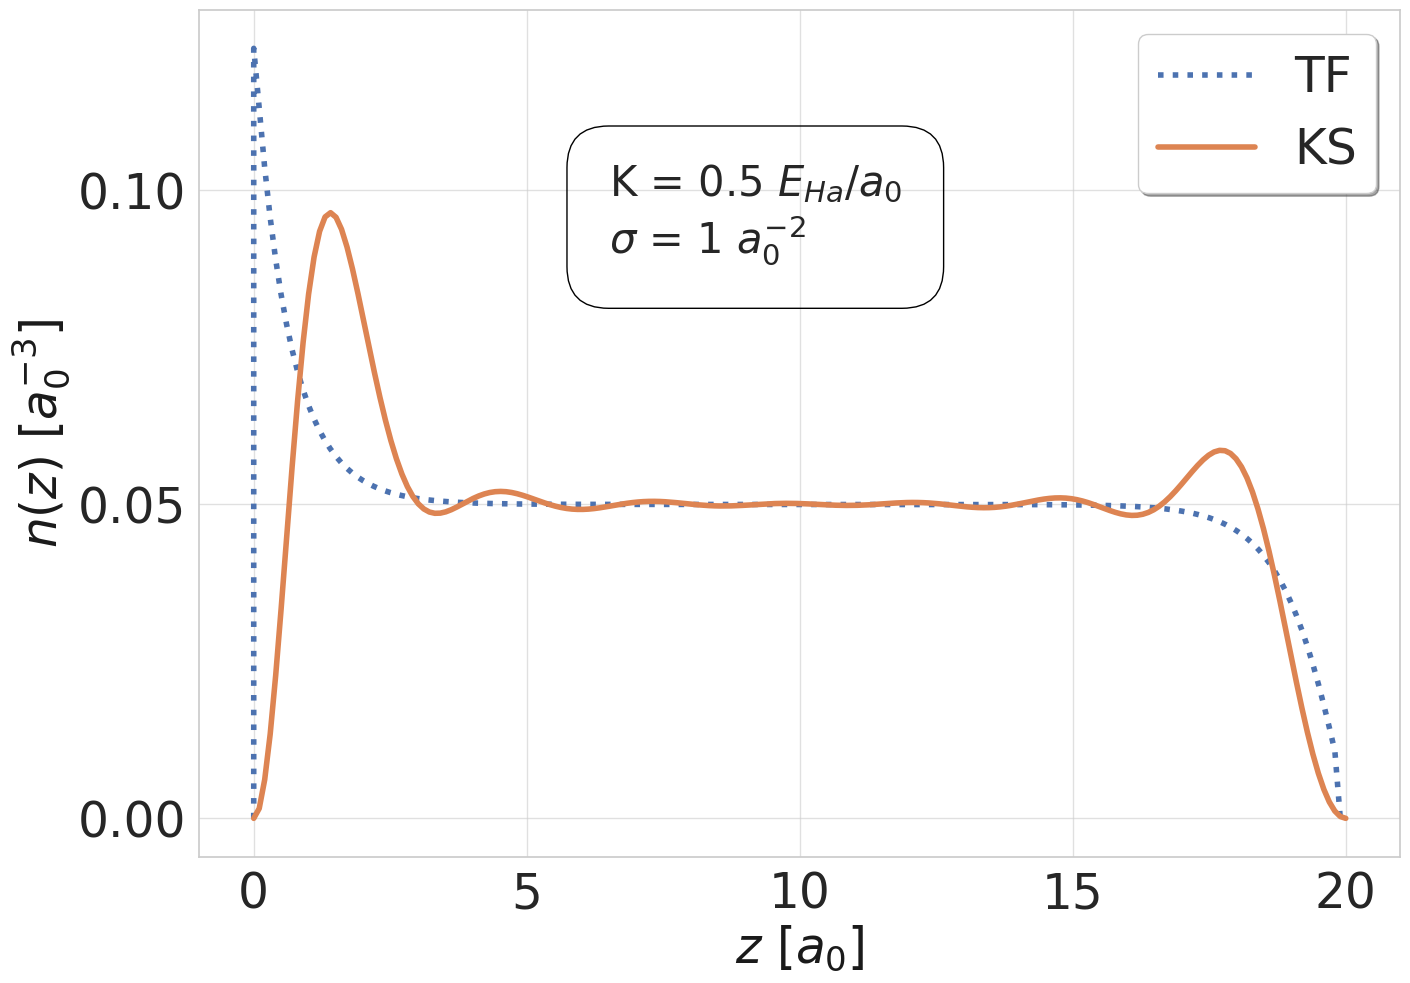

In [40]:
K = "0.5"
sigma = "1"


plt.figure(figsize = (15.5,11))

x, y = np.loadtxt("TF/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "TF", linestyle = ":", linewidth = 4 )
x, y = np.loadtxt("KS/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "KS", linestyle = "-", linewidth = 4)


font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 35,
        }

plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True,  fontsize = 35)
plt.grid(axis = "both", alpha = 0.6)
plt.text(6.5, 0.09,s ="K = "+K +" "+r"$E_{Ha}/a_0$"+"\n"+r"$\sigma$ = "+ sigma+" "+ r"$a_0^{-2}$", fontsize = 30, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.savefig("JPEG/density_comparison_K="+str(K)+"_sigma="+str(sigma)+".jpeg")


<h3>Basse densita'</h3>

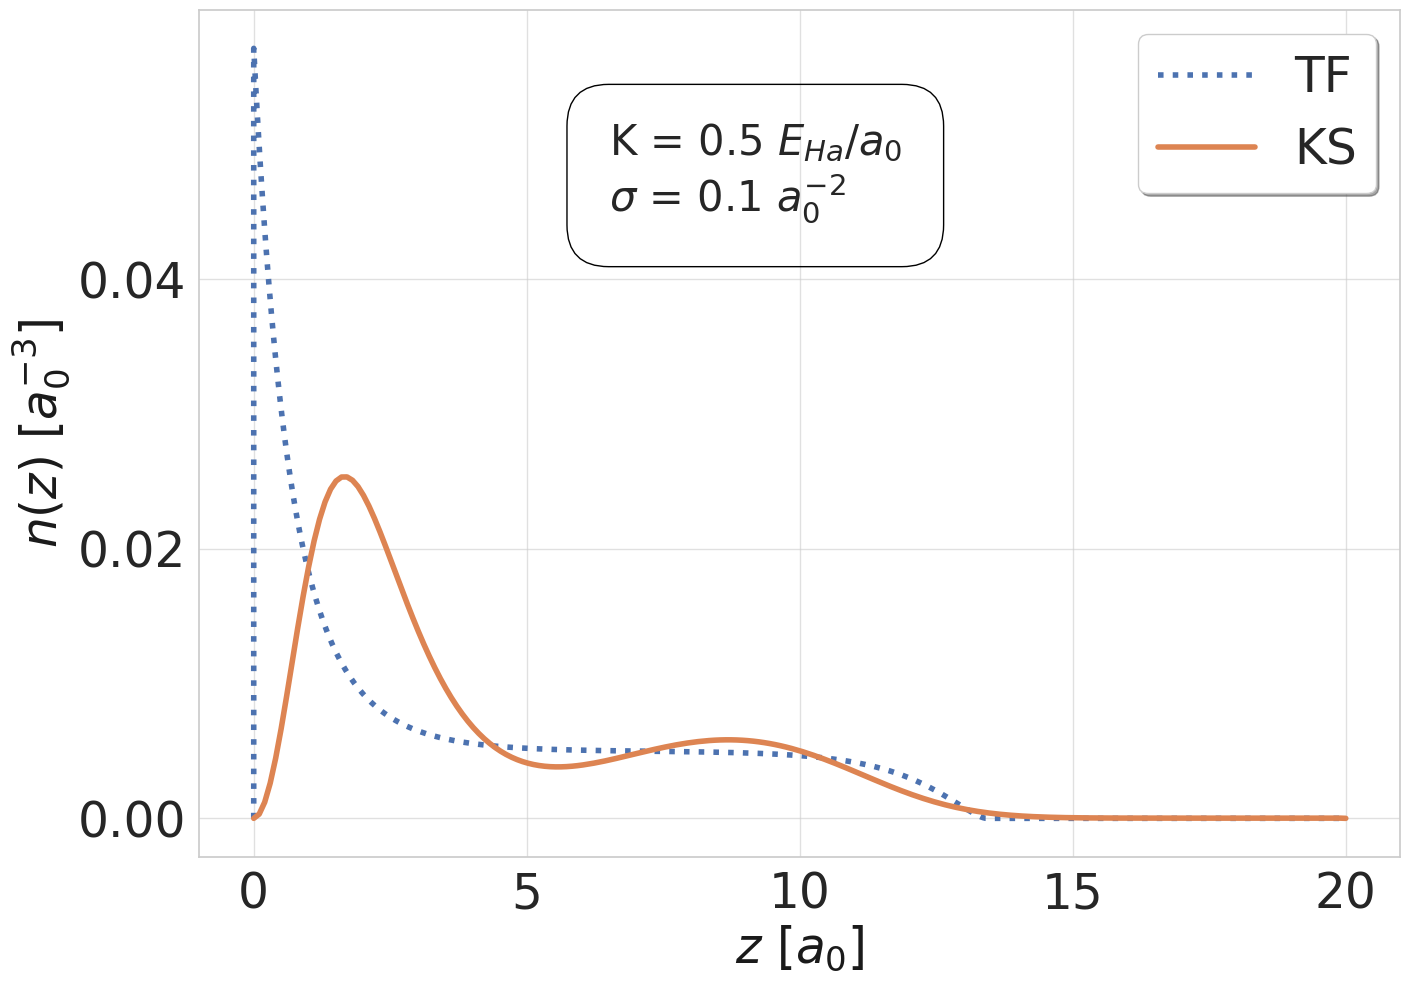

In [201]:
K = "0.5"
sigma = "0.1"


plt.figure(figsize = (15.5,11))
x, y = np.loadtxt("TF/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
x_a = np.array([0])
y_a = np.array([0])
x_a =np.concatenate((x_a, x), axis=0)
y_a = np.concatenate((y_a,y), axis = 0)
plt.plot(x_a,y_a, label = "TF", linestyle = ":", linewidth = 4)

x, y = np.loadtxt("KS/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "KS", linestyle = "-", linewidth = 4)


font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 35,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 35)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.text(6.5, 0.045,s ="K = "+K +" "+r"$E_{Ha}/a_0$"+"\n"+r"$\sigma$ = "+ sigma+" "+ r"$a_0^{-2}$", fontsize = 30, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.savefig("JPEG/density_comparison_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

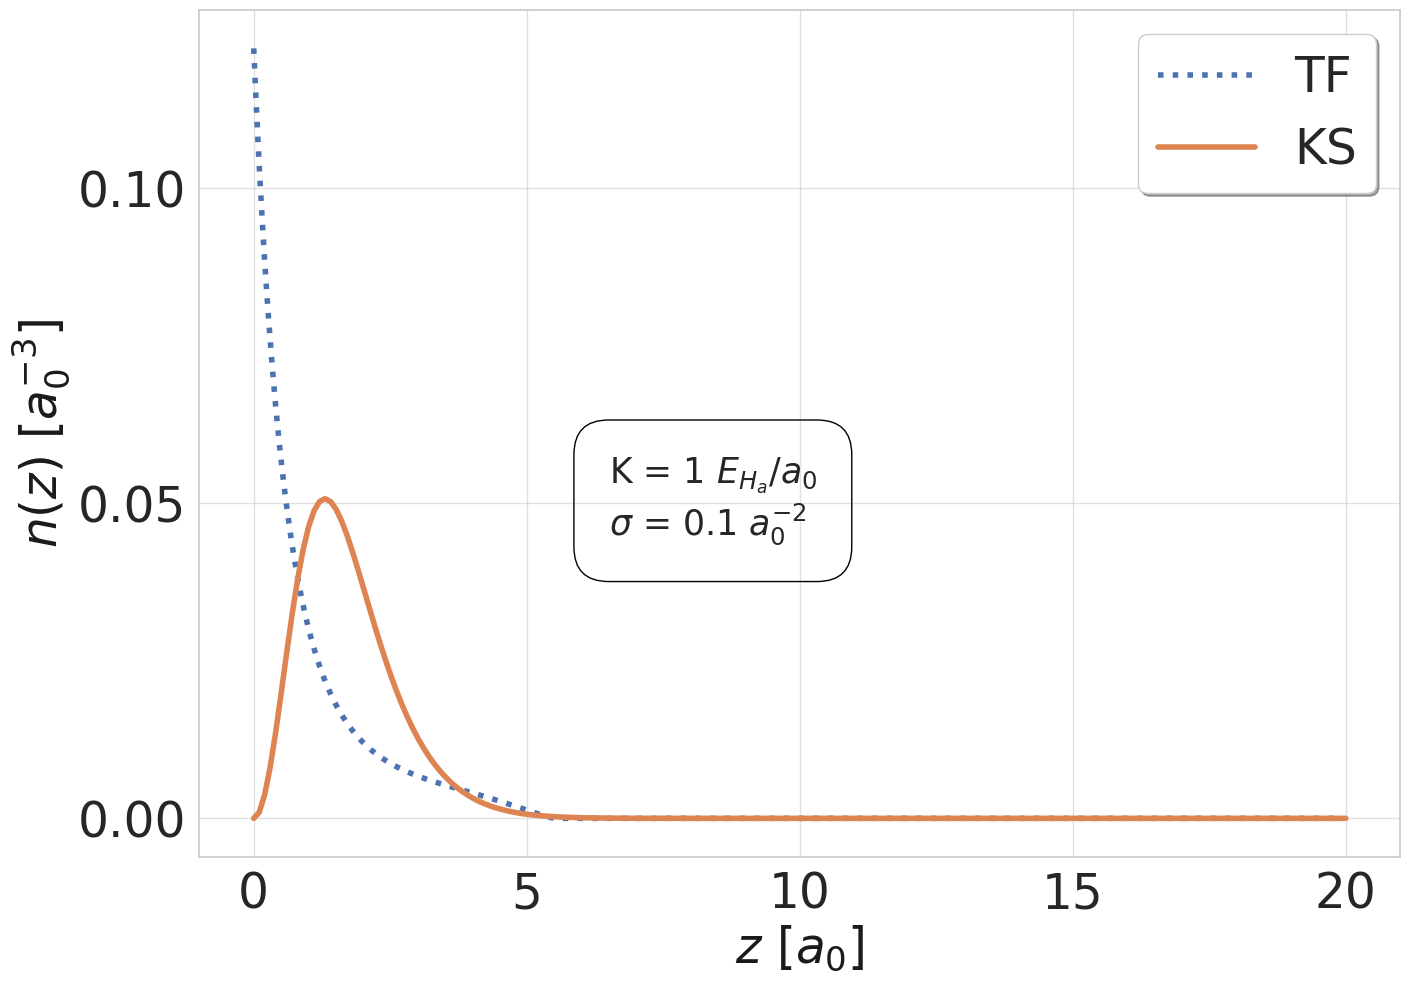

In [95]:
K = "1"
sigma = "0.1"


plt.figure(figsize = (15.5,11))
x, y = np.loadtxt("TF/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "TF", linestyle = ":", linewidth = 4)

x, y = np.loadtxt("KS/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "KS", linestyle = "-", linewidth = 4)


font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 35,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 35)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.text(6.5, 0.045,s ="K = "+K +" "+r"$E_{H_a}/a_0$"+"\n"+r"$\sigma$ = "+ sigma+" "+ r"$a_0^{-2}$", fontsize = 25, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.savefig("JPEG/density_comparison_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

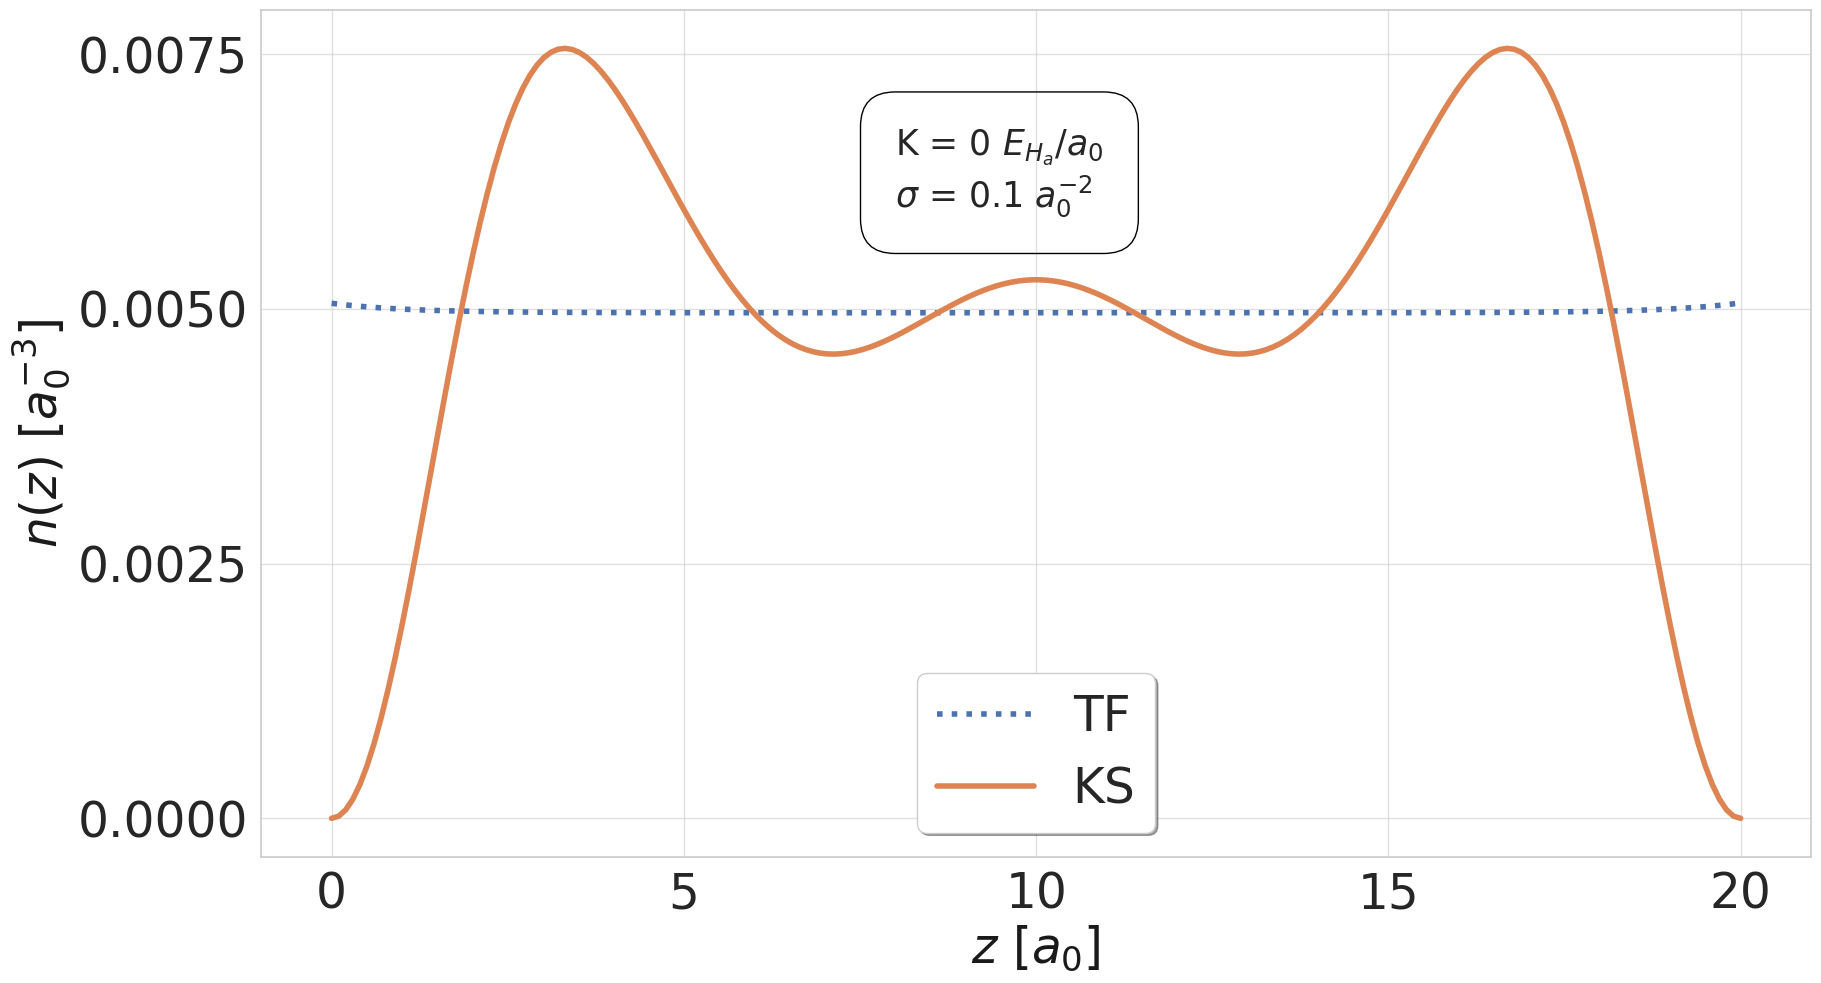

In [197]:
K = "0"
sigma = "0.1"


plt.figure(figsize = (20,11))
x, y = np.loadtxt("TF/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "TF", linestyle = ":", linewidth = 4)

x, y = np.loadtxt("KS/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "KS", linestyle = "-", linewidth = 4)


font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 35,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 35)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.text(8, 0.006,s ="K = "+K +" "+r"$E_{H_a}/a_0$"+"\n"+r"$\sigma$ = "+ sigma+" "+ r"$a_0^{-2}$", fontsize = 25, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.savefig("JPEG/density_comparison_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

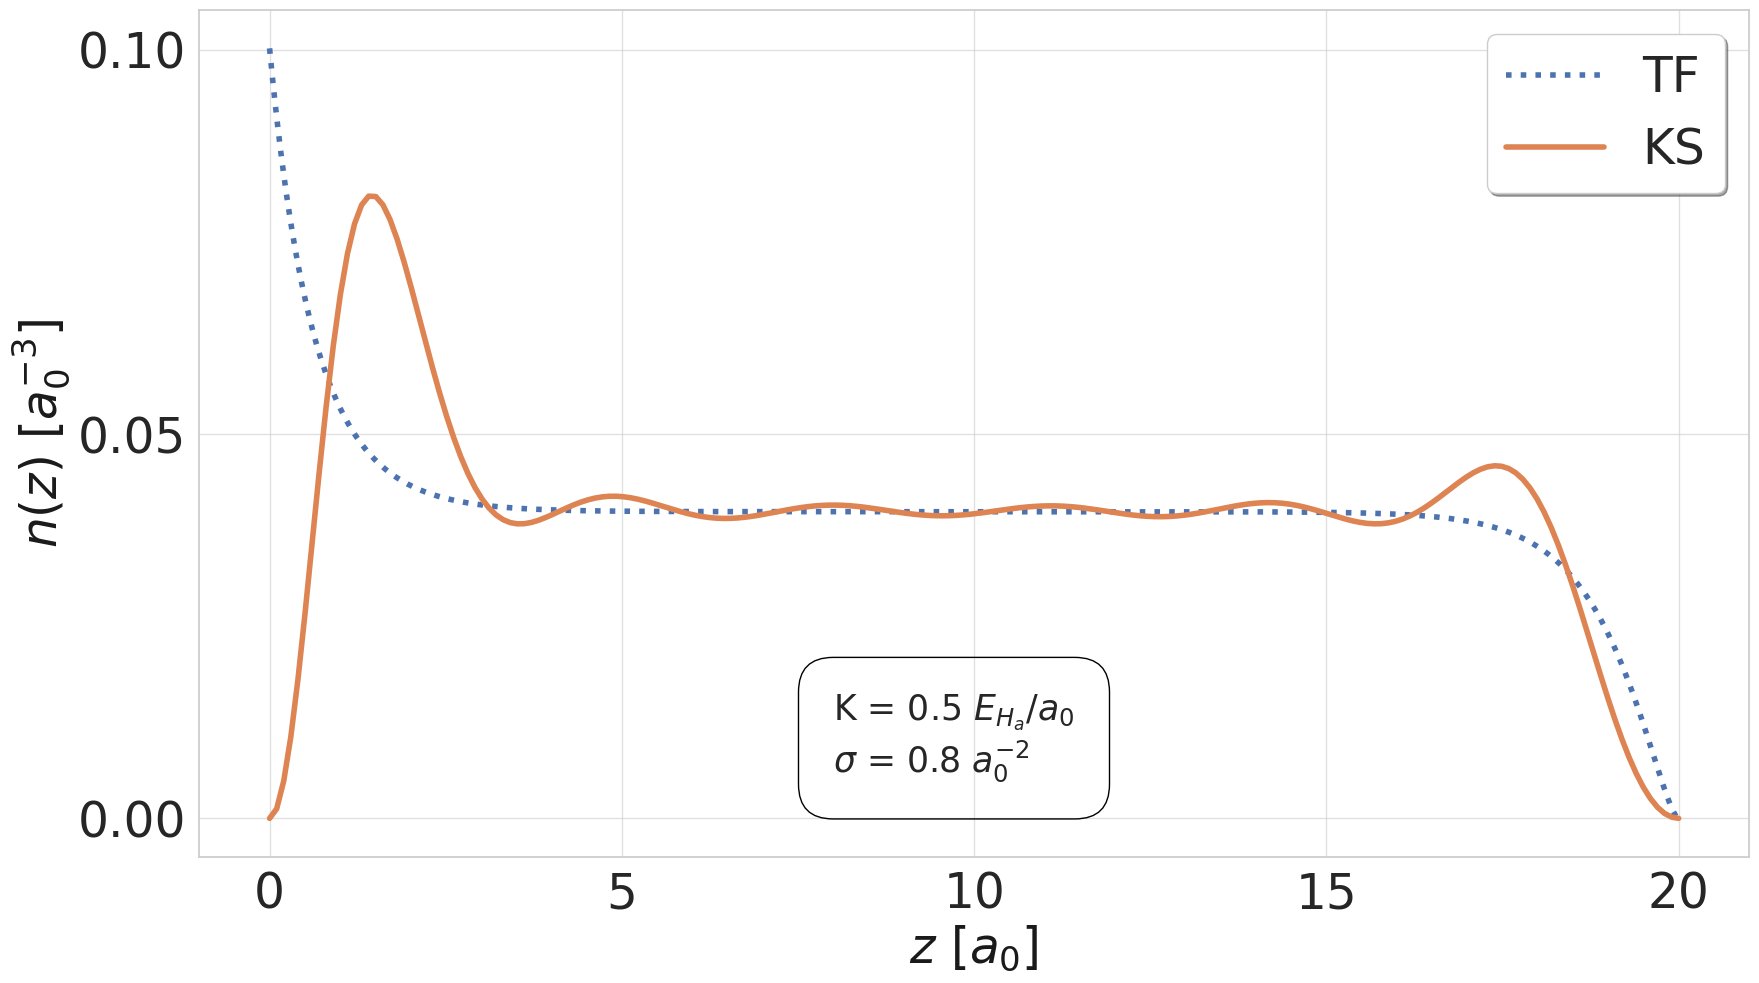

In [289]:
K = "0.5"
sigma = "0.8"


plt.figure(figsize = (20,11))
x, y = np.loadtxt("TF/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "TF", linestyle = ":", linewidth = 4)

x, y = np.loadtxt("KS/DAT/density_K="+str(K)+ "_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = "KS", linestyle = "-", linewidth = 4)


font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 35,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 35)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.text(8, 0.006,s ="K = "+K +" "+r"$E_{H_a}/a_0$"+"\n"+r"$\sigma$ = "+ sigma+" "+ r"$a_0^{-2}$", fontsize = 25, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.savefig("JPEG/density_comparison_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

Accrescendo il campo elettrico esterno il sistema rimarra' maggiormente confinato e mostrera' meno l'effetti di onde evanescenti.

<h3>Energia </h3>

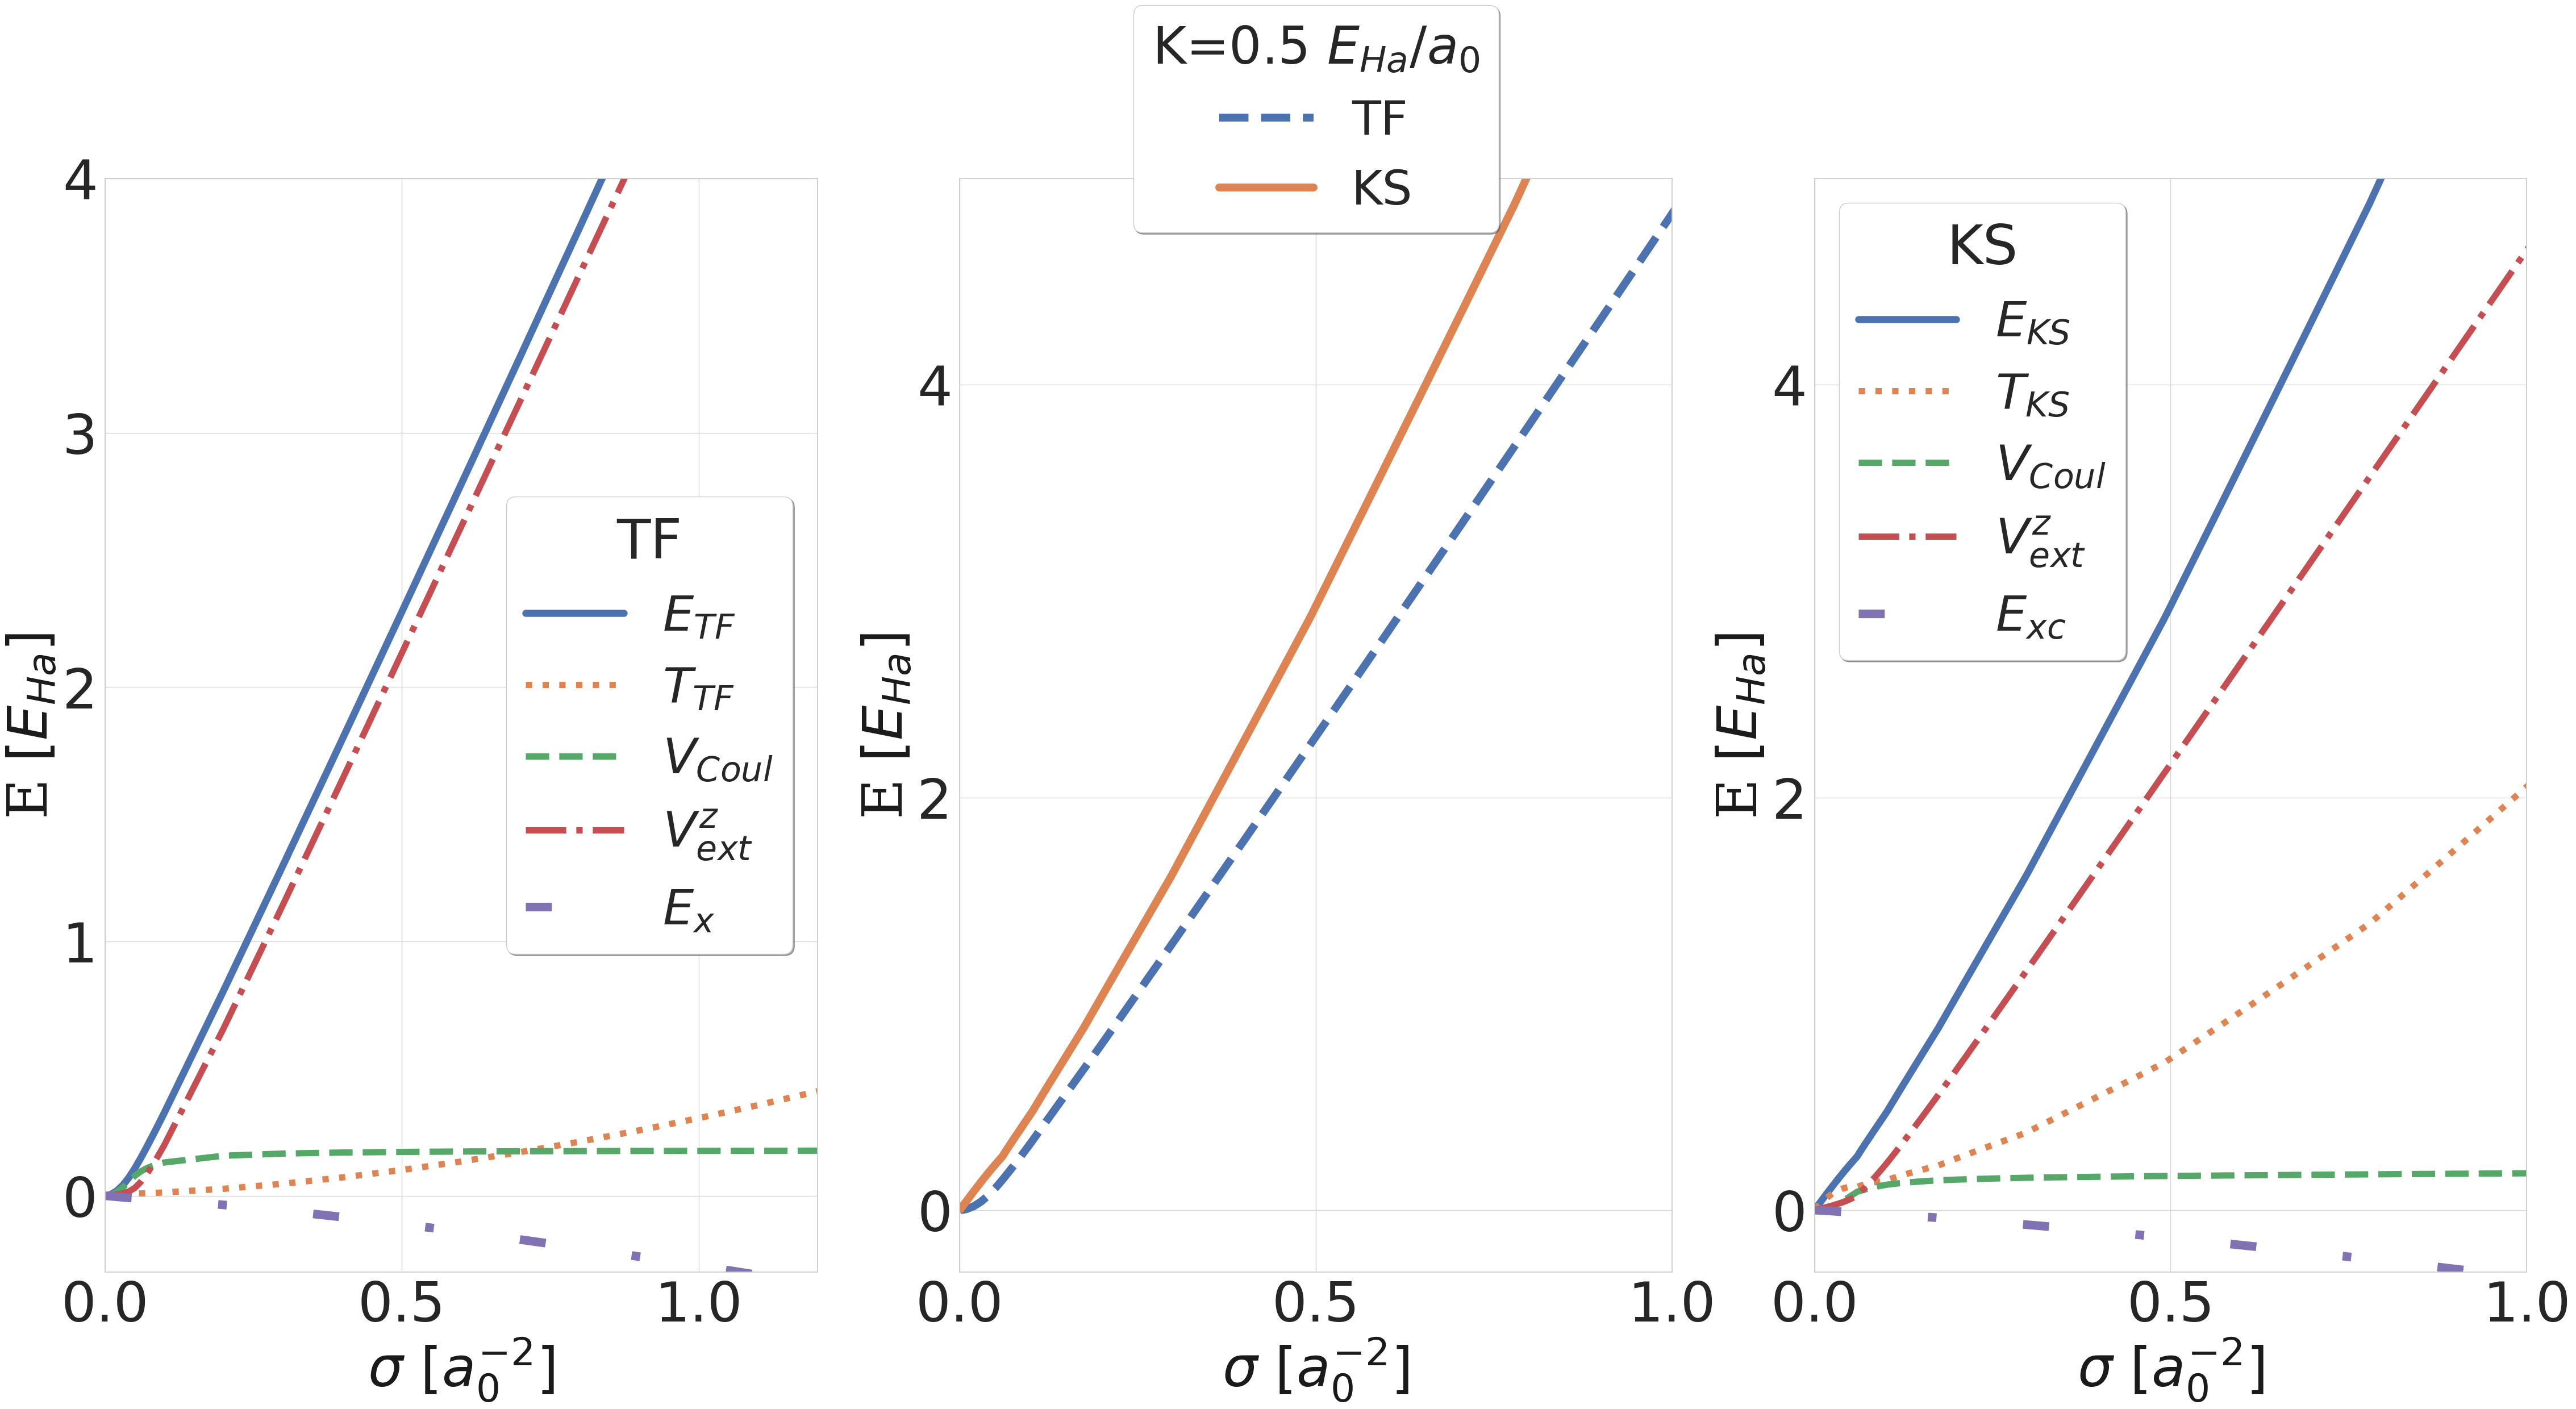

In [207]:
 K = "0.5"
fig = plt.figure(figsize = [55,25])
ax = fig.add_subplot(1,3,1)
x, yE, yKin,yExt, yEcoul, yEx = np.loadtxt("TF/DAT/energy_K="+str(K)+"_TF.dat", usecols = (0,1,2,3,4,5), delimiter = " ", unpack = "true")
ax.plot(x,yE, label = r"$E_{TF}$", linewidth = 9)
ax.plot(x,yKin,label = r"$T_{TF}$", linestyle = ":", linewidth = 8)
ax.plot(x,yEcoul, label = r"$V_{Coul}$", linestyle = "--", linewidth = 8)
ax.plot(x,yExt, label = r"$V_{ext}^z$", linestyle = "-.", linewidth = 8)
ax.plot(x,yEx, label = r"$E_x$", linestyle = (0, (3, 10, 1, 10)), linewidth = 11)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 70,
        }
ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" " + r"$[E_{Ha}]$", fontdict = font)
ax.legend(loc = "best", shadow = "true", fancybox = True, title = "TF", fontsize = 62, title_fontsize = 70)
ax.grid(axis = "both", alpha = 0.8)
ax.locator_params(axis = "x", nbins = 3)
ax.locator_params(axis = "y", nbins = 5)
ax.set_xlim(0,1.5)
ax.tick_params(axis='x', labelsize=70)
ax.tick_params(axis='y', labelsize=70)
ax.set_xlim(0,1.2)
ax.set_ylim(-0.3,4)
ax = fig.add_subplot(1,3,2)

x, yE = np.loadtxt("TF/DAT/energy_K="+str(K)+"_TF.dat", usecols = (0,1), delimiter = " ", unpack = "true")
ax.plot(x,yE, linewidth = 10, label = "TF", linestyle = "--")


x, yE = np.loadtxt("KS/DAT/energy_K="+K+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
ax.plot(x,yE, linewidth = 10, label = "KS")

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 70,
       }

ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" " + r"$[E_{Ha}]$", fontdict = font)
ax.legend(loc = "upper center", shadow = "true", fancybox = True, title = "K=" + str(K)+" "+ r"$E_{Ha}/a_0$", fontsize = 60, bbox_to_anchor = (0.5,1.18
                                                                                                                                               ), title_fontsize = 65)
ax.grid(axis = "both", alpha = 0.8)
ax.locator_params(axis = "x", nbins = 3)
ax.locator_params(axis = "y", nbins = 4)
ax.set_xlim(0,1.5)
ax.tick_params(axis='x', labelsize=70)
ax.tick_params(axis='y', labelsize=70)
ax.set_xlim(0,1)
ax.set_ylim(-0.3,5)
ax = fig.add_subplot(1,3,3)

x, y, y2, y3, y4, y5 = np.loadtxt("KS/DAT/energy_K="+K+".dat", usecols = (0,1,2,3,4,5), delimiter = " ", unpack = "true")
ax.plot(x,y, label = r"$E_{KS}$", linewidth = 9)
ax.plot(x,y2,label = r"$T_{KS}$",linestyle = ":", linewidth = 8)
ax.plot(x,y3, label = r"$V_{Coul}$",linestyle = "--", linewidth = 8)
ax.plot(x,y4, label = r"$V_{ext}^z$",linestyle = "-.", linewidth = 8)
ax.plot(x,y5,label = r"$E_{xc}$",linestyle = (0, (3, 10, 1, 10)), linewidth = 11)


ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" " + r"$[E_{Ha}]$", fontdict = font)
ax.legend(loc = "best", shadow = "true", fancybox = True,  title = "KS", fontsize = 62, title_fontsize =70)
ax.grid(axis = "both", alpha = 0.8)
ax.locator_params(axis = "x", nbins = 3)
ax.locator_params(axis = "y", nbins = 4)
ax.set_xlim(0,1.5)
ax.tick_params(axis='x', labelsize=70)
ax.tick_params(axis='y', labelsize=70)
ax.set_xlim(0,1)
ax.set_ylim(-0.3,5)
plt.savefig("JPEG/energy_comparison_K="+str(K)+".jpeg")

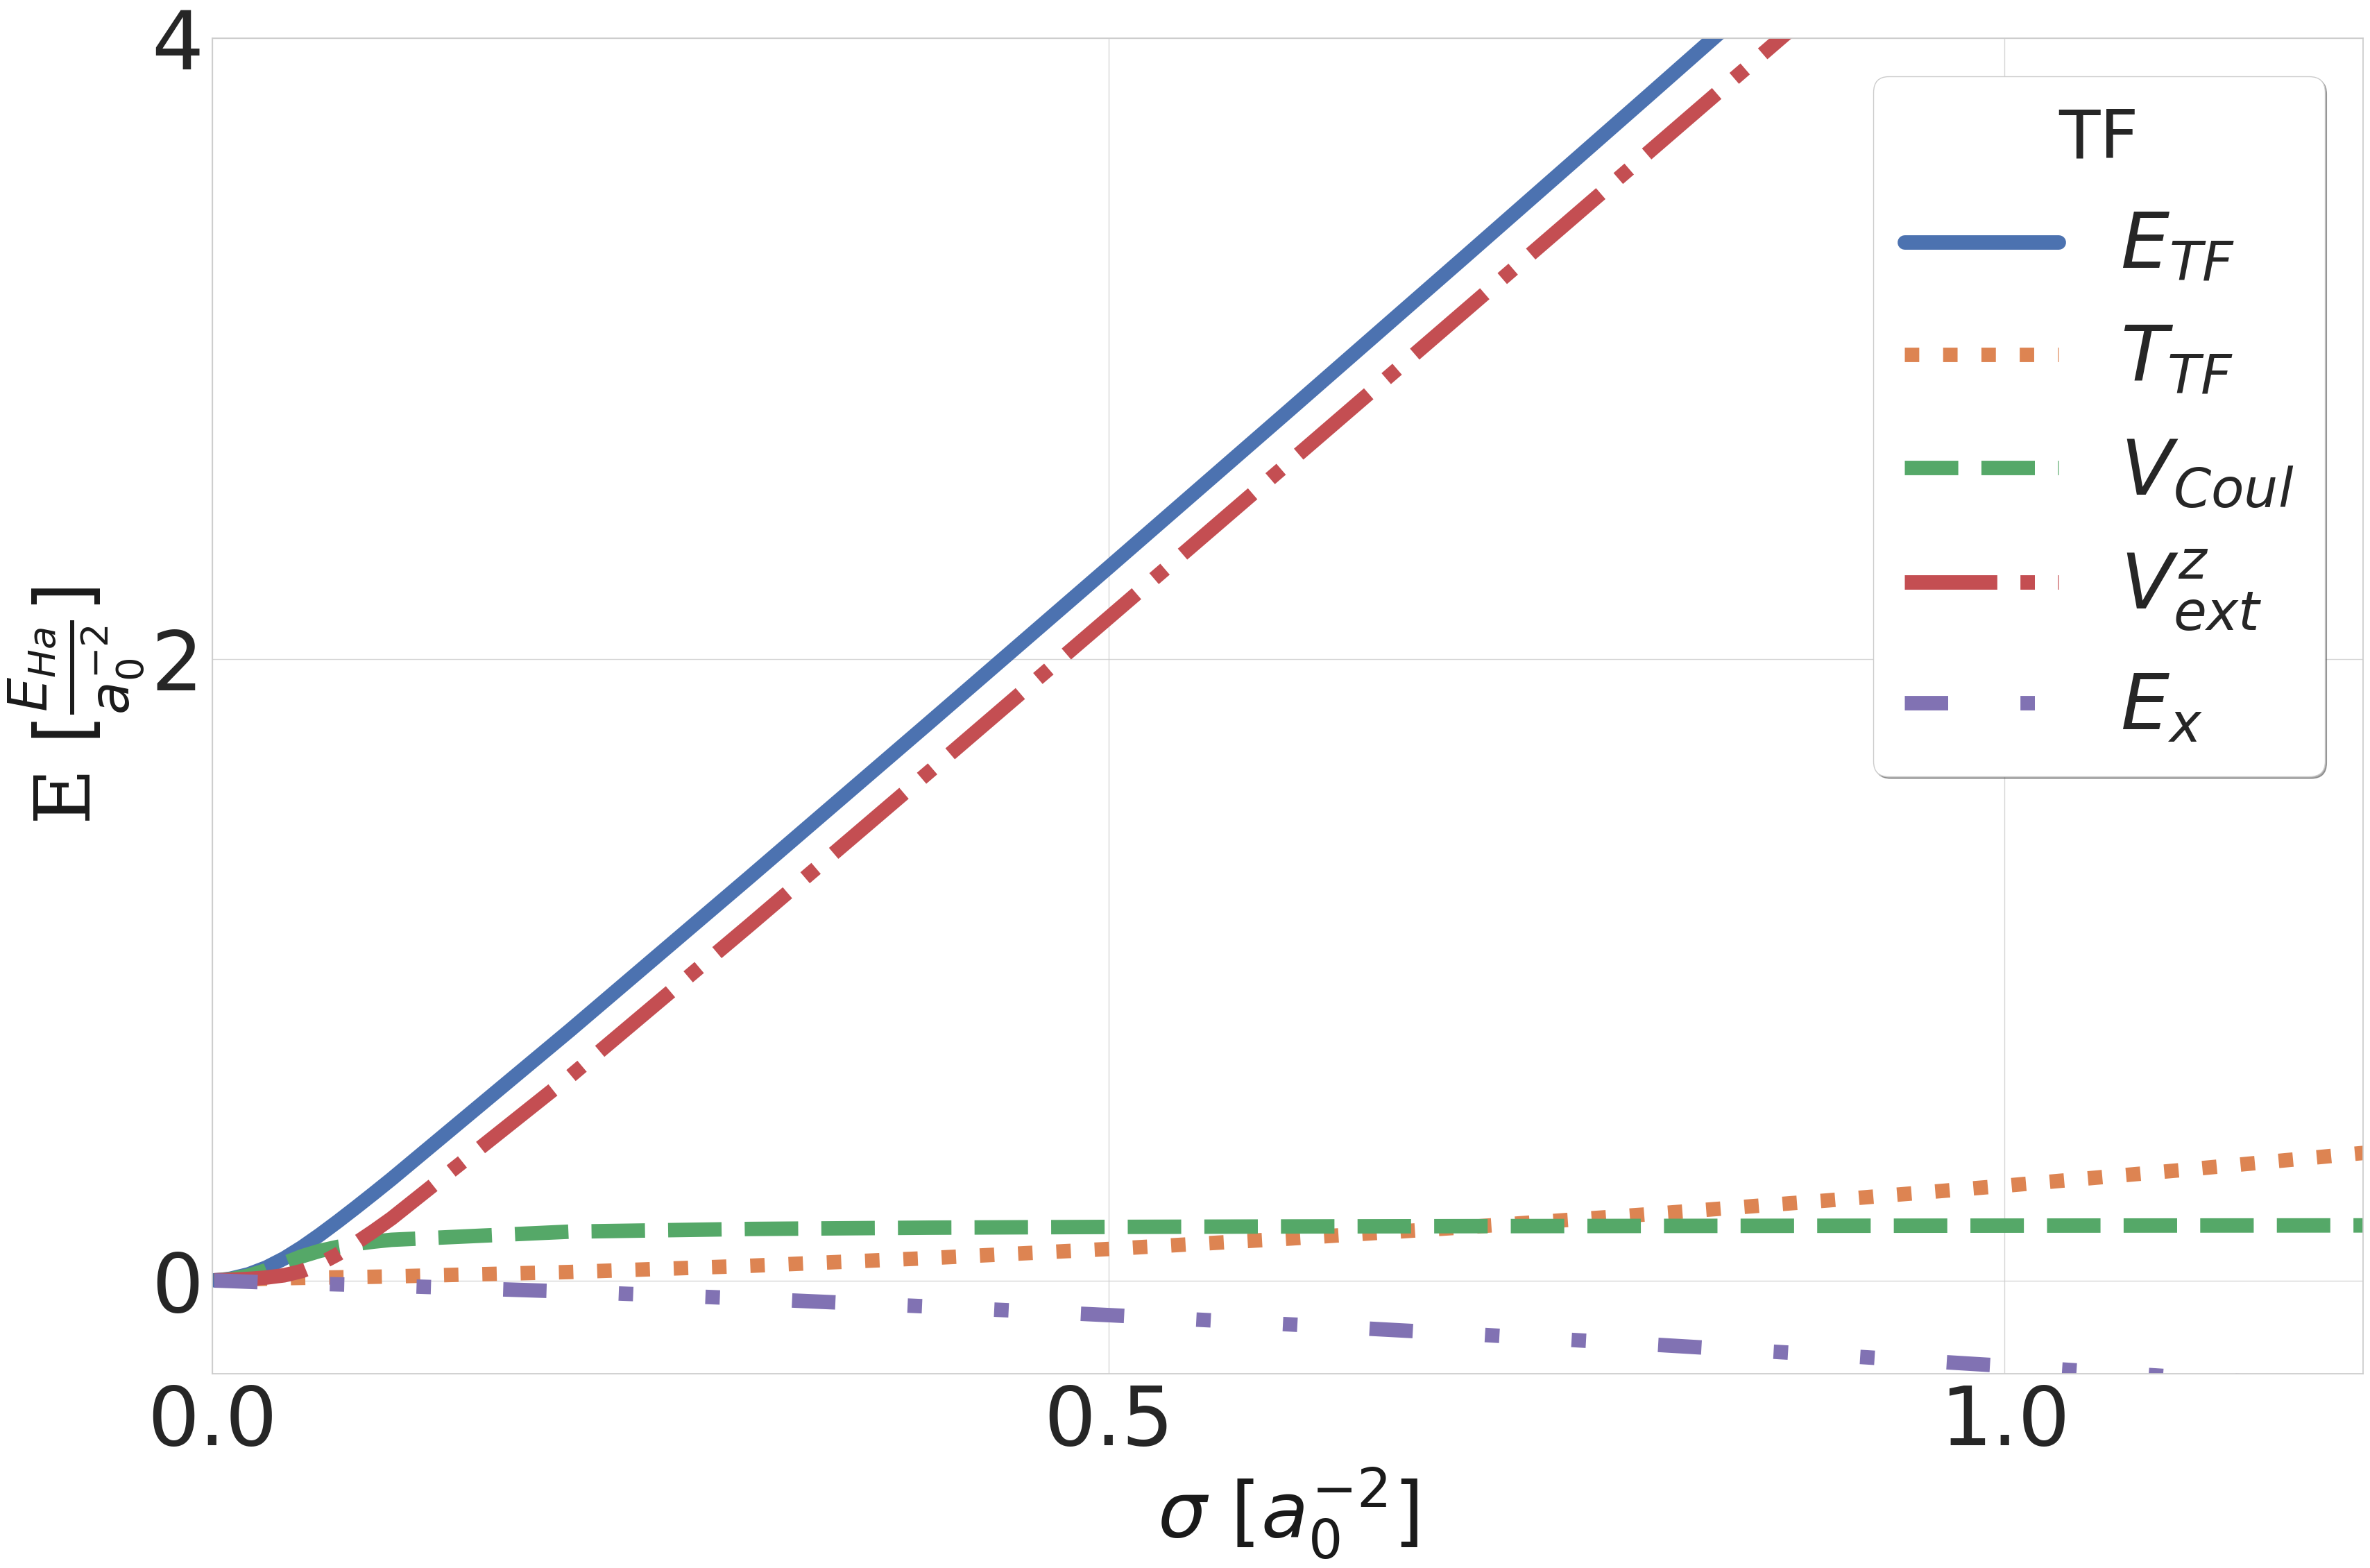

In [32]:
 K = "0.5"
fig, ax = plt.subplots(figsize=[40, 25])
x, yE, yKin,yExt, yEcoul, yEx = np.loadtxt("TF/DAT/energy_K="+str(K)+"_TF.dat", usecols = (0,1,2,3,4,5), delimiter = " ", unpack = "true")
ax.plot(x,yE, label = r"$E_{TF}$", linewidth = 15)
ax.plot(x,yKin,label = r"$T_{TF}$", linestyle = ":", linewidth = 15)
ax.plot(x,yEcoul, label = r"$V_{Coul}$", linestyle = "--", linewidth = 15)
ax.plot(x,yExt, label = r"$V_{ext}^z$", linestyle = "-.", linewidth = 15)
ax.plot(x,yEx, label = r"$E_x$", linestyle = (0, (3, 5, 1, 5, 1, 5)), linewidth = 15)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 80,
        }
ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" "+r"$[\frac{E_{Ha}}{a_0^{-2}}]$", fontdict = font)
ax.legend(loc = "best", shadow = "true", fancybox = True, title = "TF", fontsize = 80, title_fontsize = 70)
ax.grid(axis = "both", alpha = 0.8)
ax.locator_params(axis = "x", nbins = 3)
ax.locator_params(axis = "y", nbins = 4)
ax.set_xlim(0,1.5)
ax.tick_params(axis='x', labelsize=85)
ax.tick_params(axis='y', labelsize=85)
ax.set_xlim(0,1.2)
ax.set_ylim(-0.3,4)
plt.savefig("JPEG/energy_comparison_K="+str(K)+"_no_zoom_TF.jpeg")

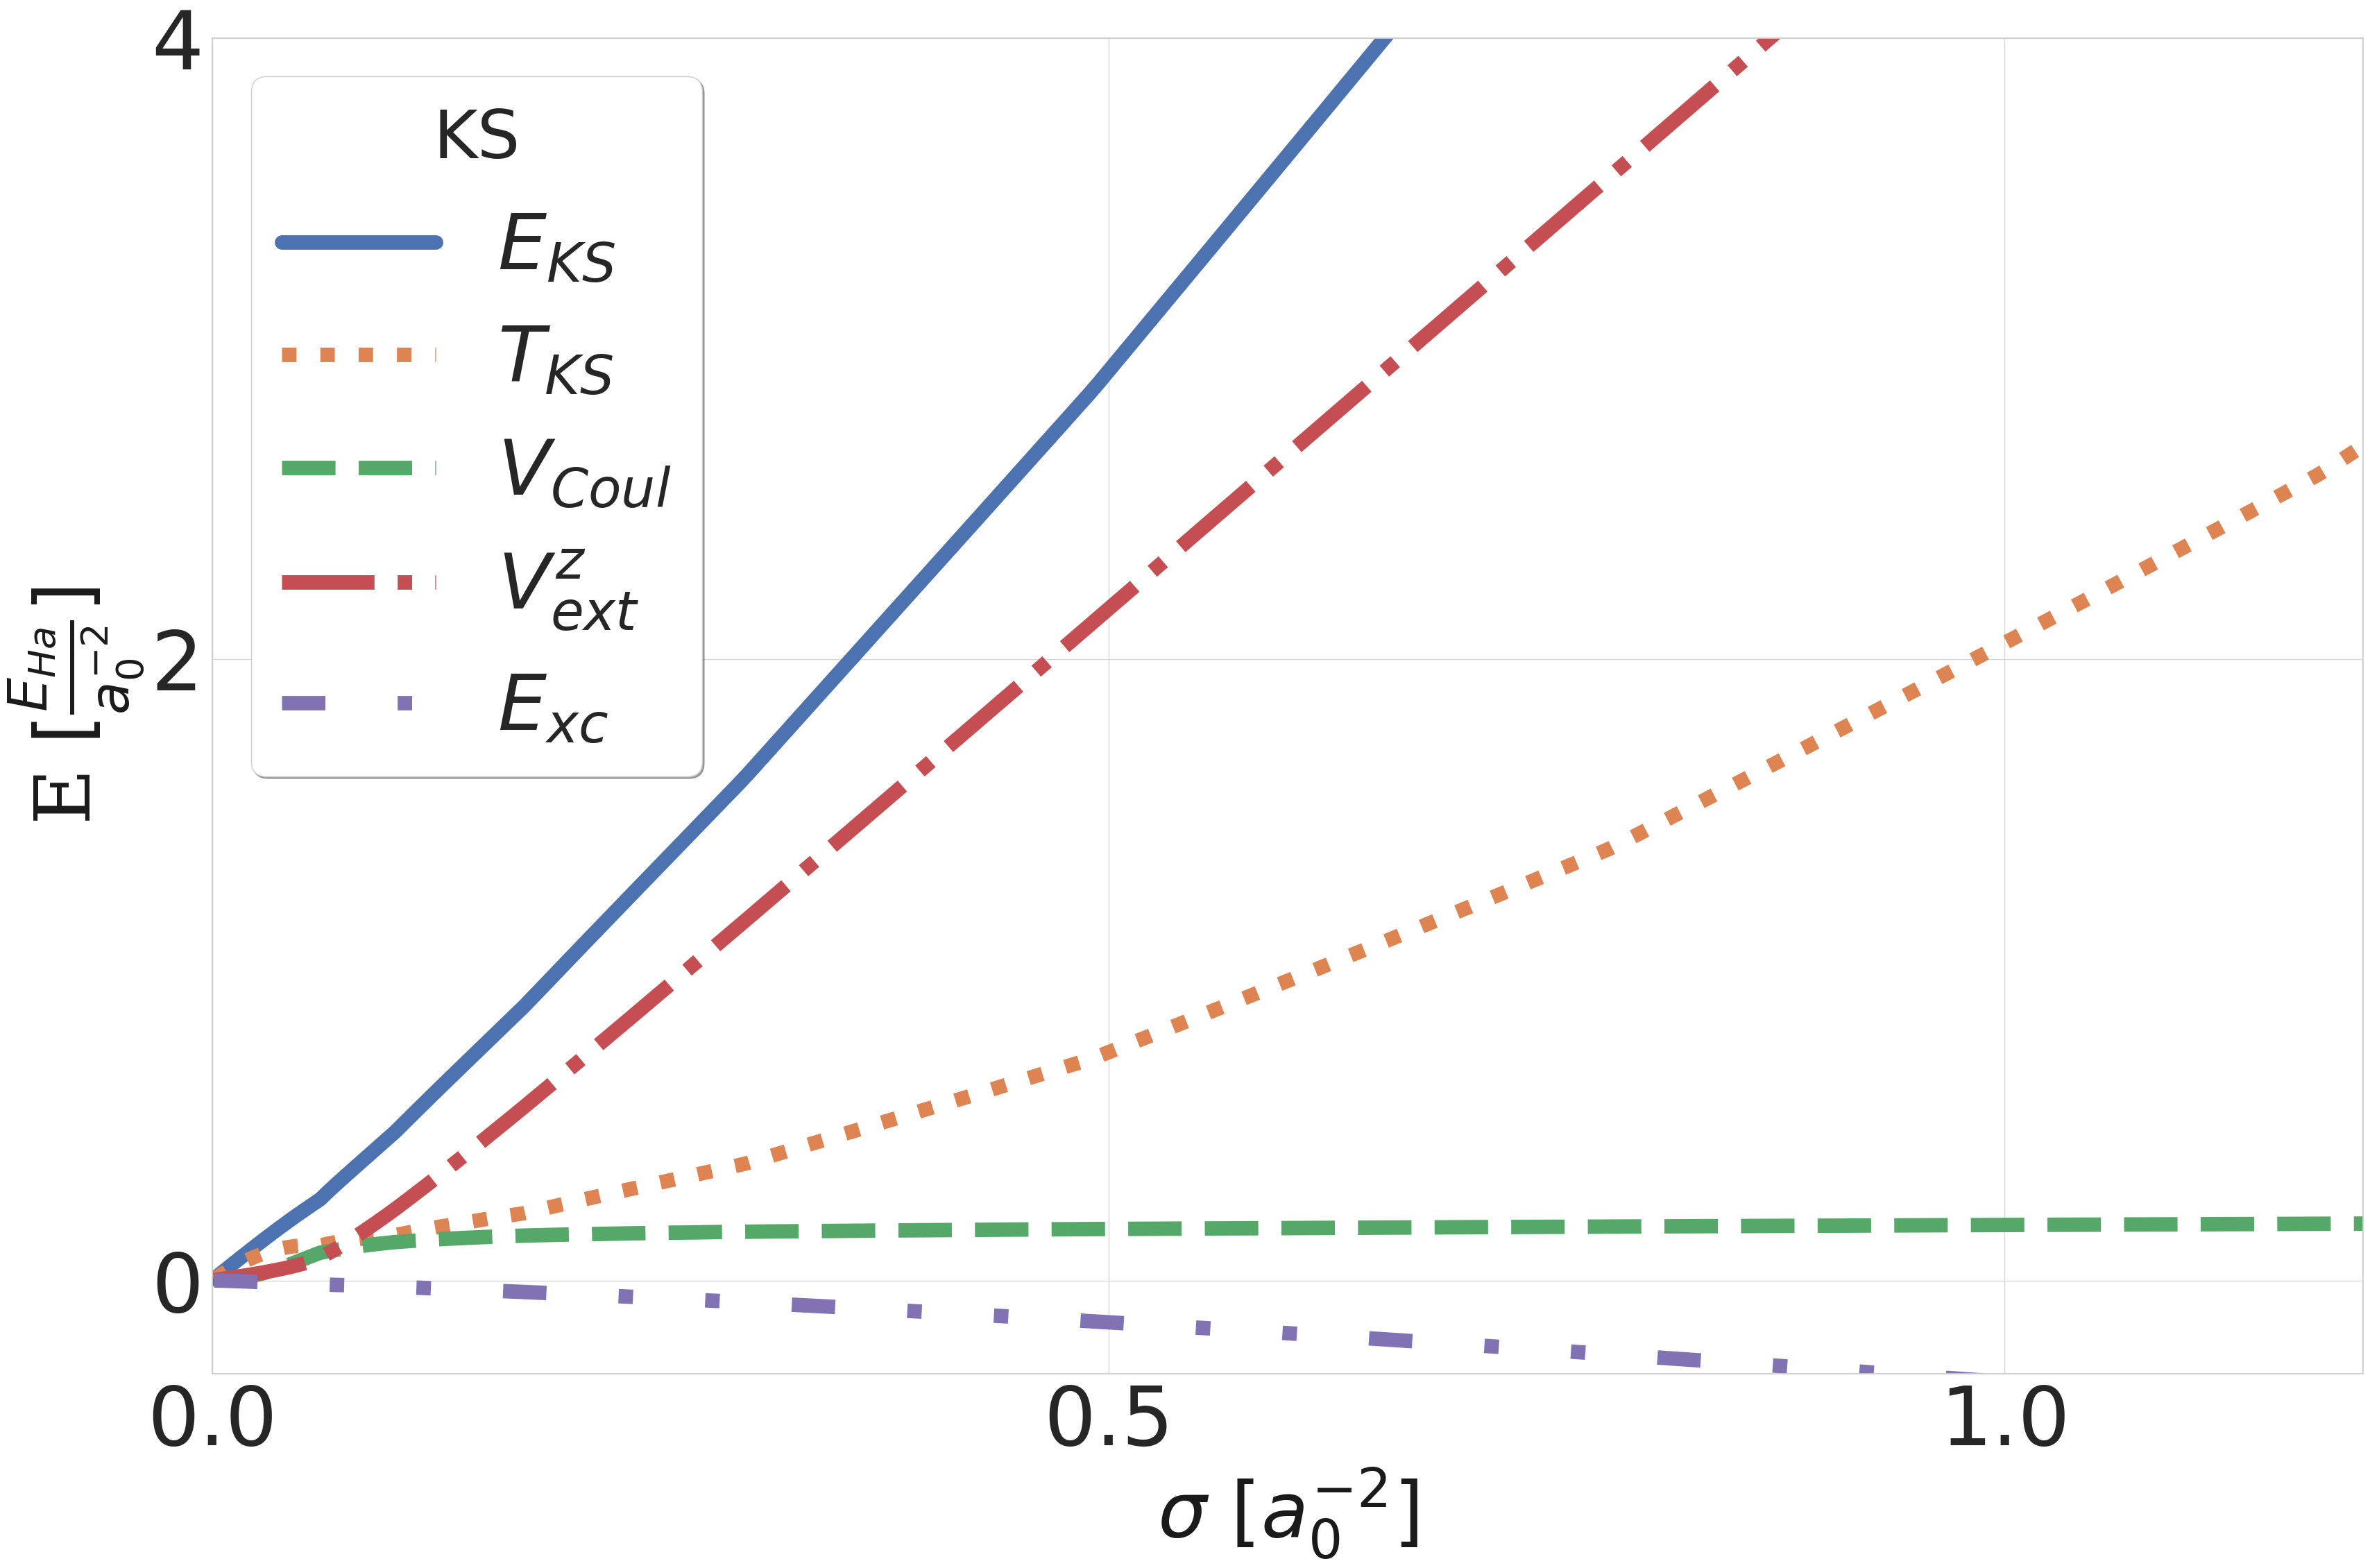

In [33]:
 K = "0.5"
fig, ax = plt.subplots(figsize=[40, 25])
x, y, y2, y3, y4, y5 = np.loadtxt("KS/DAT/energy_K="+str(K)+".dat", usecols = (0,1,2,3,4,5), delimiter = " ", unpack = "true")
ax.plot(x,y, label = r"$E_{KS}$", linewidth = 15)
ax.plot(x,y2,label = r"$T_{KS}$",linestyle = ":", linewidth = 15)
ax.plot(x,y3, label = r"$V_{Coul}$",linestyle = "--", linewidth = 15)
ax.plot(x,y4, label = r"$V_{ext}^z$",linestyle = "-.", linewidth = 15)
ax.plot(x,y5,label = r"$E_{xc}$",linestyle = (0, (3, 5, 1, 5, 1, 5)), linewidth = 15)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 80,
        }

ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" "+r"$[\frac{E_{Ha}}{a_0^{-2}}]$", fontdict = font)
ax.legend(loc = "best", shadow = "true", fancybox = True,  title = "KS", fontsize = 80, title_fontsize =70)
ax.grid(axis = "both", alpha = 0.8)
ax.locator_params(axis = "x", nbins = 3)
ax.locator_params(axis = "y", nbins = 4)
ax.set_xlim(0,1.5)
ax.tick_params(axis='x', labelsize=85)
ax.tick_params(axis='y', labelsize=85)
ax.set_xlim(0,1.2)
ax.set_ylim(-0.3,4)
plt.savefig("JPEG/energy_comparison_K="+str(K)+"_no_zoom_KS.jpeg")

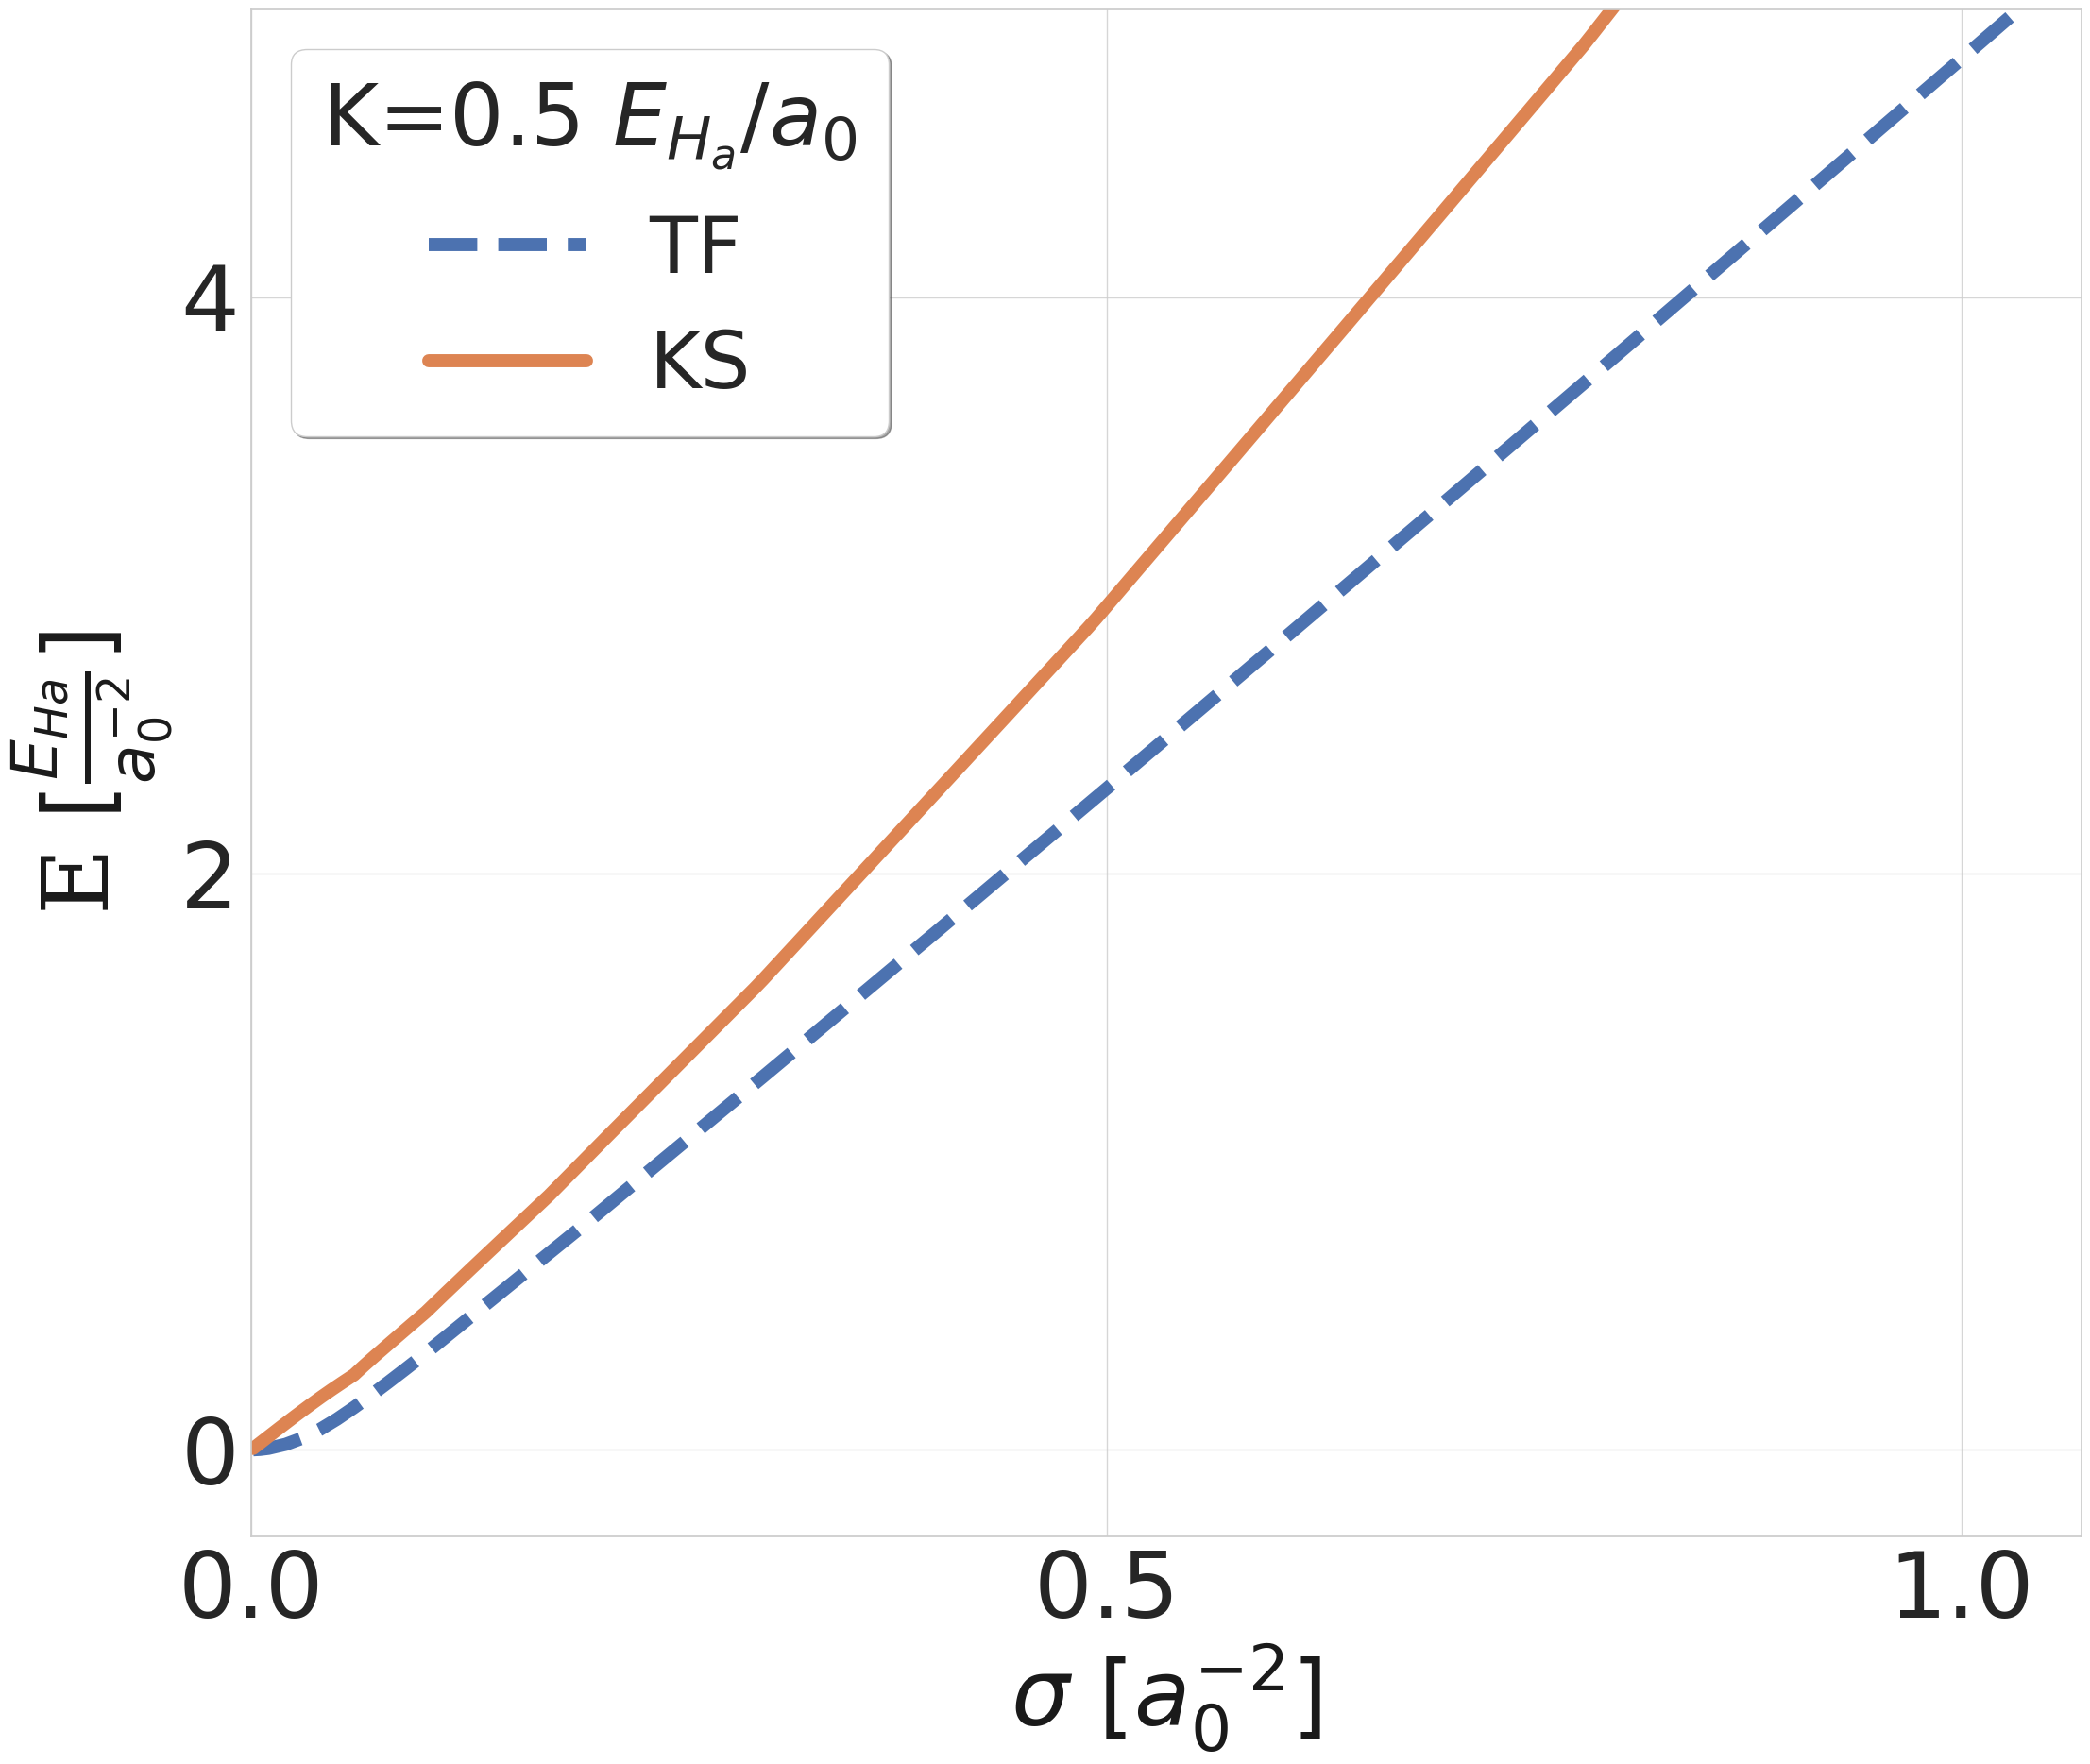

In [9]:
fig, ax = plt.subplots(figsize=[25, 21])
x, yE = np.loadtxt("TF/DAT/energy_K="+str(K)+"_TF.dat", usecols = (0,1), delimiter = " ", unpack = "true")
ax.plot(x,yE, linewidth = 10, label = "TF", linestyle = "--")


x, yE = np.loadtxt("KS/DAT/energy_K="+str(K)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
ax.plot(x,yE, linewidth = 10, label = "KS")

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 70,
       }

ax.set_xlabel(r"$\sigma$"+" "+r"$[a_0^{-2}]$", fontdict = font)
ax.set_ylabel("E"+" "+r"$[\frac{E_{Ha}}{a_0^{-2}}]$", fontdict = font)
ax.legend(loc = "upper left", shadow = "true", fancybox = True, title = "K=" + str(K)+" "+ r"$E_{H_a}/a_0$", fontsize = 60, title_fontsize = 65)
ax.grid(axis = "both", alpha = 0.8)
ax.locator_params(axis = "x", nbins = 3)
ax.locator_params(axis = "y", nbins = 4)
ax.set_xlim(0,1.5)
ax.tick_params(axis='x', labelsize=70)
ax.tick_params(axis='y', labelsize=70)
ax.set_xlim(0,1.07)
ax.set_ylim(-0.3,5)
plt.savefig("JPEG/comparison_total_energy_TF_KS")

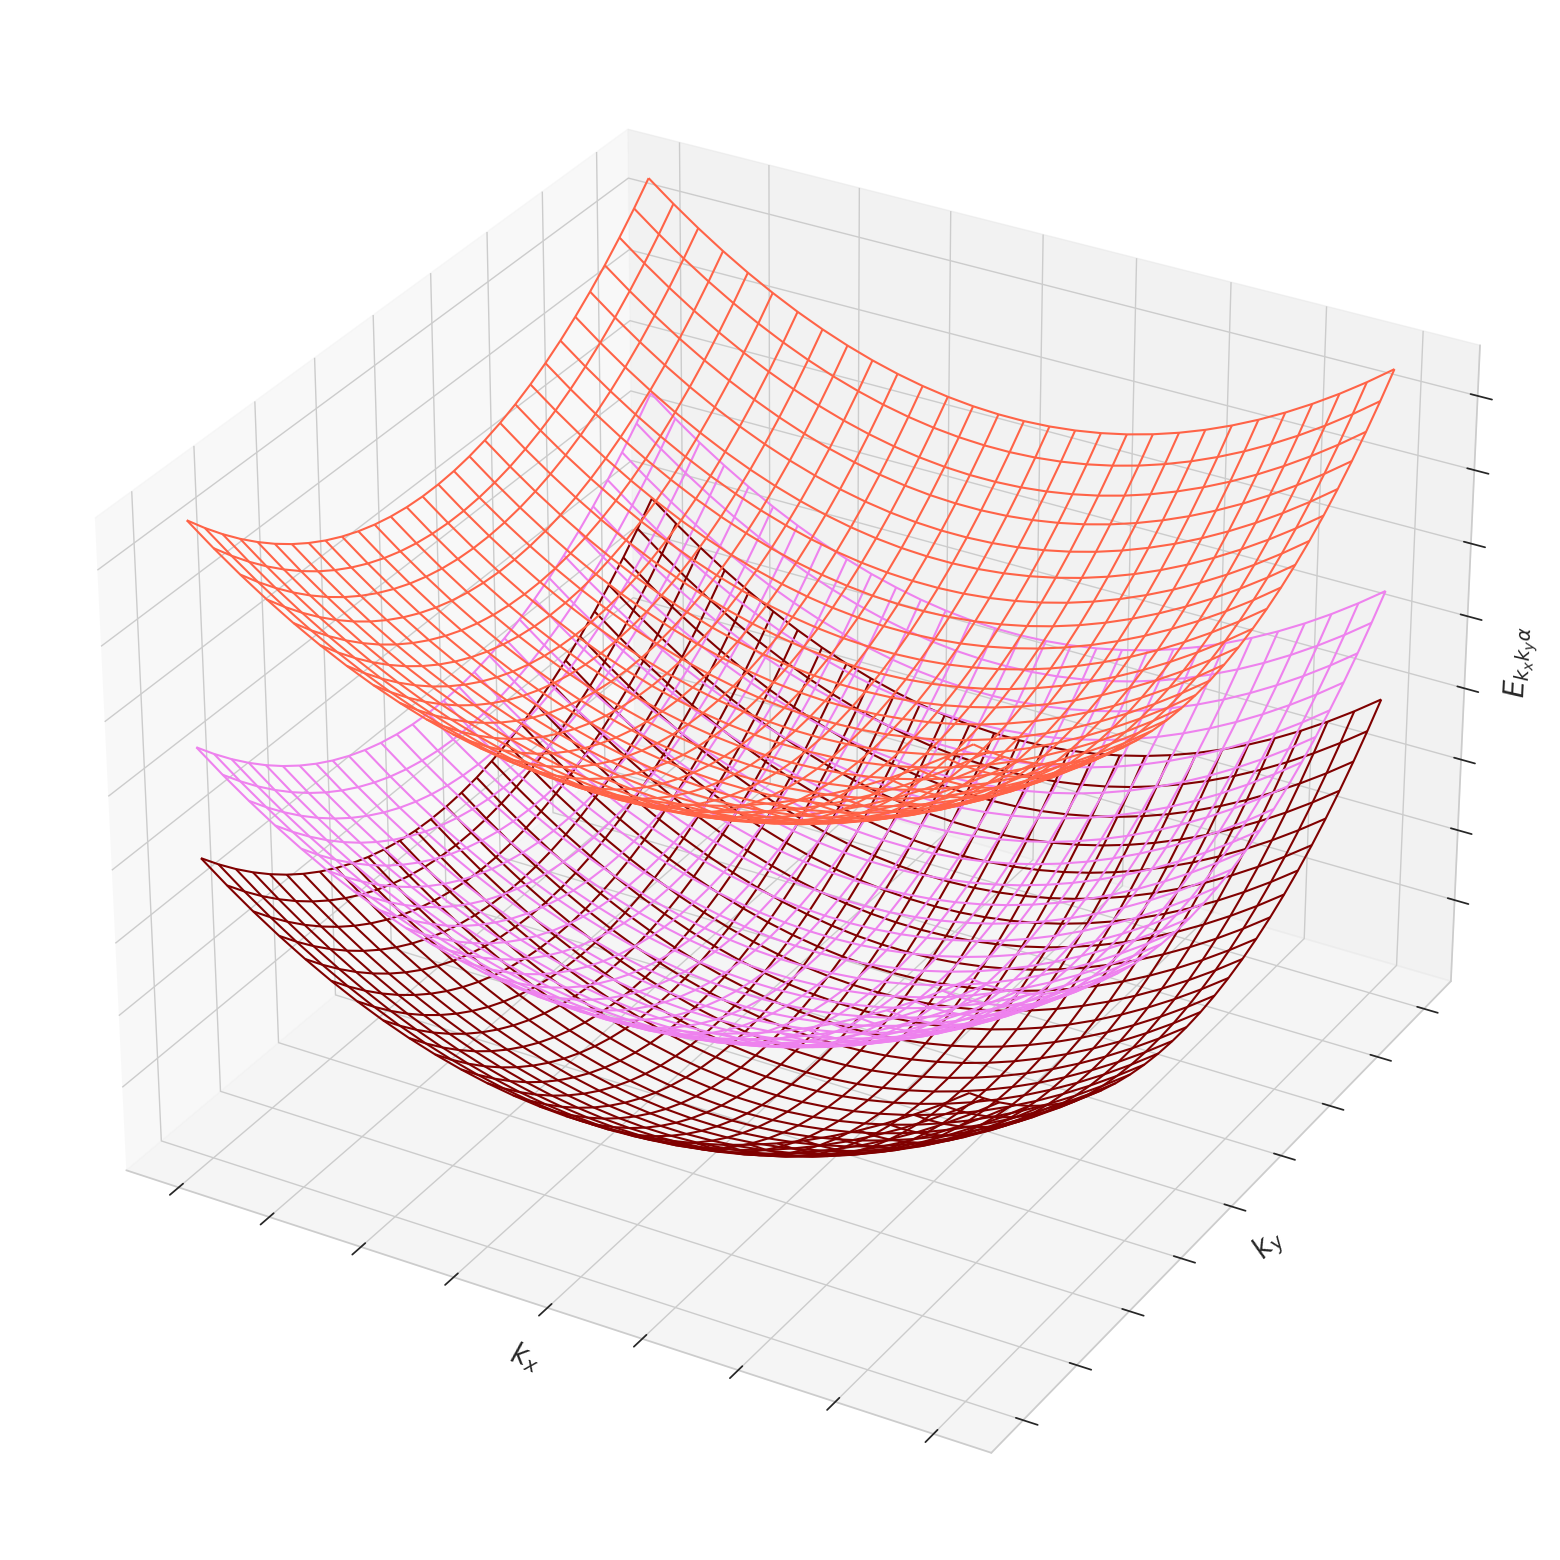

In [201]:
 import numpy as np
from matplotlib import pyplot as plt
#plt.figure()
#ax = plt.axes(projection ='3d')
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection = '3d')
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X,Y=np.meshgrid(x,y)
R = X*X+Y*Y
F = 1
Z=F*R
ax.plot_wireframe(X,Y,Z, color = "Maroon")
Z=F*R +3
ax.plot_wireframe(X,Y,Z, color = "violet")
Z=F*R +9
ax.plot_wireframe(X,Y,Z, color = "Tomato")
#plt.xlabel(r"$k_x$")
#plt.ylabel(r"$k_y$")
ax.set_xlabel(r"$k_x$", size = 20)
ax.set_ylabel(r"$k_y$", size = 20)
ax.set_zlabel(r"$E_{k_x k_y \alpha}$", size = 20)
"""
ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
"""
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)

plt.savefig("JPEG/family_subband.jpeg")

<p>Andiamo a studiare le proiezioni:</p>

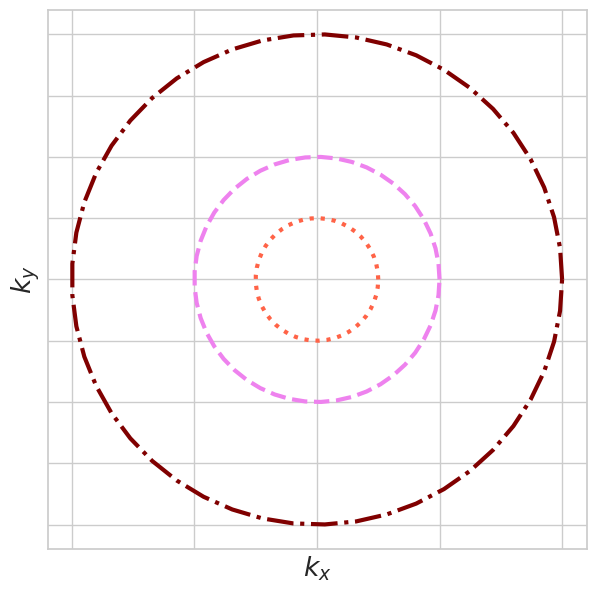

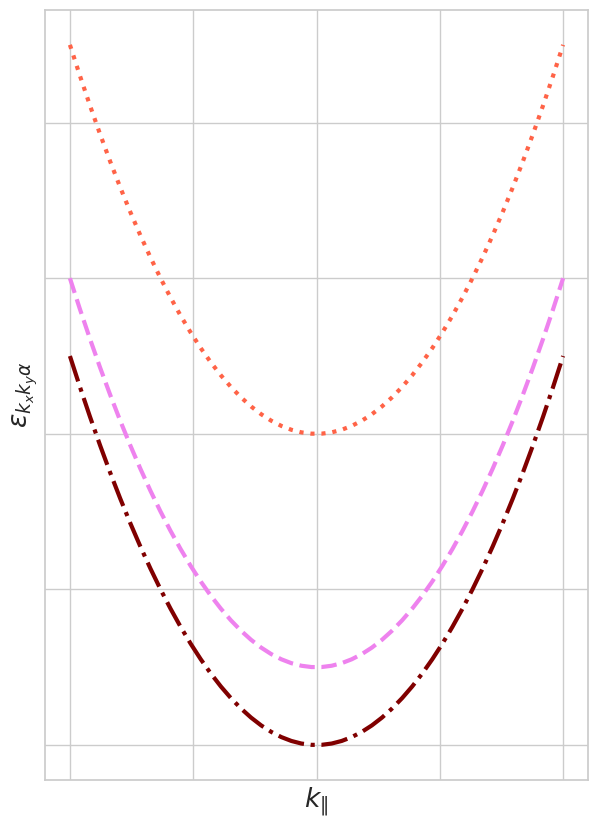

In [202]:
plt.figure(figsize = (7,7))
theta = np.linspace(0,2*np.pi)
plt.plot(np.cos(theta), np.sin(theta), color = "tomato", linestyle = ":", linewidth = 3)
plt.plot(2*np.cos(theta), 2*np.sin(theta), color = "violet", linestyle = "--", linewidth = 3)
plt.plot(4*np.cos(theta), 4*np.sin(theta), color = "maroon", linestyle = "-.", linewidth = 3)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
#plt.axis("equal")
plt.axis('square')
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
ax.grid(axis = "both", alpha = 0.6)
plt.savefig("JPEG/proiezione_xy.jpeg")
plt.figure(figsize = (7,10))
x = np.linspace(-1,1)
plt.plot(x,5*x**2, linestyle = "-.", linewidth = 3, c = "maroon" )
plt.plot(x,5*x**2+1, linestyle = "--", linewidth = 3 , c ="violet")
plt.plot(x,5*x**2+4, linestyle = ":", linewidth = 3 , c = "tomato")
plt.xlabel(r"$k_{\|}$")
plt.ylabel(r"$\varepsilon_{k_x k_y \alpha}$")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.savefig("JPEG/proiezione_z.jpeg")

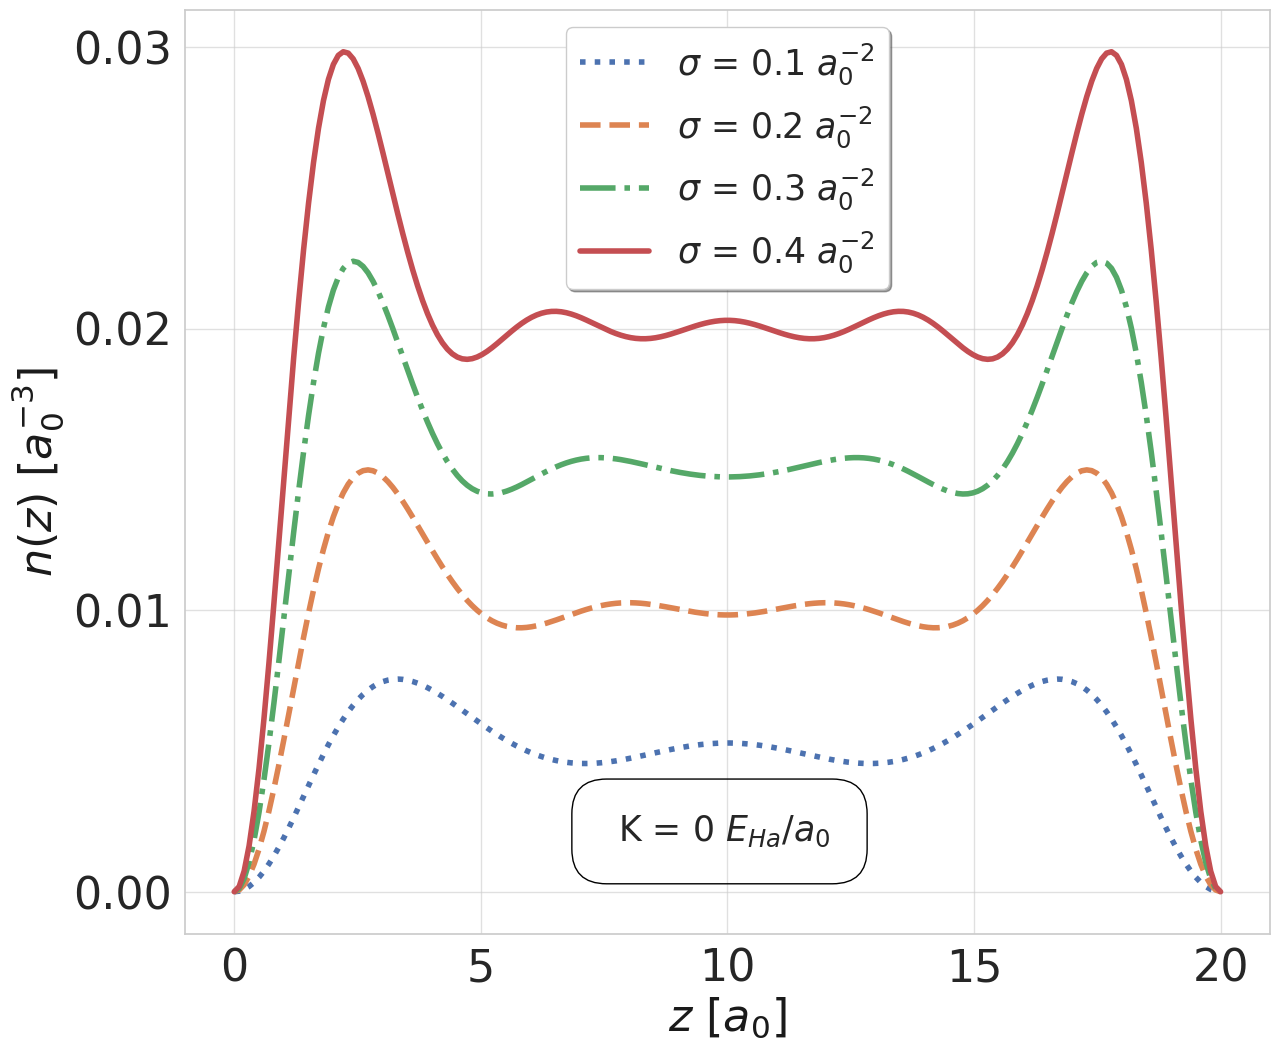

In [43]:
K = 0
sigma = [0.1, 0.2, 0.3, 0.4]
myLines = [":", "--", "-.", "-"]
plt.figure(figsize = (14,12))


conta = 0
for s in sigma:
    x, y = np.loadtxt("KS/DAT/density_K="+str(K)+"_sigma="+str(s)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    plt.plot(x,y, label = r"$\sigma$ = " + str(s)+ r" $a_0^{-2}$", linestyle = myLines[conta], linewidth = 4)
    conta= conta +1
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 32,
        }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "upper center", shadow = True, fancybox = True, fontsize = 25  )
plt.grid(axis = "both", alpha = 0.6)
plt.text(7.55, 0.0018," "+"K = "+str(K)+" "+r"$E_{Ha}/a_0$"+" ", fontsize = 25, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.savefig("KS/JPEG/density_K="+str(K)+"_KS.jpeg")

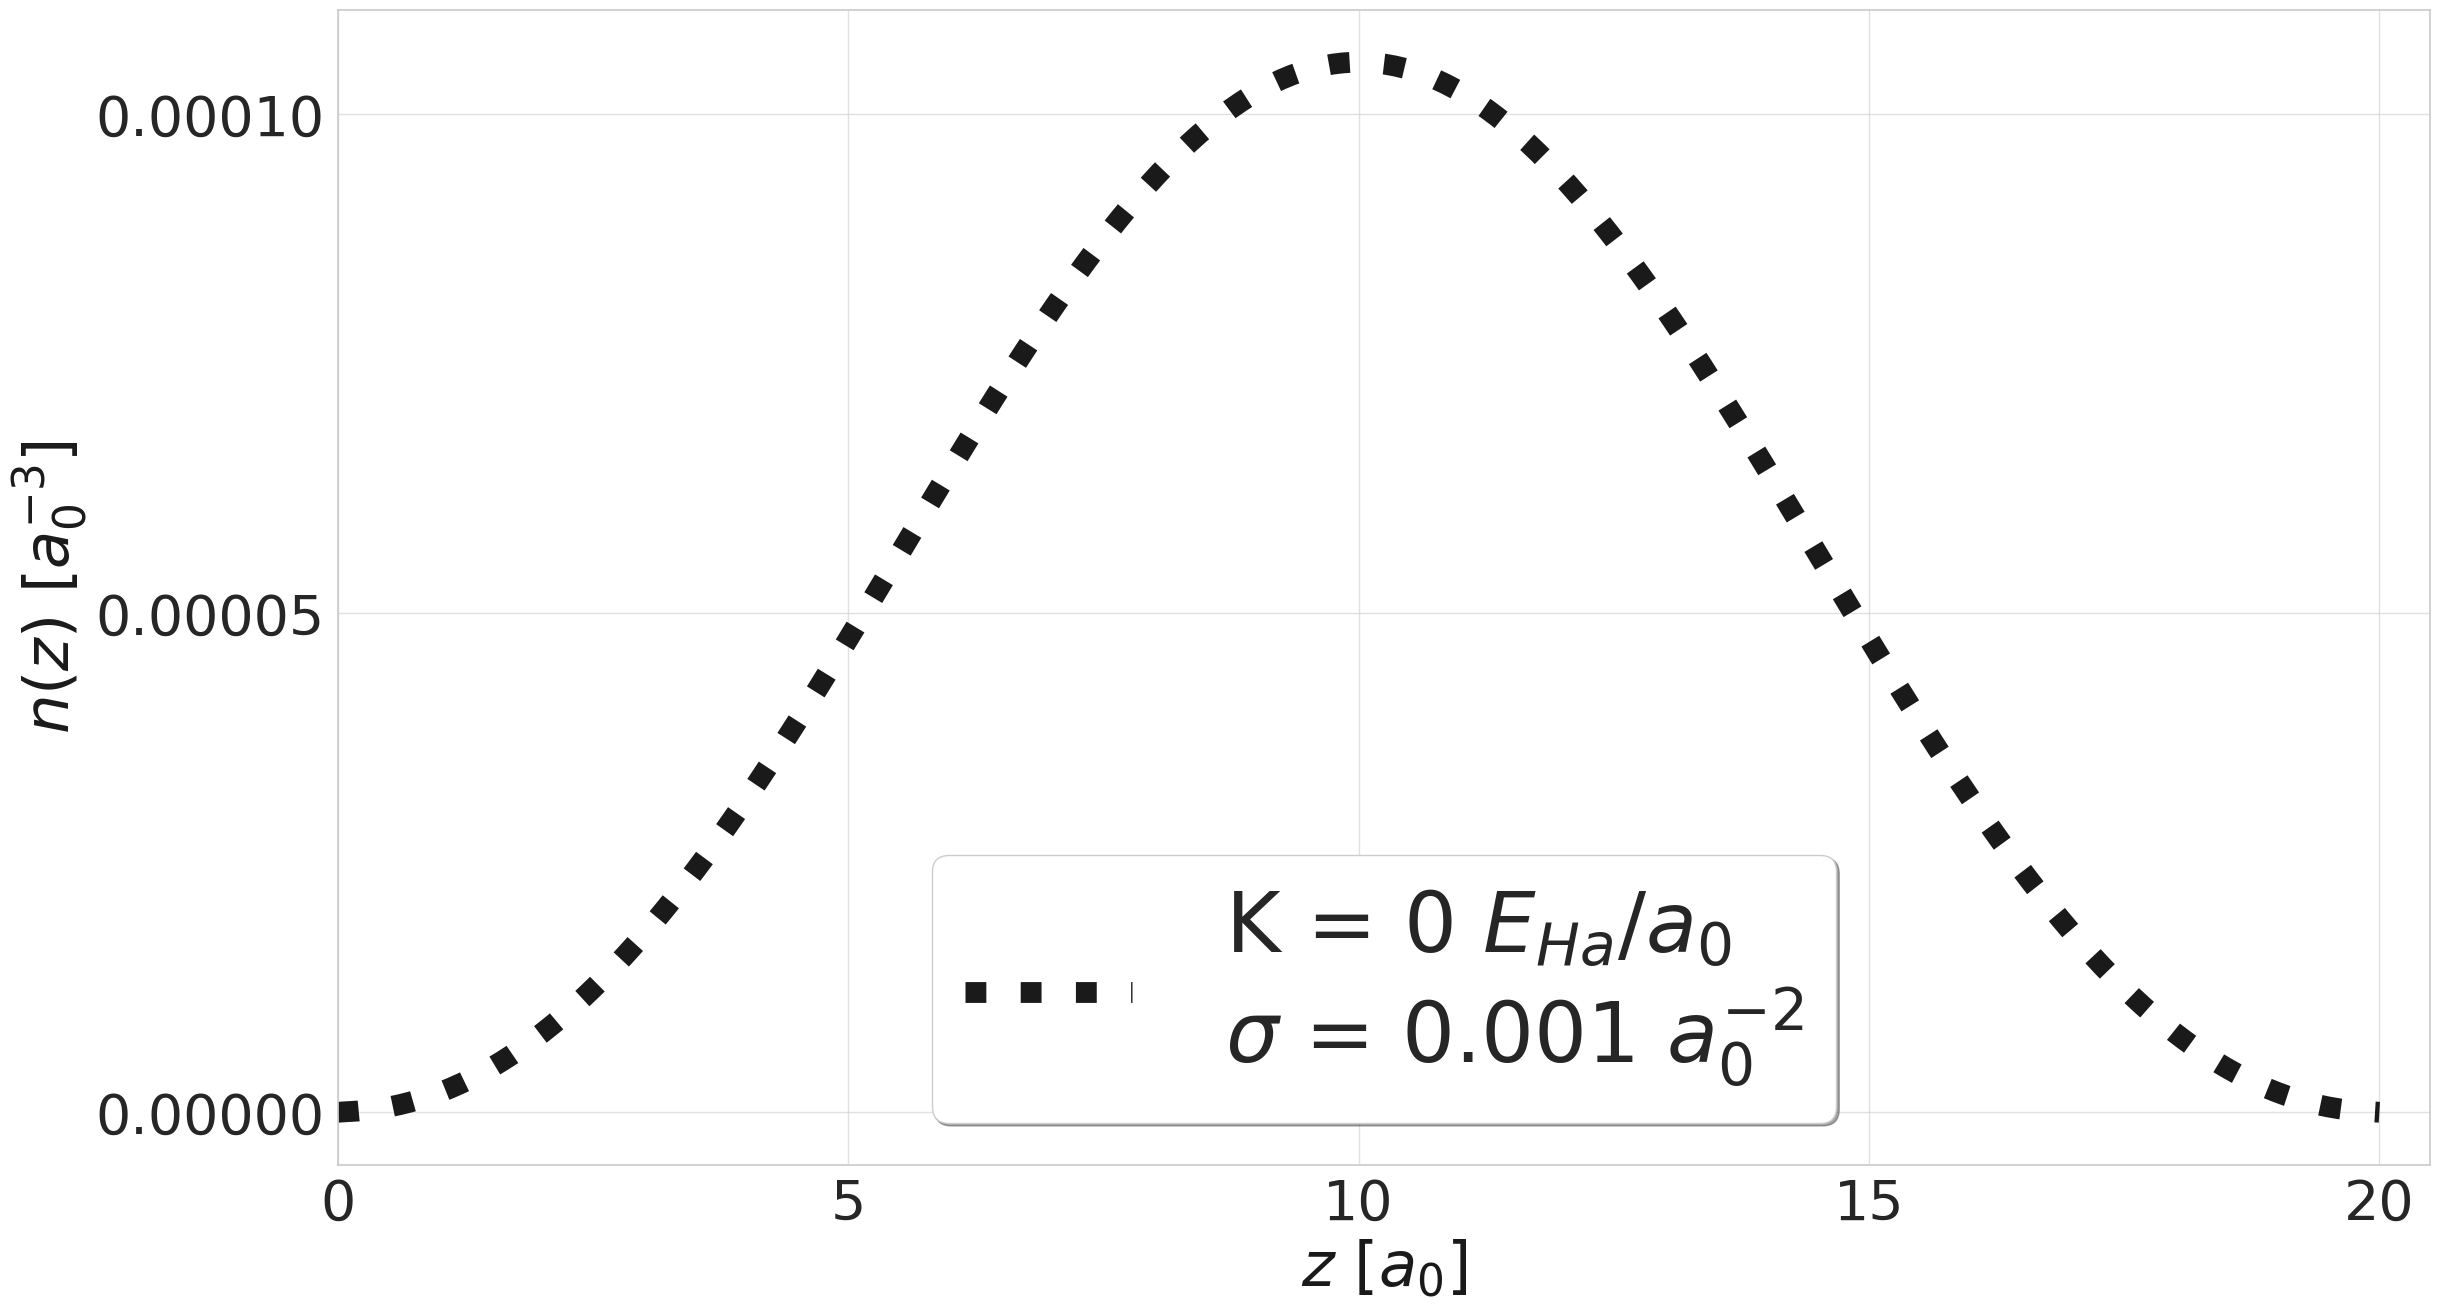

In [60]:
K = 0
sigma = [0.001]
myLines = [":", "--", "-.", "-"]
plt.figure(figsize = (27,15))


conta = 0
for s in sigma:
    x, y = np.loadtxt("KS/DAT/density_K="+str(K)+"_sigma="+str(s)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
    plt.plot(x,y, label = " "+"K = "+str(K)+" "+r"$E_{Ha}/a_0$"+"\n "+r"$\sigma$ = " + str(s)+ r" $a_0^{-2}$", linestyle = myLines[conta], linewidth = 15, c = "k")
    conta= conta +1
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 45,
        }
plt.xlim(0,20.5)
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$n(z)$"+" "+"$[a_0^{-3}]$", fontdict = font)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 60  )
plt.grid(axis = "both", alpha = 0.6)
#plt.text(15, 0.00007," "+"K = "+str(K)+" "+r"$E_{H_a}/a_0$"+" ", fontsize = 40, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.savefig("KS/JPEG/density_K="+str(K)+"_sigma="+str(sigma[0])+"_KS.jpeg")

K =  0
SIGMA =  0.2


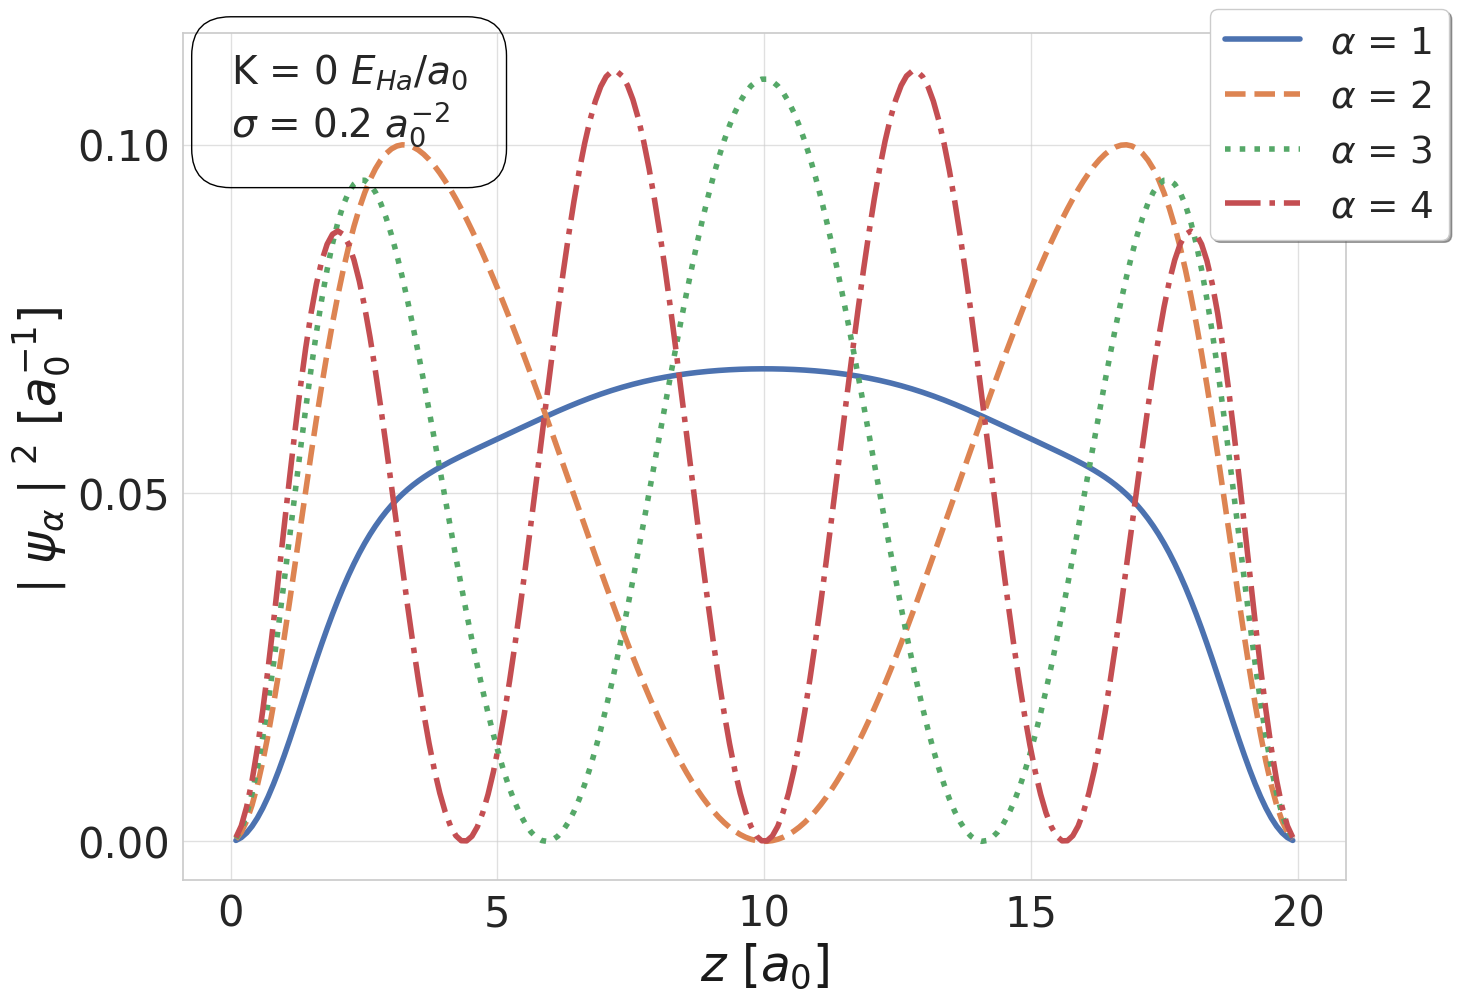

In [49]:
K = 0
sigma = 0.2
print("K = ", K)
print("SIGMA = ", sigma)
plt.figure(figsize = (15,11))

x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_1.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = r"$\alpha$ = " +str(1), linestyle = "-", linewidth = 4)
x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_2.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label =r"$\alpha$ = " +str(2), linestyle = "--", linewidth = 4)
x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_3.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label =r"$\alpha$ = " +str(3), linestyle = ":", linewidth = 4)
x, y = np.loadtxt("KS/DAT/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+"_4.dat", usecols = (0,1), delimiter = " ", unpack = "true")
plt.plot(x,y, label = r"$\alpha$ = " +str(4), linestyle = "-.", linewidth = 4)
plt.locator_params(axis = "x", nbins = 5)
plt.locator_params(axis = "y", nbins = 4)

font = { "family":"serif",
        "color":"k",
        "weight":"normal",
        "size":35,
       }
plt.xlabel(r"$z$"+ " " + r"$[a_0]$", fontdict = font)
plt.ylabel(r"$\mid \psi_{\alpha} \mid^{2}$"+" "+"$[a_0^{-1}]$", fontdict = font)
plt.legend(loc = "upper right", shadow = True, fancybox = True, fontsize = 27, bbox_to_anchor = (1.105,1.05))
plt.grid(axis = "both", alpha = 0.6)
plt.text(0, 0.1012,s = "K = "+ str(K)+" "+r"$E_{Ha}/a_0$"+"\n"+r"$\sigma$ = "+ str(sigma)+" "+ r"$a_0^{-2}$", fontsize = 28, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("KS/JPEG/eigenfunction_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

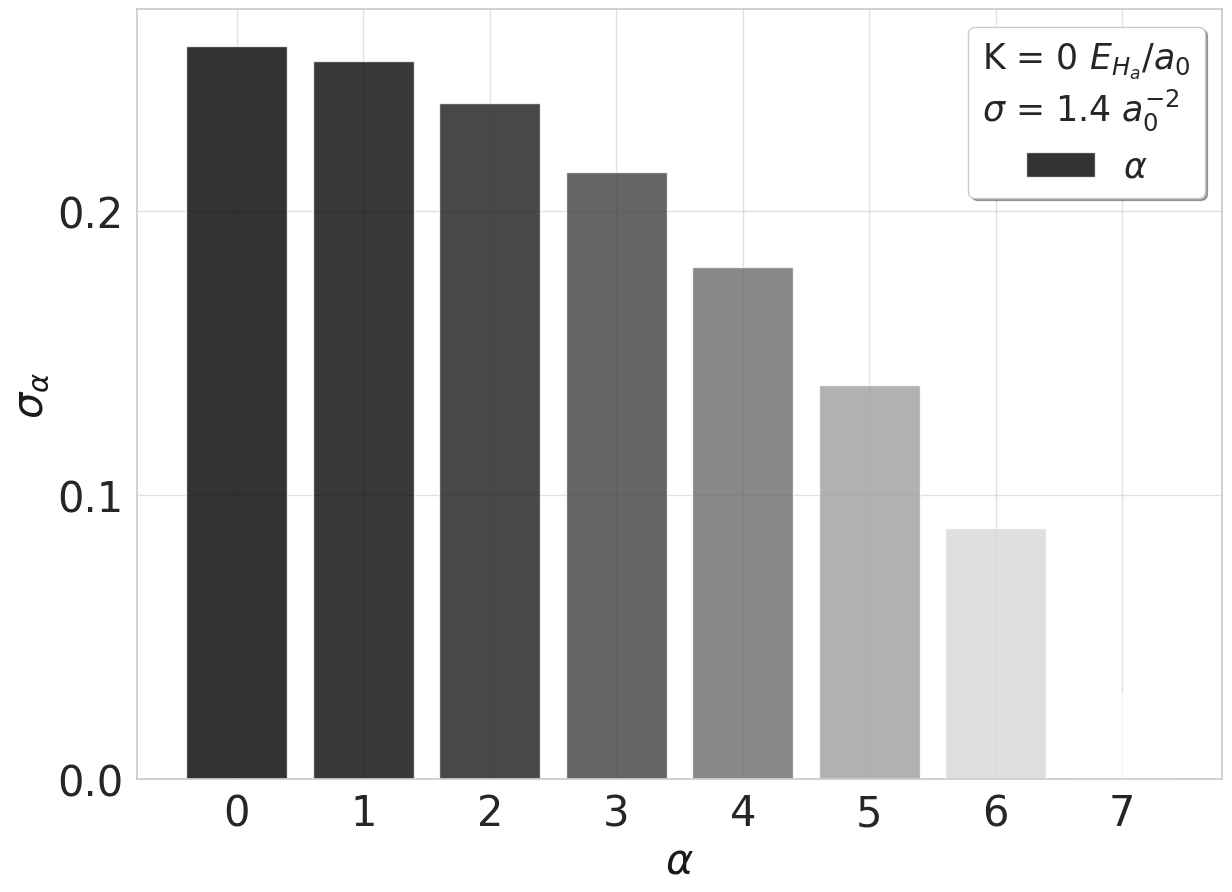

In [303]:
L = 20
K = 0
sigma = 1.4
plt.figure(figsize = (14,10))
x, y = np.loadtxt("KS/DAT/kF_K="+str(K)+"_sigma="+str(sigma)+".dat", usecols = (0,1), delimiter = " ", unpack = "true")
my_cmap = plt.get_cmap("Greys")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x,y, label = r"$\alpha$", color=my_cmap(rescale(y)), alpha = 0.8)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 30,
        }

plt.xlabel(r"$\alpha$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$", fontdict = font)

plt.legend(loc = "best", shadow = True, fancybox = True, title = "K = "+ str(K) +" "+r"$E_{H_a}/a_0$"+"\n" + r"$\sigma$ = " + str(sigma)+" "+r"$a_0^{-2}$", fontsize = 25, title_fontsize = 25)
plt.grid(axis = "both", alpha = 0.6)
plt.locator_params(axis = "y", nbins = 5)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.savefig("KS/JPEG/kF_K="+str(K)+"_sigma="+str(sigma)+".jpeg")

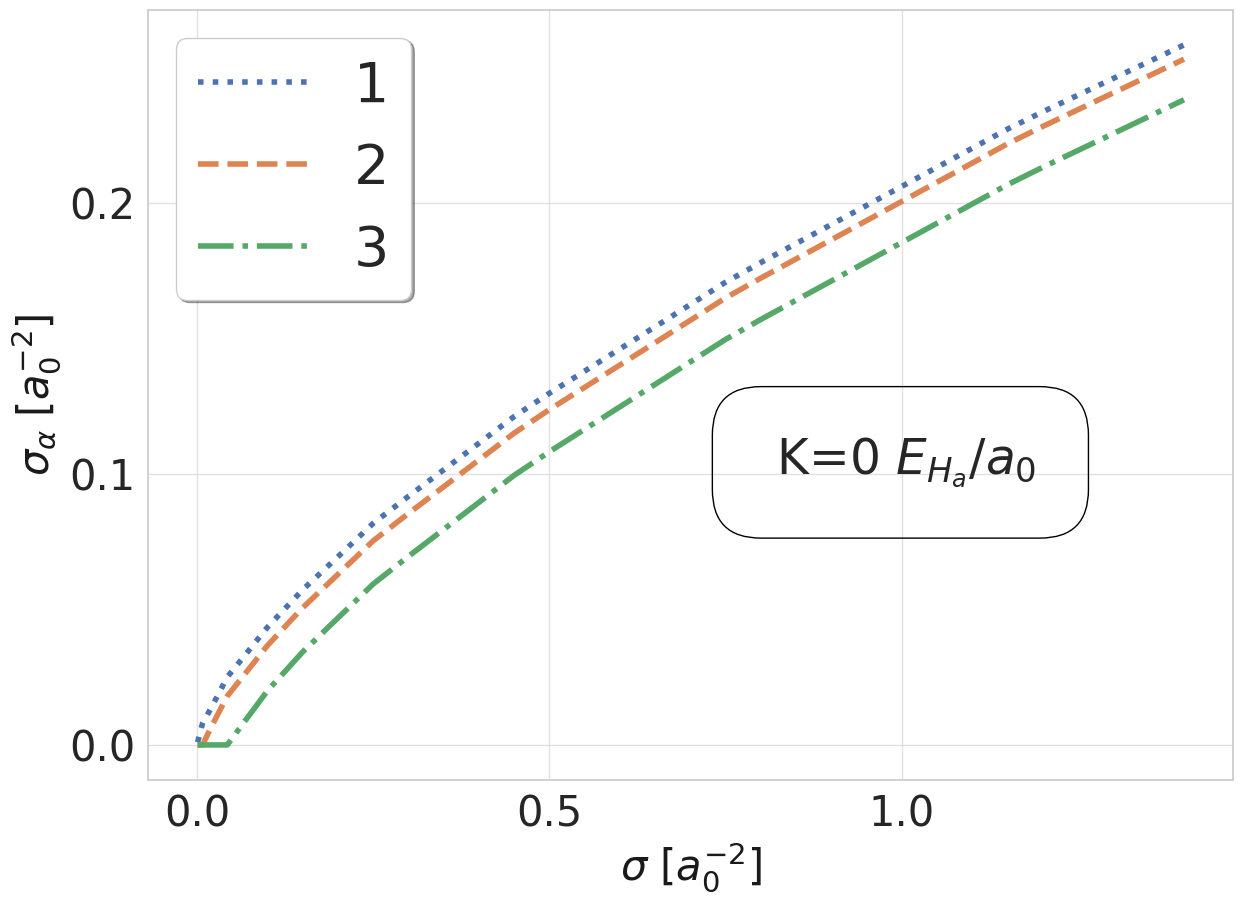

In [304]:
L = 20
K = 0
plt.figure(figsize = (14,10))
x, yF, y1, y2, y3  = np.loadtxt("KS/DAT/sigma_alpha_K="+str(K)+".dat", usecols = (0,1,2,3,4), delimiter = " ", unpack = "true")
#plt.plot(x,yF, label = r"$\mu$", linestyle = "-", linewidth = 2)
plt.plot(x,y1, label = str(1), linestyle = ":", linewidth = 4)
plt.plot(x,y2, label = str(2), linestyle = "--", linewidth = 4)
plt.plot(x,y3, label = str(3), linestyle = "-.", linewidth = 4)
font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 30,
        }
plt.xlabel(r"$\sigma$ $[a_0^{-2}]$", fontdict=font )
plt.ylabel(r"$\sigma_{\alpha}$ $[a_0^{-2}]$", fontdict=font)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=5)
plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 40)
plt.text(0.8, 0.1,s =" "+"K=" + str(K)+" "+ r"$E_{H_a}/a_0$"+" ", fontsize = 35, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.grid(axis = "both", alpha = 0.6)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#plt.subplots_adjust(left=0.1)
plt.savefig("KS/JPEG/sigma_alpha_K="+str(K)+"_KS.jpeg")

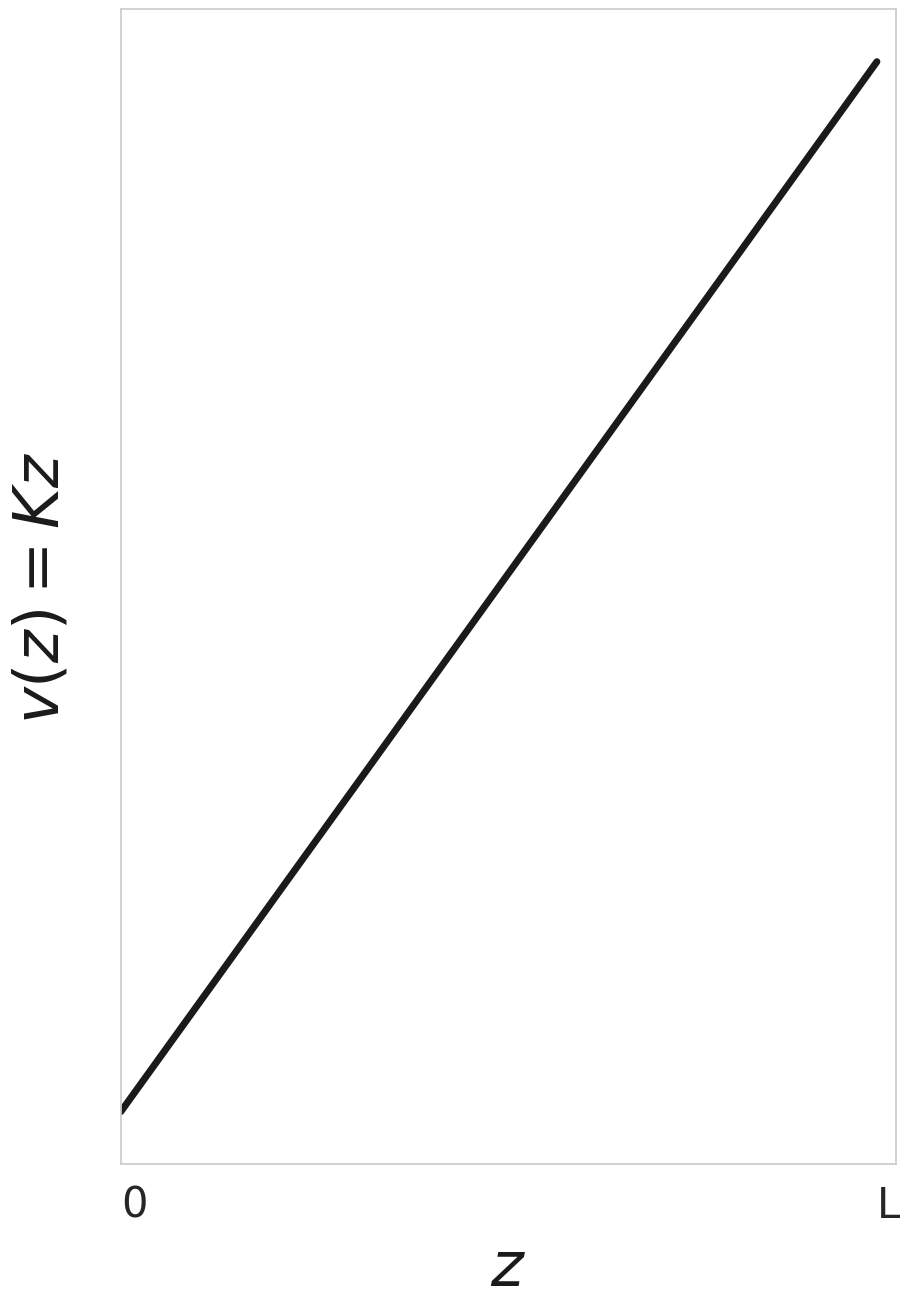

In [25]:

myLines = [":", "--", "-.", "-"]
plt.figure(figsize = (10,15))
x = np.linspace(0,20)
y = 1 * x
plt.plot(x,y, label = "v(z) = Kz ", linestyle = "-", linewidth = 5 , c = "k")

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 45,
        }
plt.xlim(0,20.5)
plt.xlabel(r"$z$", fontdict = font)
plt.ylabel(r"$v(z)= Kz$", fontdict = font)
#plt.legend(loc = "best", shadow = True, fancybox = True, fontsize = 30  )
plt.grid(alpha = 0)
#plt.axhline(y = 0, color = "k")
#plt.axvline(x = 0, color = "k")
#plt.text(15, 0.00007," "+"K = "+str(K)+" "+r"$E_{H_a}/a_0$"+" ", fontsize = 40, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.text(20,-2, "L",fontsize = 30)
plt.text(0,-2, "0",fontsize = 30)
plt.locator_params(axis = "x", nbins = 2)
plt.locator_params(axis = "y", nbins = 4)
plt.xticks(fontsize = 40)
plt.xticks(color='white')
plt.yticks(color='white')
plt.savefig("JPEG/Grafigo_Potenziale.jpeg")